# Car Sale Prediction Analysis According to Segments

## Getting Data

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

df_2004 = pd.read_excel("MODELDOKUMUARALIK2004.xls",skiprows=1,index_col=None)
df_2005 = pd.read_excel("MODELDOKUMUARALIK2005.xls",skiprows=1,index_col=None)
df_2006 = pd.read_excel("Model Dökümü, Aralık 2006.xls",skiprows=1,index_col=None)
df_2007 = pd.read_excel("MODELDOKUMARALIK2007.xls",skiprows=1,index_col=None)
df_2008 = pd.read_excel("MODELDOKUMUARALIK2008.xls",skiprows=1,index_col=None)
df_2009 = pd.read_excel("MODELDOKUMUARALIK2009.xls",skiprows=1,index_col=None)
df_2010 = pd.read_excel("MODELDOKUMUARALIK2010.xls",skiprows=1,index_col=None)
df_2011 = pd.read_excel("MODELDOKUMUARALIK2011.xls",skiprows=1,index_col=None)
df_2012 = pd.read_excel("MODELDOKUMARALIK2012.xls",skiprows=1,index_col=None)
df_2013 = pd.read_excel("MODELDOKUMUARALIK2013.xls",skiprows=1,index_col=None)
df_2014 = pd.read_excel("MODELDOKUMUARALIK2014.xls",skiprows=1,index_col=None)
df_2015 = pd.read_excel("MODELDOKUMARALIK2015.xls",skiprows=2,index_col=None)
df_2016 = pd.read_excel("Model Dokumu Aralık'2016.xls",skiprows=2,index_col=None)
df_2017 = pd.read_excel("Model Dokumu Aralık 2017.xlsx",skiprows=2,index_col=None)
df_2018 = pd.read_excel("Model Dokumu Şubat'2018.xls",skiprows=2,index_col=None)

df_2004.info()
df_2004.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 532 entries, 0 to 531
Data columns (total 17 columns):
MARKA           64 non-null object
Unnamed: 1      162 non-null object
MODEL           376 non-null object
SEGMENT         321 non-null object
200401          524 non-null object
200402          524 non-null object
200403          524 non-null object
200404          524 non-null object
200405          524 non-null object
200406          508 non-null object
200407          508 non-null object
200408          508 non-null object
200409          508 non-null object
200410          508 non-null object
200411          508 non-null object
200412          508 non-null object
Toplam/Total    508 non-null object
dtypes: object(17)
memory usage: 70.7+ KB


,MARKA,Unnamed: 1,MODEL,SEGMENT,200401,200402,200403,200404,200405,200406,200407,200408,200409,200410,200411,200412,Toplam/Total
count,64,162,376,321,524,524,524,524,524,508,508,508,508,508,508,508,508
unique,58,17,291,45,194,186,207,219,226,208,194,199,212,207,205,221,321
top,A (Mini),Toplam/Total,ASTRA,B2,0,0,0,0,0,0,0,0,0,0,0,0,0
freq,2,50,5,31,193,186,186,155,149,154,155,150,149,160,148,137,78


## Function to retrieve Monthly Sales of Segments and clean unwanted data

In [3]:
def segment(df):
    df = df.iloc[:-25,3:16]
    df['SEGMENT'] = df['SEGMENT'].astype('str')
    df = df[df.SEGMENT.str.contains("nan") == False]
    df['SEGMENT'] = df['SEGMENT'].apply(lambda x: str(x)[0])
    df = df.groupby(['SEGMENT']).sum()
    return df

In [4]:
df_2004 = segment(df_2004)
df_2005 = segment(df_2005)
df_2006 = segment(df_2006)
df_2007 = segment(df_2007)
df_2008 = segment(df_2008)
df_2009 = segment(df_2009)
df_2010 = segment(df_2010)
df_2011 = segment(df_2011)
df_2012 = segment(df_2012)
df_2013 = segment(df_2013)
df_2014 = segment(df_2014)
df_2015 = segment(df_2015)
df_2016 = segment(df_2016)
df_2017 = segment(df_2017)
df_2018 = segment(df_2018)

df_2018 = df_2018.iloc[:,0:2]

### Merging Data

In [5]:
df_2004 = df_2004.transpose()
df_2005 = df_2005.transpose()
df_2006 = df_2006.transpose()
df_2007 = df_2007.transpose()
df_2008 = df_2008.transpose()
df_2009 = df_2009.transpose()
df_2010 = df_2010.transpose()
df_2011 = df_2011.transpose()
df_2012 = df_2012.transpose()
df_2013 = df_2013.transpose()
df_2014 = df_2014.transpose()
df_2015 = df_2015.transpose()
df_2016 = df_2016.transpose()
df_2017 = df_2017.transpose()
df_2018 = df_2018.transpose()

data = pd.concat([df_2004,df_2005,df_2006,df_2007,df_2008,df_2009,df_2010,df_2011,df_2012,df_2013,df_2014,df_2015,df_2016,df_2017,df_2018])
del df_2004,df_2005,df_2006,df_2007,df_2008,df_2009,df_2010,df_2011,df_2012,df_2013,df_2014,df_2015,df_2016,df_2017,df_2018
data.info()
data.describe()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 170 entries, 200401 to 201802
Data columns (total 6 columns):
A    170 non-null int64
B    170 non-null int64
C    170 non-null int64
D    170 non-null int64
E    170 non-null int64
F    170 non-null int64
dtypes: int64(6)
memory usage: 9.3 KB


SEGMENT,A,B,C,D,E,F
count,170.000000,170.000000,170.000000,170.000000,170.000000,170.000000
mean,252.205882,16107.947059,20767.447059,5412.111765,1146.947059,287.935294
std,137.381941,6286.426447,11060.365468,2657.924205,768.974128,144.008429
min,41.000000,4049.000000,4482.000000,1653.000000,222.000000,98.000000
25%,152.000000,12124.250000,12745.750000,3462.250000,552.750000,185.750000
50%,229.000000,15880.000000,18736.000000,4940.000000,944.500000,261.500000
75%,326.000000,19468.250000,25811.250000,6702.000000,1600.000000,342.000000
max,948.000000,37670.000000,59812.000000,15515.000000,4025.000000,904.000000


### Shifting Data to access previous informations of that month

In [6]:
data2 = data.copy()
data2 = data2.shift(1)

data['Last_Month_A'] = data2['A']
data['Last_Month_B'] = data2['B']
data['Last_Month_C'] = data2['C']
data['Last_Month_D'] = data2['D']
data['Last_Month_E'] = data2['E']
data['Last_Month_F'] = data2['F']

del data2

### Adding USD, EUR, BIST 100, Export and Import Datas

In [7]:
usd = pd.read_excel("usd_try_monthly.xls",skiprows = 1, index_col = None)
usd = usd.set_index('Tarih')
eur = pd.read_excel("eur_try_monthly.xls",skiprows = 1, index_col = None)
eur = eur.set_index('Tarih')
bist = pd.read_excel("bist100monthly.xls",skiprows = 1, index_col = None)
bist = bist.set_index('Tarih')
export_import = pd.read_excel("Export_Import.xls")
export_import = export_import.set_index('Month')

usd = usd.join(eur)
del eur
usd = usd.join(bist)
del bist
usd = usd.join(export_import)
del export_import

last2usd = usd.copy()

### Calculating previous months information by shifting

In [8]:
usd['USD Diff -1'] = usd['USD Diff'].fillna(usd['USD Diff'])
usd['EUR Diff -1'] = usd['EUR Diff'].fillna(usd['EUR Diff'])
usd['BIST Diff -1'] = usd['BIST Diff'].fillna(usd['BIST Diff'])

data['A Sell Diff'] = (100*(data['A'] - data['Last_Month_A'])/data['Last_Month_A'])
data['B Sell Diff'] = (100*(data['B'] - data['Last_Month_B'])/data['Last_Month_B'])
data['C Sell Diff'] = (100*(data['C'] - data['Last_Month_C'])/data['Last_Month_C'])
data['D Sell Diff'] = (100*(data['D'] - data['Last_Month_D'])/data['Last_Month_D'])
data['E Sell Diff'] = (100*(data['E'] - data['Last_Month_E'])/data['Last_Month_E'])
data['F Sell Diff'] = (100*(data['F'] - data['Last_Month_F'])/data['Last_Month_F'])


#for -1 month
last2usd = last2usd.shift(1)
data2 = data.copy().shift(1)
usd['Export Diff -1'] = 100*(usd['Exports'] - last2usd['Exports'])/last2usd['Exports']
usd['Import Diff -1'] = 100*(usd['Imports'] - last2usd['Imports'])/last2usd['Imports']

data['A Sell Diff -1'] = 100*(data['Last_Month_A'] - data2['Last_Month_A'])/data2['Last_Month_A']
data['B Sell Diff -1'] = 100*(data['Last_Month_B'] - data2['Last_Month_B'])/data2['Last_Month_B']
data['C Sell Diff -1'] = 100*(data['Last_Month_C'] - data2['Last_Month_C'])/data2['Last_Month_C']
data['D Sell Diff -1'] = 100*(data['Last_Month_D'] - data2['Last_Month_D'])/data2['Last_Month_D']
data['E Sell Diff -1'] = 100*(data['Last_Month_E'] - data2['Last_Month_E'])/data2['Last_Month_E']
data['F Sell Diff -1'] = 100*(data['Last_Month_F'] - data2['Last_Month_F'])/data2['Last_Month_F']


#for -2 month
last2usd = last2usd.shift(1)
data2 = data.copy().shift(1)

usd['USD Diff -2'] = (100*(usd['USD Now'] - last2usd['USD Now'])/last2usd['USD Now']).fillna(usd['USD Diff -1'])
usd['EUR Diff -2'] = (100*(usd['EUR Now'] - last2usd['EUR Now'])/last2usd['EUR Now']).fillna(usd['EUR Diff -1'])
usd['BIST Diff -2'] = (100*(usd['BIST Now'] - last2usd['BIST Now'])/last2usd['BIST Now']).fillna(usd['BIST Diff -1'])
usd['Export Diff -2'] = (100*(usd['Exports'] - last2usd['Exports'])/last2usd['Exports']).fillna(usd['Export Diff -1'])
usd['Import Diff -2'] = (100*(usd['Imports'] - last2usd['Imports'])/last2usd['Imports']).fillna(usd['Import Diff -1'])


data['A Sell Diff -2'] = (100*(data['Last_Month_A'] - data2['Last_Month_A'])/data2['Last_Month_A']).fillna(data['A Sell Diff -1'])
data['B Sell Diff -2'] = (100*(data['Last_Month_B'] - data2['Last_Month_B'])/data2['Last_Month_B']).fillna(data['B Sell Diff -1'])
data['C Sell Diff -2'] = (100*(data['Last_Month_C'] - data2['Last_Month_C'])/data2['Last_Month_C']).fillna(data['C Sell Diff -1'])
data['D Sell Diff -2'] = (100*(data['Last_Month_D'] - data2['Last_Month_D'])/data2['Last_Month_D']).fillna(data['D Sell Diff -1'])
data['E Sell Diff -2'] = (100*(data['Last_Month_E'] - data2['Last_Month_E'])/data2['Last_Month_E']).fillna(data['E Sell Diff -1'])
data['F Sell Diff -2'] = (100*(data['Last_Month_F'] - data2['Last_Month_F'])/data2['Last_Month_F']).fillna(data['F Sell Diff -1'])


#for -3 month
last2usd = last2usd.shift(1)
data2 = data.copy().shift(1)

usd['USD Diff -3'] = (100*(usd['USD Now'] - last2usd['USD Now'])/last2usd['USD Now']).fillna(usd['USD Diff -2'])
usd['EUR Diff -3'] = (100*(usd['EUR Now'] - last2usd['EUR Now'])/last2usd['EUR Now']).fillna(usd['EUR Diff -2'])
usd['BIST Diff -3'] = (100*(usd['BIST Now'] - last2usd['BIST Now'])/last2usd['BIST Now']).fillna(usd['BIST Diff -2'])
usd['Export Diff -3'] = (100*(usd['Exports'] - last2usd['Exports'])/last2usd['Exports']).fillna(usd['Export Diff -2'])
usd['Import Diff -3'] = (100*(usd['Imports'] - last2usd['Imports'])/last2usd['Imports']).fillna(usd['Import Diff -2'])


data['A Sell Diff -3'] = (100*(data['Last_Month_A'] - data2['Last_Month_A'])/data2['Last_Month_A']).fillna(data['A Sell Diff -2'])
data['B Sell Diff -3'] = (100*(data['Last_Month_B'] - data2['Last_Month_B'])/data2['Last_Month_B']).fillna(data['B Sell Diff -2'])
data['C Sell Diff -3'] = (100*(data['Last_Month_C'] - data2['Last_Month_C'])/data2['Last_Month_C']).fillna(data['C Sell Diff -2'])
data['D Sell Diff -3'] = (100*(data['Last_Month_D'] - data2['Last_Month_D'])/data2['Last_Month_D']).fillna(data['D Sell Diff -2'])
data['E Sell Diff -3'] = (100*(data['Last_Month_E'] - data2['Last_Month_E'])/data2['Last_Month_E']).fillna(data['E Sell Diff -2'])
data['F Sell Diff -3'] = (100*(data['Last_Month_F'] - data2['Last_Month_F'])/data2['Last_Month_F']).fillna(data['F Sell Diff -2'])

#for -6 month
last2usd = last2usd.shift(3)
data2 = data.copy().shift(3)

usd['USD Diff -6'] = (100*(usd['USD Now'] - last2usd['USD Now'])/last2usd['USD Now']).fillna(usd['USD Diff -3'])
usd['EUR Diff -6'] = (100*(usd['EUR Now'] - last2usd['EUR Now'])/last2usd['EUR Now']).fillna(usd['EUR Diff -3'])
usd['BIST Diff -6'] = (100*(usd['BIST Now'] - last2usd['BIST Now'])/last2usd['BIST Now']).fillna(usd['BIST Diff -3'])
usd['Export Diff -6'] = (100*(usd['Exports'] - last2usd['Exports'])/last2usd['Exports']).fillna(usd['Export Diff -3'])
usd['Import Diff -6'] = (100*(usd['Imports'] - last2usd['Imports'])/last2usd['Imports']).fillna(usd['Import Diff -3'])


data['A Sell Diff -6'] = (100*(data['Last_Month_A'] - data2['Last_Month_A'])/data2['Last_Month_A']).fillna(data['A Sell Diff -3'])
data['B Sell Diff -6'] = (100*(data['Last_Month_B'] - data2['Last_Month_B'])/data2['Last_Month_B']).fillna(data['B Sell Diff -3'])
data['C Sell Diff -6'] = (100*(data['Last_Month_C'] - data2['Last_Month_C'])/data2['Last_Month_C']).fillna(data['C Sell Diff -3'])
data['D Sell Diff -6'] = (100*(data['Last_Month_D'] - data2['Last_Month_D'])/data2['Last_Month_D']).fillna(data['D Sell Diff -3'])
data['E Sell Diff -6'] = (100*(data['Last_Month_E'] - data2['Last_Month_E'])/data2['Last_Month_E']).fillna(data['E Sell Diff -3'])
data['F Sell Diff -6'] = (100*(data['Last_Month_F'] - data2['Last_Month_F'])/data2['Last_Month_F']).fillna(data['F Sell Diff -3'])


#for -9 month
last2usd = last2usd.shift(3)
data2 = data.copy().shift(3)

usd['USD Diff -9'] = (100*(usd['USD Now'] - last2usd['USD Now'])/last2usd['USD Now']).fillna(usd['USD Diff -6'])
usd['EUR Diff -9'] = (100*(usd['EUR Now'] - last2usd['EUR Now'])/last2usd['EUR Now']).fillna(usd['EUR Diff -6'])
usd['BIST Diff -9'] = (100*(usd['BIST Now'] - last2usd['BIST Now'])/last2usd['BIST Now']).fillna(usd['BIST Diff -6'])
usd['Export Diff -9'] = (100*(usd['Exports'] - last2usd['Exports'])/last2usd['Exports']).fillna(usd['Export Diff -6'])
usd['Import Diff -9'] = (100*(usd['Imports'] - last2usd['Imports'])/last2usd['Imports']).fillna(usd['Import Diff -6'])


data['A Sell Diff -9'] = (100*(data['Last_Month_A'] - data2['Last_Month_A'])/data2['Last_Month_A']).fillna(data['A Sell Diff -6'])
data['B Sell Diff -9'] = (100*(data['Last_Month_B'] - data2['Last_Month_B'])/data2['Last_Month_B']).fillna(data['B Sell Diff -6'])
data['C Sell Diff -9'] = (100*(data['Last_Month_C'] - data2['Last_Month_C'])/data2['Last_Month_C']).fillna(data['C Sell Diff -6'])
data['D Sell Diff -9'] = (100*(data['Last_Month_D'] - data2['Last_Month_D'])/data2['Last_Month_D']).fillna(data['D Sell Diff -6'])
data['E Sell Diff -9'] = (100*(data['Last_Month_E'] - data2['Last_Month_E'])/data2['Last_Month_E']).fillna(data['E Sell Diff -6'])
data['F Sell Diff -9'] = (100*(data['Last_Month_F'] - data2['Last_Month_F'])/data2['Last_Month_F']).fillna(data['F Sell Diff -6'])


#for -12 month
last2usd = last2usd.shift(3)
data2 = data.copy().shift(3)

usd['USD Diff -12'] = (100*(usd['USD Now'] - last2usd['USD Now'])/last2usd['USD Now']).fillna(usd['USD Diff -9'])
usd['EUR Diff -12'] = (100*(usd['EUR Now'] - last2usd['EUR Now'])/last2usd['EUR Now']).fillna(usd['EUR Diff -9'])
usd['BIST Diff -12'] = (100*(usd['BIST Now'] - last2usd['BIST Now'])/last2usd['BIST Now']).fillna(usd['BIST Diff -9'])
usd['Export Diff -12'] = (100*(usd['Exports'] - last2usd['Exports'])/last2usd['Exports']).fillna(usd['Export Diff -9'])
usd['Import Diff -12'] = (100*(usd['Imports'] - last2usd['Imports'])/last2usd['Imports']).fillna(usd['Import Diff -9'])


data['A Sell Diff -12'] = (100*(data['Last_Month_A'] - data2['Last_Month_A'])/data2['Last_Month_A']).fillna(data['A Sell Diff -9'])
data['B Sell Diff -12'] = (100*(data['Last_Month_B'] - data2['Last_Month_B'])/data2['Last_Month_B']).fillna(data['B Sell Diff -9'])
data['C Sell Diff -12'] = (100*(data['Last_Month_C'] - data2['Last_Month_C'])/data2['Last_Month_C']).fillna(data['C Sell Diff -9'])
data['D Sell Diff -12'] = (100*(data['Last_Month_D'] - data2['Last_Month_D'])/data2['Last_Month_D']).fillna(data['D Sell Diff -9'])
data['E Sell Diff -12'] = (100*(data['Last_Month_E'] - data2['Last_Month_E'])/data2['Last_Month_E']).fillna(data['E Sell Diff -9'])
data['F Sell Diff -12'] = (100*(data['Last_Month_F'] - data2['Last_Month_F'])/data2['Last_Month_F']).fillna(data['F Sell Diff -9'])


usd = usd.shift(-1)
usd = usd.iloc[:,18:]

## Combining Data with features

In [9]:
data = data.join(usd)
del usd, last2usd, data2
ser = ['1','2','3','4','5','6','7','8','9','10','11','12',
      '1','2','3','4','5','6','7','8','9','10','11','12',
      '1','2','3','4','5','6','7','8','9','10','11','12',
      '1','2','3','4','5','6','7','8','9','10','11','12',
      '1','2','3','4','5','6','7','8','9','10','11','12',
      '1','2','3','4','5','6','7','8','9','10','11','12',
      '1','2','3','4','5','6','7','8','9','10','11','12',
      '1','2','3','4','5','6','7','8','9','10','11','12',
      '1','2','3','4','5','6','7','8','9','10','11','12',
      '1','2','3','4','5','6','7','8','9','10','11','12',
      '1','2','3','4','5','6','7','8','9','10','11','12',
      '1','2','3','4','5','6','7','8','9','10','11','12',
      '1','2','3','4','5','6','7','8','9','10','11','12',
      '1','2','3','4','5','6','7','8','9','10','11','12',
      '1','2']
data['Month'] = ser
data.head()

,A,B,C,D,E,F,Last_Month_A,Last_Month_B,Last_Month_C,Last_Month_D,...,EUR Diff -9,BIST Diff -9,Export Diff -9,Import Diff -9,USD Diff -12,EUR Diff -12,BIST Diff -12,Export Diff -12,Import Diff -12,Month
200401,78,11759,9961,3438,257,138,NaN,NaN,NaN,NaN,...,-0.870000,9.440000,-20.675929,-3.009738,-1.040000,-0.870000,9.440000,-20.675929,-3.009738,1
200402,41,11218,9594,2440,287,126,78.0,11759.0,9961.0,3438.0,...,-3.289080,16.985558,12.952928,33.522041,-2.050708,-3.289080,16.985558,12.952928,33.522041,2
200403,83,21061,18885,5216,636,201,41.0,11218.0,9594.0,2440.0,...,1.794044,4.423367,9.801632,25.309450,5.935869,1.794044,4.423367,9.801632,25.309450,3
200404,206,22033,19682,5113,714,229,83.0,21061.0,18885.0,5216.0,...,9.501689,-9.572242,41.084931,30.151137,12.245667,9.501689,-9.572242,41.084931,30.151137,4
200405,297,25377,22816,5653,569,202,206.0,22033.0,19682.0,5113.0,...,11.952758,-11.011088,1.271379,0.187854,13.094785,11.952758,-11.011088,1.271379,0.187854,5


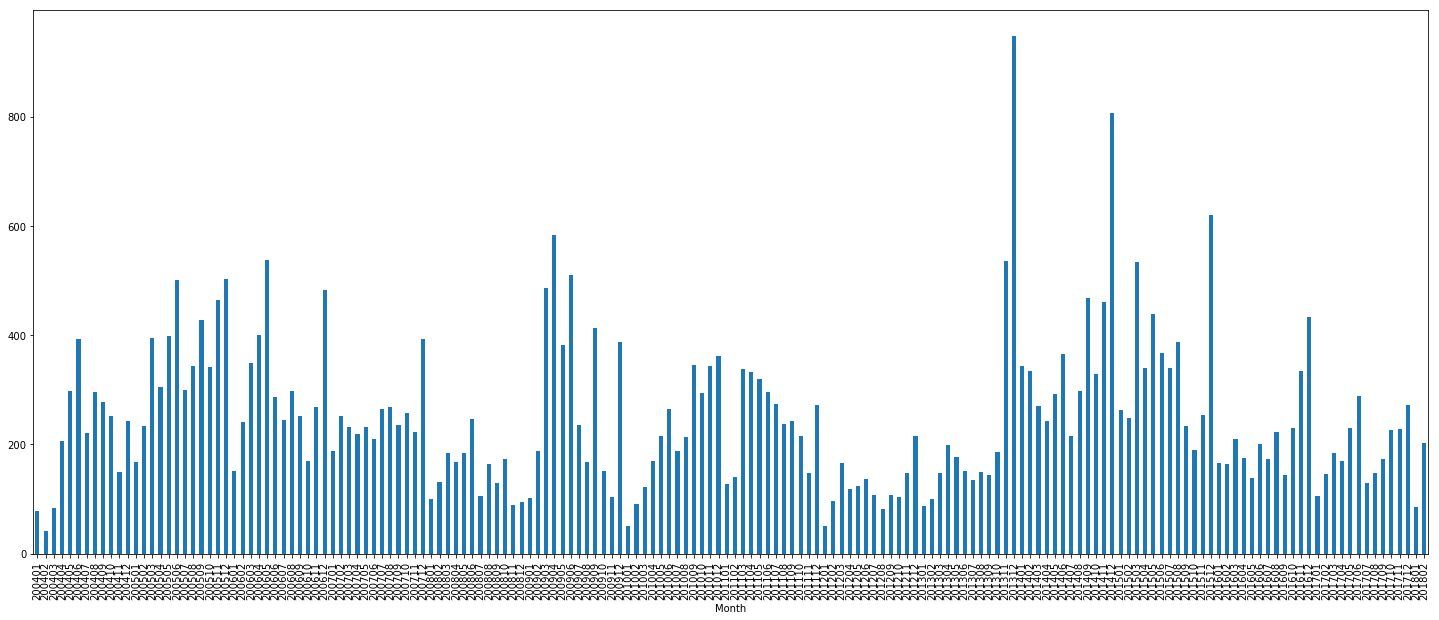

In [10]:
data['A'].plot(kind="bar",figsize=(25,10)).set_xlabel("Month")

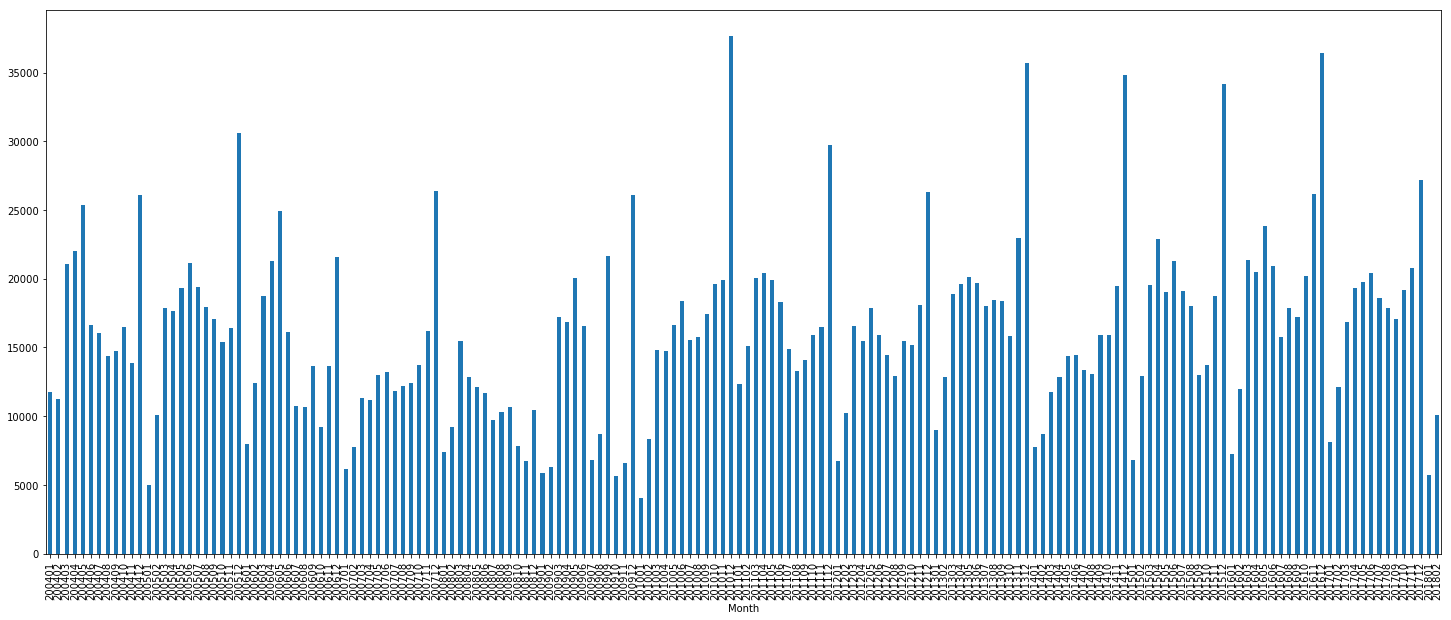

In [11]:
data['B'].plot(kind="bar",figsize=(25,10)).set_xlabel("Month")

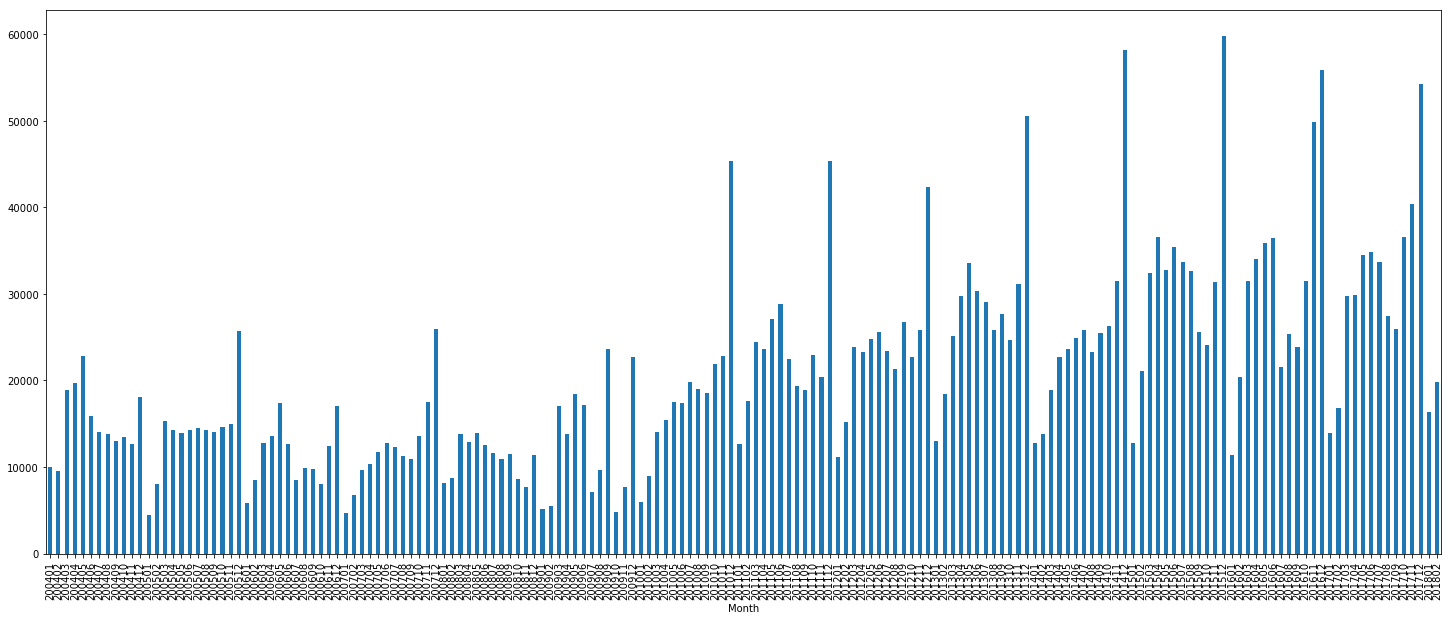

In [12]:
data['C'].plot(kind="bar",figsize=(25,10)).set_xlabel("Month")

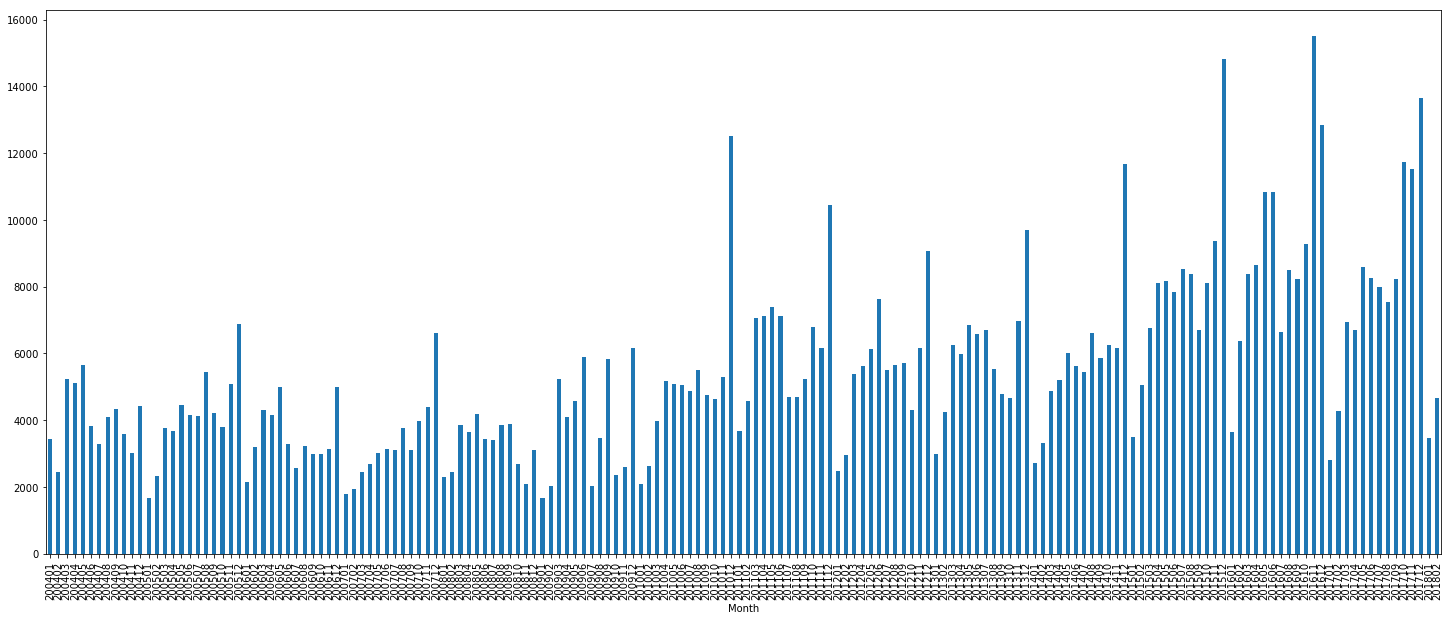

In [13]:
data['D'].plot(kind="bar",figsize=(25,10)).set_xlabel("Month")

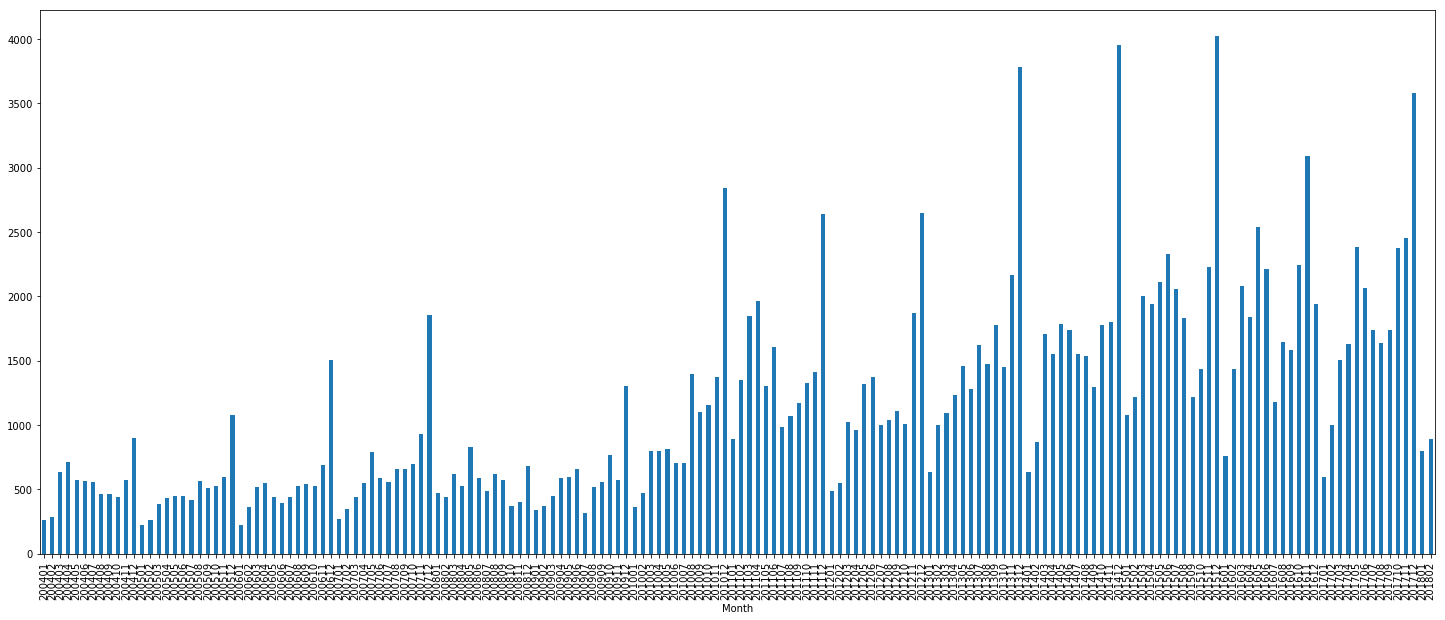

In [14]:
data['E'].plot(kind="bar",figsize=(25,10)).set_xlabel("Month")

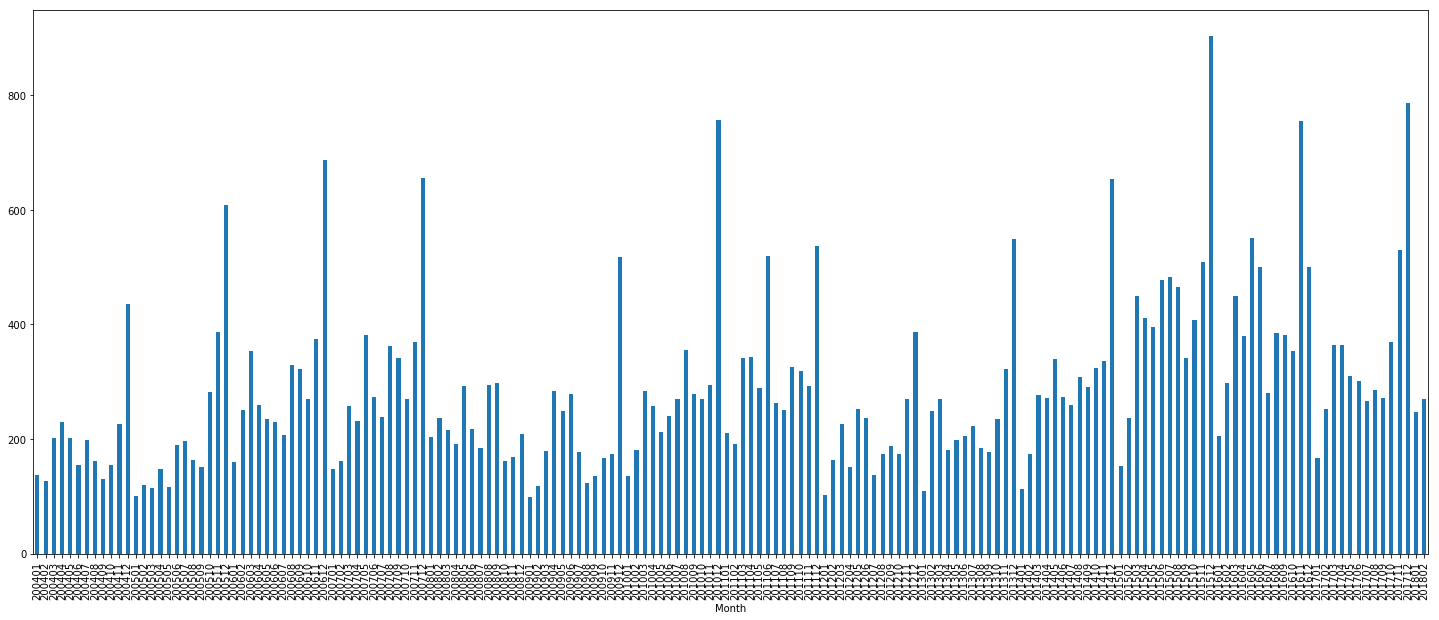

In [15]:
data['F'].plot(kind="bar",figsize=(25,10)).set_xlabel("Month")

## Monthly Sales of Segments

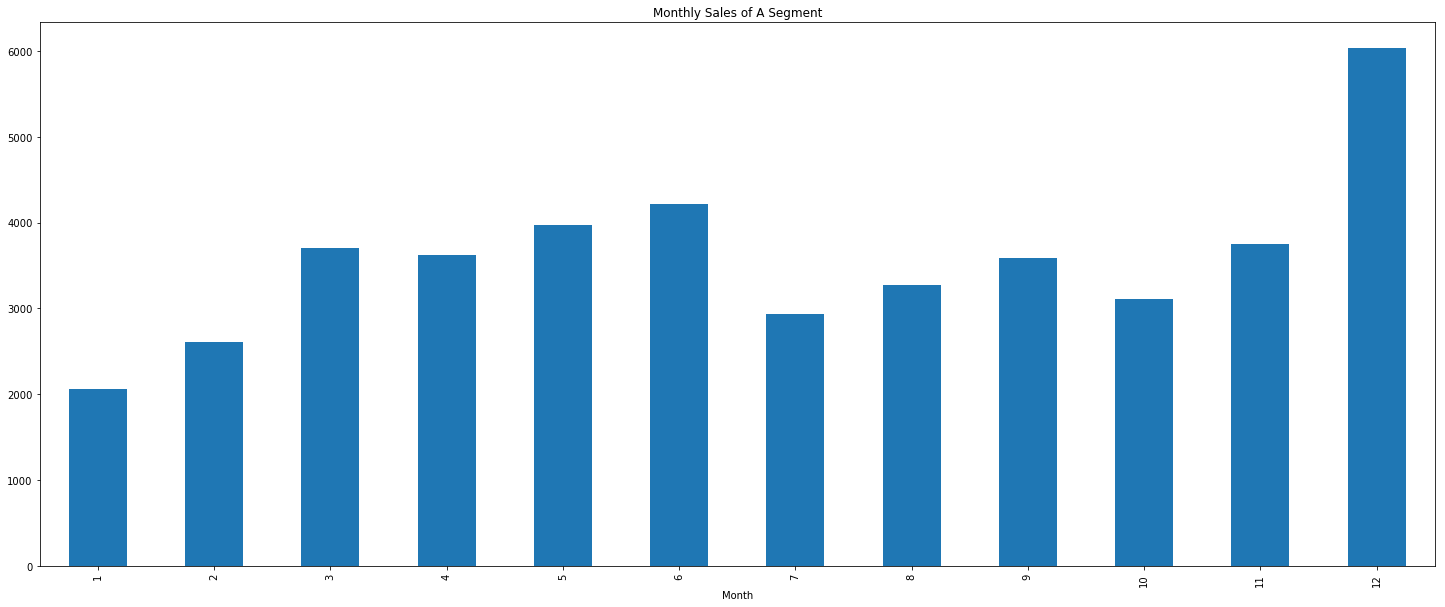

In [16]:
from datetime import datetime
dateDataset = data
dateDataset.index = pd.to_datetime(dateDataset.index,format = '%Y%m')
grouped = data['A'].groupby(dateDataset.index.month).sum().dropna()
plt = grouped.plot(kind="bar",figsize=(25,10))
plt.set_xlabel("Month")
plt.set_title("Monthly Sales of A Segment")

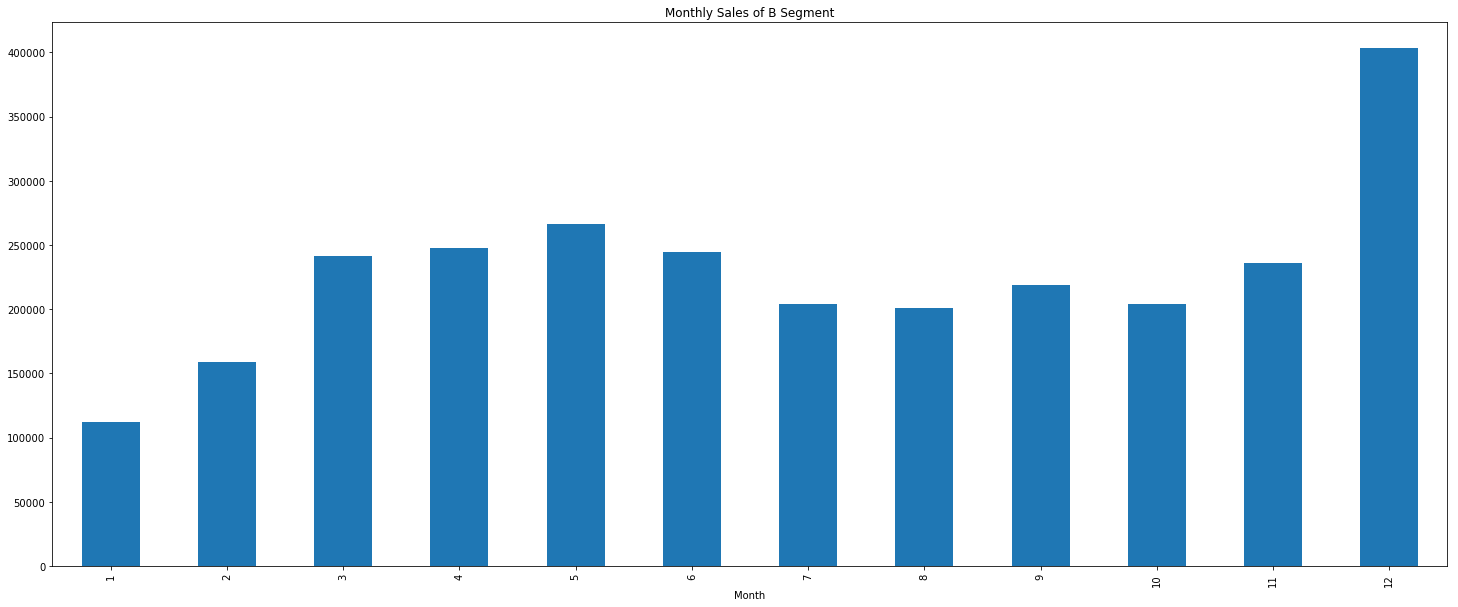

In [17]:
grouped = data['B'].groupby(dateDataset.index.month).sum().dropna()
plt = grouped.plot(kind="bar",figsize=(25,10))
plt.set_xlabel("Month")
plt.set_title("Monthly Sales of B Segment")

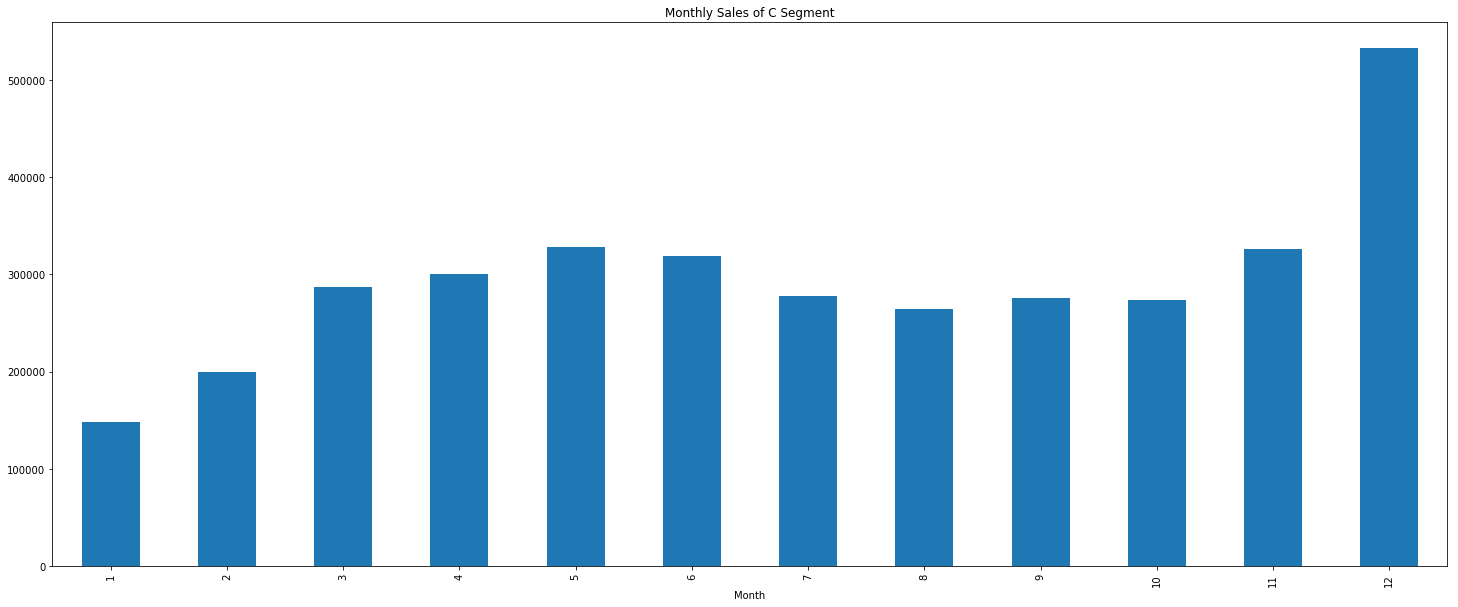

In [18]:
grouped = data['C'].groupby(dateDataset.index.month).sum().dropna()
plt = grouped.plot(kind="bar",figsize=(25,10))
plt.set_xlabel("Month")
plt.set_title("Monthly Sales of C Segment")

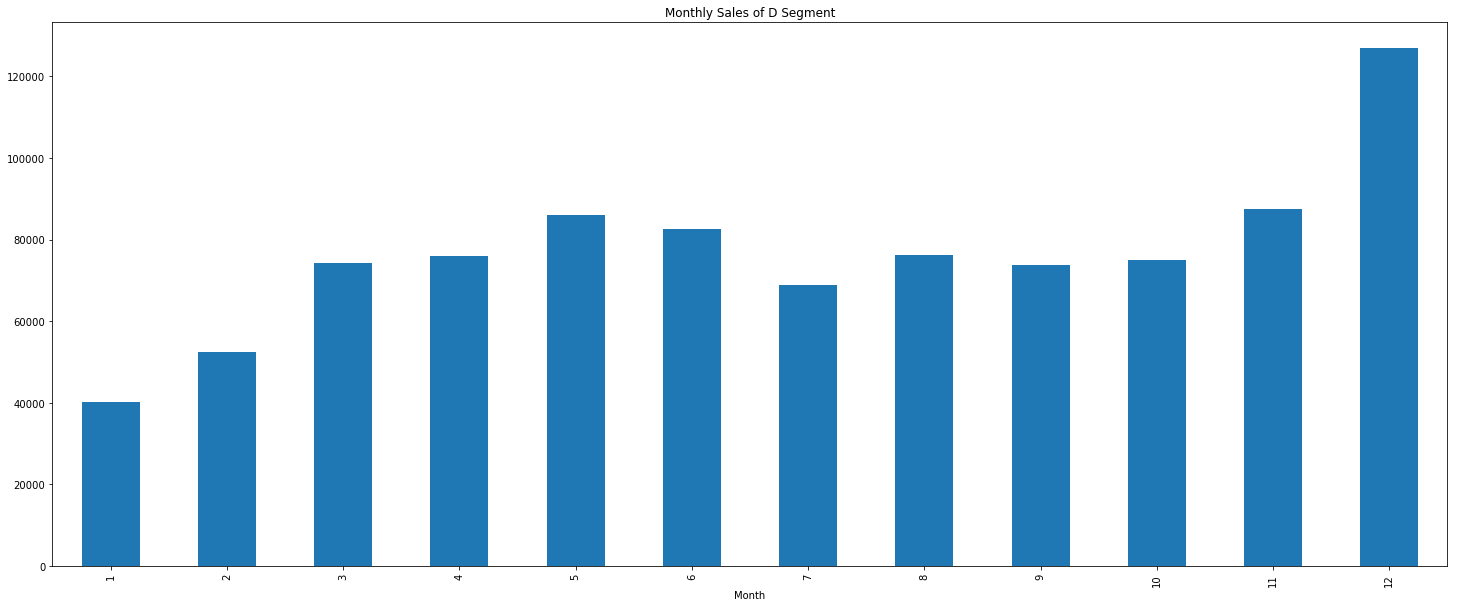

In [19]:
grouped = data['D'].groupby(dateDataset.index.month).sum().dropna()
plt = grouped.plot(kind="bar",figsize=(25,10))
plt.set_xlabel("Month")
plt.set_title("Monthly Sales of D Segment")

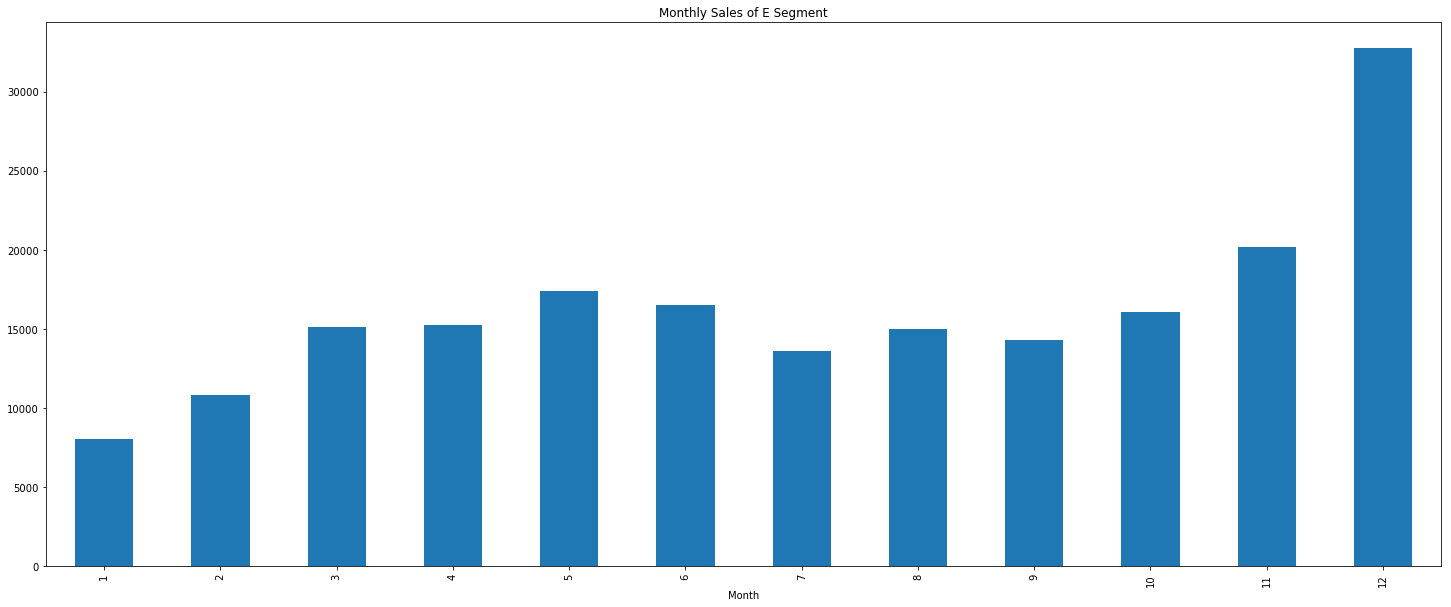

In [20]:
grouped = data['E'].groupby(dateDataset.index.month).sum().dropna()
plt = grouped.plot(kind="bar",figsize=(25,10))
plt.set_xlabel("Month")
plt.set_title("Monthly Sales of E Segment")

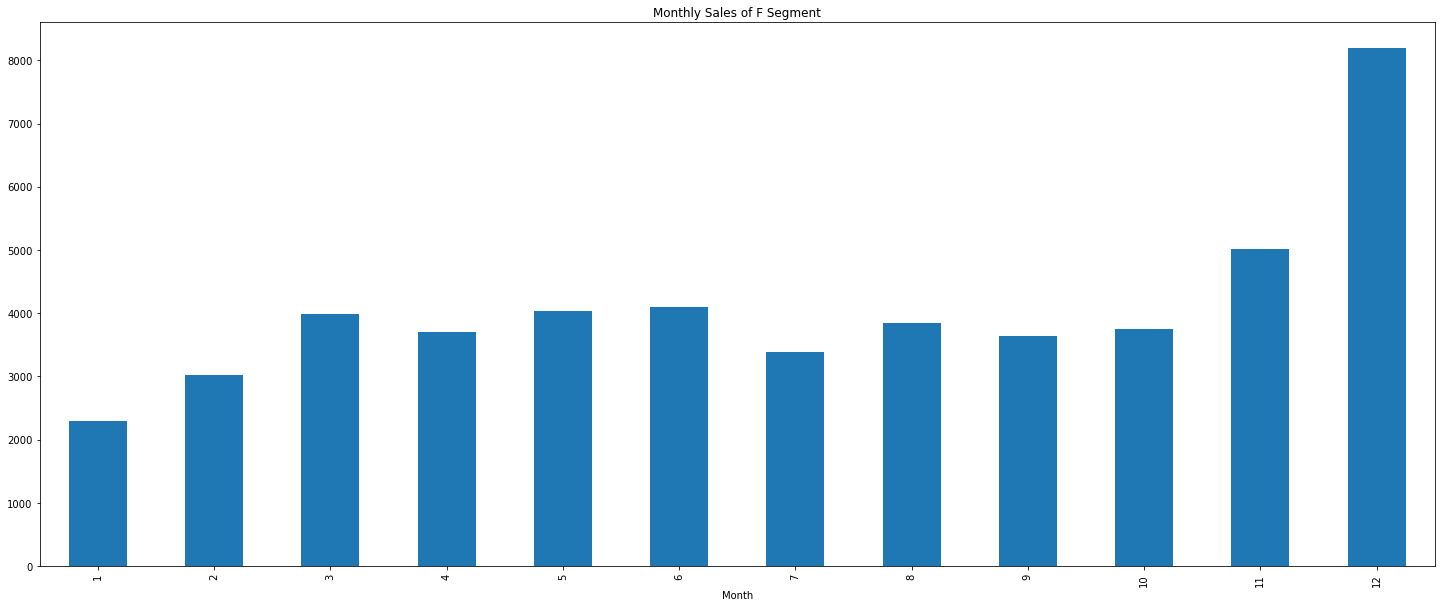

In [21]:
grouped = data['F'].groupby(dateDataset.index.month).sum().dropna()
plt = grouped.plot(kind="bar",figsize=(25,10))
plt.set_xlabel("Month")
plt.set_title("Monthly Sales of F Segment")

### Because of the shift NaN values did not included to train and test datasets

In [22]:
X_train = data.iloc[2:146,6:12].join(data.iloc[2:146,18:])
X_test = data.iloc[146:-1,6:12].join(data.iloc[146:-1,18:])
    
y_trainset = data.iloc[2:146,:6]
y_testset = data.iloc[146:-1,:6]

y_A_train = y_trainset['A']
y_A_test = y_testset['A']
y_B_train = y_trainset['B']
y_B_test = y_testset['B']
y_C_train = y_trainset['C']
y_C_test = y_testset['C']
y_D_train = y_trainset['D']
y_D_test = y_testset['D']
y_E_train = y_trainset['E']
y_E_test = y_testset['E']
y_F_train = y_trainset['F']
y_F_test = y_testset['F']
del y_trainset, y_testset

## Random Forest Regressor Applied

In [23]:
def rmsle(ytrue,ypred):
    return np.sqrt(mean_squared_error(ytrue,ypred))

from sklearn.metrics import mean_squared_error
from sklearn.ensemble import RandomForestRegressor    
rf = RandomForestRegressor(n_estimators=100,oob_score=True)


feature_cols = X_train.columns.values
features = data[feature_cols]

In [24]:
rf.fit(X_train,y_A_train)
predicted_A = rf.predict(X_test)
print("A, oob score: %.4F" % rf.oob_score_)
p_A = y_A_test.values
error = rmsle(predicted_A,p_A)
del p_A
print "Mean Squared Error on A prediction: ",error
del error

importances = rf.feature_importances_
indices = np.argsort(importances)
feature_cols = feature_cols[indices]
feat_imp_A = pd.DataFrame(feature_cols)
feat_imp_A.sort_index(ascending=False,inplace=True)



rf.fit(X_train,y_B_train)
predicted_B = rf.predict(X_test)
print("B, oob score: %.4F" % rf.oob_score_)
p_B = y_B_test.values
error = rmsle(predicted_B,p_B)
del p_B
print "Mean Squared Error on B prediction: ",error
del error

importances = rf.feature_importances_
indices = np.argsort(importances)
feature_cols = feature_cols[indices]
feat_imp_B = pd.DataFrame(feature_cols)
feat_imp_B.sort_index(ascending=False,inplace=True)



rf.fit(X_train,y_C_train)
predicted_C = rf.predict(X_test)
print("C, oob score: %.4F" % rf.oob_score_)
p_C = y_C_test.values
error = rmsle(predicted_C,p_C)
del p_C
print "Mean Squared Error on C prediction: ",error
del error

importances = rf.feature_importances_
indices = np.argsort(importances)
feature_cols = feature_cols[indices]
feat_imp_C = pd.DataFrame(feature_cols)
feat_imp_C.sort_index(ascending=False,inplace=True)



rf.fit(X_train,y_D_train)
predicted_D = rf.predict(X_test)
print("D, oob score: %.4F" % rf.oob_score_)
p_D = y_D_test.values
error = rmsle(predicted_D,p_D)
del p_D
print "Mean Squared Error on D prediction: ",error
del error

importances = rf.feature_importances_
indices = np.argsort(importances)
feature_cols = feature_cols[indices]
feat_imp_D = pd.DataFrame(feature_cols)
feat_imp_D.sort_index(ascending=False,inplace=True)



rf.fit(X_train,y_E_train)
predicted_E = rf.predict(X_test)
print("E, oob score: %.4F" % rf.oob_score_)
p_E = y_E_test.values
error = rmsle(predicted_E,p_E)
del p_E
print "Mean Squared Error on E prediction: ",error
del error

importances = rf.feature_importances_
indices = np.argsort(importances)
feature_cols = feature_cols[indices]
feat_imp_E = pd.DataFrame(feature_cols)
feat_imp_E.sort_index(ascending=False,inplace=True)



rf.fit(X_train,y_F_train)
predicted_F = rf.predict(X_test)
print("F, oob score: %.4F" % rf.oob_score_)
p_F = y_F_test.values
error = rmsle(predicted_F,p_F)
del p_F
print "Mean Squared Error on F prediction: ",error
del error

importances = rf.feature_importances_
indices = np.argsort(importances)
feature_cols = feature_cols[indices]
feat_imp_F = pd.DataFrame(feature_cols)
feat_imp_F.sort_index(ascending=False,inplace=True)
del feature_cols, features, importances, indices

A, oob score: 0.3353
Mean Squared Error on A prediction:  74.2194749727
B, oob score: 0.6256
Mean Squared Error on B prediction:  2802.90761936
C, oob score: 0.7736
Mean Squared Error on C prediction:  8332.86673492
D, oob score: 0.6488
Mean Squared Error on D prediction:  3328.04661382
E, oob score: 0.7565
Mean Squared Error on E prediction:  623.182594723
F, oob score: 0.5622
Mean Squared Error on F prediction:  124.29808124


## Decision Tree Regressor Applied

('Mean Absolute Error of prediction of A:', 115.78260869565217)
('Mean Squared Error of prediction of A:', 20935.956521739132)
('Root Mean Squared Error of prediction of A:', 144.69262773804039)


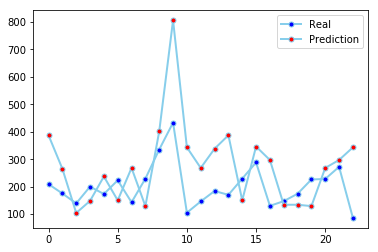

In [25]:
from sklearn.tree import DecisionTreeRegressor  
import matplotlib.pyplot as plt
regressor = DecisionTreeRegressor()  
regressor.fit(X_train, y_A_train)
y_predA = regressor.predict(X_test)  
dfA=pd.DataFrame({'Actual':y_A_test, 'Predicted':y_predA})  
dfA
from sklearn import metrics  

print('Mean Absolute Error of prediction of A:', metrics.mean_absolute_error(y_A_test, y_predA))  
print('Mean Squared Error of prediction of A:', metrics.mean_squared_error(y_A_test, y_predA))  
print('Root Mean Squared Error of prediction of A:', np.sqrt(metrics.mean_squared_error(y_A_test, y_predA)))

x = np.arange(0,23)
plt.plot(x, y_A_test, marker='o', markerfacecolor='blue', markersize=5, color='skyblue', linewidth=2)
plt.plot(x, y_predA, marker='o', markerfacecolor='red', markersize=5, color='skyblue', linewidth=2)
plt.legend(['Real', 'Prediction'], loc='upper right')
plt.label='A Segment'
plt.show()

('Mean Absolute Error of prediction of B:', 3119.2608695652175)
('Mean Squared Error of prediction of B:', 17077341.260869566)
('Root Mean Squared Error of prediction of B:', 4132.4739879241306)


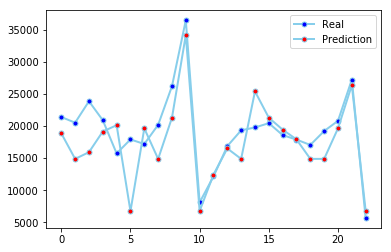

In [26]:
regressor = DecisionTreeRegressor()  
regressor.fit(X_train, y_B_train)
y_predB = regressor.predict(X_test)  
dfB=pd.DataFrame({'Actual':y_B_test, 'Predicted':y_predB})  
dfB 

print('Mean Absolute Error of prediction of B:', metrics.mean_absolute_error(y_B_test, y_predB))  
print('Mean Squared Error of prediction of B:', metrics.mean_squared_error(y_B_test, y_predB))  
print('Root Mean Squared Error of prediction of B:', np.sqrt(metrics.mean_squared_error(y_B_test, y_predB)))

x = np.arange(0,23)
plt.plot(x, y_B_test, marker='o', markerfacecolor='blue', markersize=5, color='skyblue', linewidth=2)
plt.plot(x, y_predB, marker='o', markerfacecolor='red', markersize=5, color='skyblue', linewidth=2)
plt.legend(['Real', 'Prediction'], loc='upper right')
plt.label='B Segment'
plt.show()

('Mean Absolute Error of prediction of C:', 7038.260869565217)
('Mean Squared Error of prediction of C:', 80774207.826086953)
('Root Mean Squared Error of prediction of C:', 8987.4472363450877)


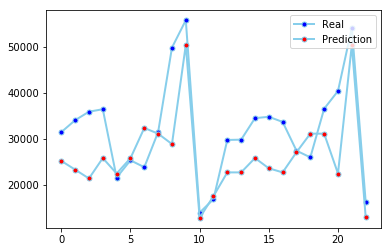

In [27]:
regressor = DecisionTreeRegressor()  
regressor.fit(X_train, y_C_train)
y_predC = regressor.predict(X_test)  
dfC=pd.DataFrame({'Actual':y_C_test, 'Predicted':y_predC})  
dfC

print('Mean Absolute Error of prediction of C:', metrics.mean_absolute_error(y_C_test, y_predC))  
print('Mean Squared Error of prediction of C:', metrics.mean_squared_error(y_C_test, y_predC))  
print('Root Mean Squared Error of prediction of C:', np.sqrt(metrics.mean_squared_error(y_C_test, y_predC)))

x = np.arange(0,23)
plt.plot(x, y_C_test, marker='o', markerfacecolor='blue', markersize=5, color='skyblue', linewidth=2)
plt.plot(x, y_predC, marker='o', markerfacecolor='red', markersize=5, color='skyblue', linewidth=2)
plt.legend(['Real', 'Prediction'], loc='upper right')
plt.label='C Segment'
plt.show()

('Mean Absolute Error of prediction of D:', 2892.6521739130435)
('Mean Squared Error of prediction of D:', 12053630.391304348)
('Root Mean Squared Error of prediction of D:', 3471.833865740748)


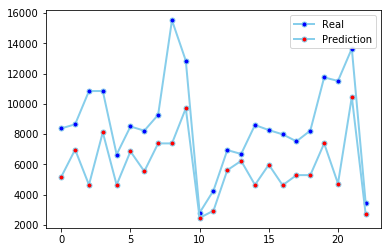

In [28]:
regressor = DecisionTreeRegressor()  
regressor.fit(X_train, y_D_train)
y_predD = regressor.predict(X_test)  
dfD=pd.DataFrame({'Actual':y_D_test, 'Predicted':y_predD})  
dfD

print('Mean Absolute Error of prediction of D:', metrics.mean_absolute_error(y_D_test, y_predD))  
print('Mean Squared Error of prediction of D:', metrics.mean_squared_error(y_D_test, y_predD))  
print('Root Mean Squared Error of prediction of D:', np.sqrt(metrics.mean_squared_error(y_D_test, y_predD)))

x = np.arange(0,23)
plt.plot(x, y_D_test, marker='o', markerfacecolor='blue', markersize=5, color='skyblue', linewidth=2)
plt.plot(x, y_predD, marker='o', markerfacecolor='red', markersize=5, color='skyblue', linewidth=2)
plt.legend(['Real', 'Prediction'], loc='upper right')
plt.label='D Segment'
plt.show()

('Mean Absolute Error of prediction of E:', 645.04347826086962)
('Mean Squared Error of prediction of E:', 748954.86956521741)
('Root Mean Squared Error of prediction of E:', 865.42178708720837)


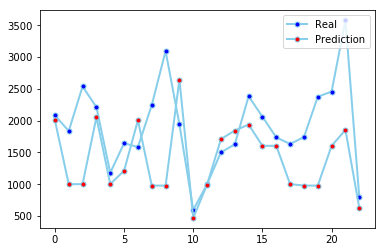

In [29]:
regressor = DecisionTreeRegressor()  
regressor.fit(X_train, y_E_train)
y_predE = regressor.predict(X_test)  
dfE=pd.DataFrame({'Actual':y_E_test, 'Predicted':y_predE})  
dfE

print('Mean Absolute Error of prediction of E:', metrics.mean_absolute_error(y_E_test, y_predE))  
print('Mean Squared Error of prediction of E:', metrics.mean_squared_error(y_E_test, y_predE))  
print('Root Mean Squared Error of prediction of E:', np.sqrt(metrics.mean_squared_error(y_E_test, y_predE)))

x = np.arange(0,23)
plt.plot(x, y_E_test, marker='o', markerfacecolor='blue', markersize=5, color='skyblue', linewidth=2)
plt.plot(x, y_predE, marker='o', markerfacecolor='red', markersize=5, color='skyblue', linewidth=2)
plt.legend(['Real', 'Prediction'], loc='upper right')
plt.label='E Segment'
plt.show()

('Mean Absolute Error of prediction of F:', 93.434782608695656)
('Mean Squared Error of prediction of F:', 14293.782608695652)
('Root Mean Squared Error of prediction of F:', 119.55660838571681)


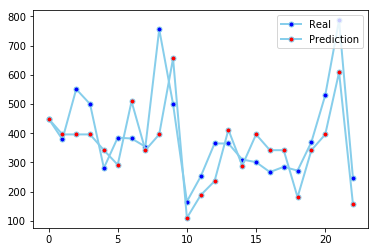

In [30]:
regressor = DecisionTreeRegressor()  
regressor.fit(X_train, y_F_train)
y_predF = regressor.predict(X_test)  
dfF=pd.DataFrame({'Actual':y_F_test, 'Predicted':y_predF})  
dfF

print('Mean Absolute Error of prediction of F:', metrics.mean_absolute_error(y_F_test, y_predF))  
print('Mean Squared Error of prediction of F:', metrics.mean_squared_error(y_F_test, y_predF))  
print('Root Mean Squared Error of prediction of F:', np.sqrt(metrics.mean_squared_error(y_F_test, y_predF)))

x = np.arange(0,23)
plt.plot(x, y_F_test, marker='o', markerfacecolor='blue', markersize=5, color='skyblue', linewidth=2)
plt.plot(x, y_predF, marker='o', markerfacecolor='red', markersize=5, color='skyblue', linewidth=2)
plt.legend(['Real', 'Prediction'], loc='upper right')
plt.label='F Segment'
plt.show()

## Classifying Data

In [31]:
classified = data.iloc[2:-1,12:].copy()
classified['A Sell Diff'] = pd.qcut(classified['A Sell Diff'],2,labels=[0,1]).astype(int)
classified['B Sell Diff'] = pd.qcut(classified['B Sell Diff'],2,labels=[0,1]).astype(int)
classified['C Sell Diff'] = pd.qcut(classified['C Sell Diff'],2,labels=[0,1]).astype(int)
classified['D Sell Diff'] = pd.qcut(classified['D Sell Diff'],2,labels=[0,1]).astype(int)
classified['E Sell Diff'] = pd.qcut(classified['E Sell Diff'],2,labels=[0,1]).astype(int)
classified['F Sell Diff'] = pd.qcut(classified['F Sell Diff'],2,labels=[0,1]).astype(int)

classified['A Sell Diff -1'] = pd.qcut(classified['A Sell Diff -1'],5,labels=[1,2,3,4,5]).astype(int)
classified['A Sell Diff -2'] = pd.qcut(classified['A Sell Diff -2'],5,labels=[1,2,3,4,5]).astype(int)
classified['A Sell Diff -3'] = pd.qcut(classified['A Sell Diff -3'],5,labels=[1,2,3,4,5]).astype(int)
classified['A Sell Diff -6'] = pd.qcut(classified['A Sell Diff -6'],5,labels=[1,2,3,4,5]).astype(int)
classified['A Sell Diff -9'] = pd.qcut(classified['A Sell Diff -9'],5,labels=[1,2,3,4,5]).astype(int)
classified['A Sell Diff -12'] = pd.qcut(classified['A Sell Diff -12'],5,labels=[1,2,3,4,5]).astype(int)

classified['B Sell Diff -1'] = pd.qcut(classified['B Sell Diff -1'],5,labels=[1,2,3,4,5]).astype(int)
classified['B Sell Diff -2'] = pd.qcut(classified['B Sell Diff -2'],5,labels=[1,2,3,4,5]).astype(int)
classified['B Sell Diff -3'] = pd.qcut(classified['B Sell Diff -3'],5,labels=[1,2,3,4,5]).astype(int)
classified['B Sell Diff -6'] = pd.qcut(classified['B Sell Diff -6'],5,labels=[1,2,3,4,5]).astype(int)
classified['B Sell Diff -9'] = pd.qcut(classified['B Sell Diff -9'],5,labels=[1,2,3,4,5]).astype(int)
classified['B Sell Diff -12'] = pd.qcut(classified['B Sell Diff -12'],5,labels=[1,2,3,4,5]).astype(int)

classified['C Sell Diff -1'] = pd.qcut(classified['C Sell Diff -1'],5,labels=[1,2,3,4,5]).astype(int)
classified['C Sell Diff -2'] = pd.qcut(classified['C Sell Diff -2'],5,labels=[1,2,3,4,5]).astype(int)
classified['C Sell Diff -3'] = pd.qcut(classified['C Sell Diff -3'],5,labels=[1,2,3,4,5]).astype(int)
classified['C Sell Diff -6'] = pd.qcut(classified['C Sell Diff -6'],5,labels=[1,2,3,4,5]).astype(int)
classified['C Sell Diff -9'] = pd.qcut(classified['C Sell Diff -9'],5,labels=[1,2,3,4,5]).astype(int)
classified['C Sell Diff -12'] = pd.qcut(classified['C Sell Diff -12'],5,labels=[1,2,3,4,5]).astype(int)

classified['D Sell Diff -1'] = pd.qcut(classified['D Sell Diff -1'],5,labels=[1,2,3,4,5]).astype(int)
classified['D Sell Diff -2'] = pd.qcut(classified['D Sell Diff -2'],5,labels=[1,2,3,4,5]).astype(int)
classified['D Sell Diff -3'] = pd.qcut(classified['D Sell Diff -3'],5,labels=[1,2,3,4,5]).astype(int)
classified['D Sell Diff -6'] = pd.qcut(classified['D Sell Diff -6'],5,labels=[1,2,3,4,5]).astype(int)
classified['D Sell Diff -9'] = pd.qcut(classified['D Sell Diff -9'],5,labels=[1,2,3,4,5]).astype(int)
classified['D Sell Diff -12'] = pd.qcut(classified['D Sell Diff -12'],5,labels=[1,2,3,4,5]).astype(int)

classified['E Sell Diff -1'] = pd.qcut(classified['E Sell Diff -1'],5,labels=[1,2,3,4,5]).astype(int)
classified['E Sell Diff -2'] = pd.qcut(classified['E Sell Diff -2'],5,labels=[1,2,3,4,5]).astype(int)
classified['E Sell Diff -3'] = pd.qcut(classified['E Sell Diff -3'],5,labels=[1,2,3,4,5]).astype(int)
classified['E Sell Diff -6'] = pd.qcut(classified['E Sell Diff -6'],5,labels=[1,2,3,4,5]).astype(int)
classified['E Sell Diff -9'] = pd.qcut(classified['E Sell Diff -9'],5,labels=[1,2,3,4,5]).astype(int)
classified['E Sell Diff -12'] = pd.qcut(classified['E Sell Diff -12'],5,labels=[1,2,3,4,5]).astype(int)

classified['F Sell Diff -1'] = pd.qcut(classified['F Sell Diff -1'],5,labels=[1,2,3,4,5]).astype(int)
classified['F Sell Diff -2'] = pd.qcut(classified['F Sell Diff -2'],5,labels=[1,2,3,4,5]).astype(int)
classified['F Sell Diff -3'] = pd.qcut(classified['F Sell Diff -3'],5,labels=[1,2,3,4,5]).astype(int)
classified['F Sell Diff -6'] = pd.qcut(classified['F Sell Diff -6'],5,labels=[1,2,3,4,5]).astype(int)
classified['F Sell Diff -9'] = pd.qcut(classified['F Sell Diff -9'],5,labels=[1,2,3,4,5]).astype(int)
classified['F Sell Diff -12'] = pd.qcut(classified['F Sell Diff -12'],5,labels=[1,2,3,4,5]).astype(int)

classified['USD Diff -1'] = pd.qcut(classified['USD Diff -1'],5,labels=[1,2,3,4,5]).astype(int)
classified['USD Diff -2'] = pd.qcut(classified['USD Diff -2'],5,labels=[1,2,3,4,5]).astype(int)
classified['USD Diff -3'] = pd.qcut(classified['USD Diff -3'],5,labels=[1,2,3,4,5]).astype(int)
classified['USD Diff -6'] = pd.qcut(classified['USD Diff -6'],5,labels=[1,2,3,4,5]).astype(int)
classified['USD Diff -9'] = pd.qcut(classified['USD Diff -9'],5,labels=[1,2,3,4,5]).astype(int)
classified['USD Diff -12'] = pd.qcut(classified['USD Diff -12'],5,labels=[1,2,3,4,5]).astype(int)

classified['EUR Diff -1'] = pd.qcut(classified['EUR Diff -1'],5,labels=[1,2,3,4,5]).astype(int)
classified['EUR Diff -2'] = pd.qcut(classified['EUR Diff -2'],5,labels=[1,2,3,4,5]).astype(int)
classified['EUR Diff -3'] = pd.qcut(classified['EUR Diff -3'],5,labels=[1,2,3,4,5]).astype(int)
classified['EUR Diff -6'] = pd.qcut(classified['EUR Diff -6'],5,labels=[1,2,3,4,5]).astype(int)
classified['EUR Diff -9'] = pd.qcut(classified['EUR Diff -9'],5,labels=[1,2,3,4,5]).astype(int)
classified['EUR Diff -12'] = pd.qcut(classified['EUR Diff -12'],5,labels=[1,2,3,4,5]).astype(int)

classified['BIST Diff -1'] = pd.qcut(classified['BIST Diff -1'],5,labels=[1,2,3,4,5]).astype(int)
classified['BIST Diff -2'] = pd.qcut(classified['BIST Diff -2'],5,labels=[1,2,3,4,5]).astype(int)
classified['BIST Diff -3'] = pd.qcut(classified['BIST Diff -3'],5,labels=[1,2,3,4,5]).astype(int)
classified['BIST Diff -6'] = pd.qcut(classified['BIST Diff -6'],5,labels=[1,2,3,4,5]).astype(int)
classified['BIST Diff -9'] = pd.qcut(classified['BIST Diff -9'],5,labels=[1,2,3,4,5]).astype(int)
classified['BIST Diff -12'] = pd.qcut(classified['BIST Diff -12'],5,labels=[1,2,3,4,5]).astype(int)

classified['Export Diff -1'] = pd.qcut(classified['Export Diff -1'],5,labels=[1,2,3,4,5]).astype(int)
classified['Export Diff -2'] = pd.qcut(classified['Export Diff -2'],5,labels=[1,2,3,4,5]).astype(int)
classified['Export Diff -3'] = pd.qcut(classified['Export Diff -3'],5,labels=[1,2,3,4,5]).astype(int)
classified['Export Diff -6'] = pd.qcut(classified['Export Diff -6'],5,labels=[1,2,3,4,5]).astype(int)
classified['Export Diff -9'] = pd.qcut(classified['Export Diff -9'],5,labels=[1,2,3,4,5]).astype(int)
classified['Export Diff -12'] = pd.qcut(classified['Export Diff -12'],5,labels=[1,2,3,4,5]).astype(int)

classified['Import Diff -1'] = pd.qcut(classified['Import Diff -1'],5,labels=[1,2,3,4,5]).astype(int)
classified['Import Diff -2'] = pd.qcut(classified['Import Diff -2'],5,labels=[1,2,3,4,5]).astype(int)
classified['Import Diff -3'] = pd.qcut(classified['Import Diff -3'],5,labels=[1,2,3,4,5]).astype(int)
classified['Import Diff -6'] = pd.qcut(classified['Import Diff -6'],5,labels=[1,2,3,4,5]).astype(int)
classified['Import Diff -9'] = pd.qcut(classified['Import Diff -9'],5,labels=[1,2,3,4,5]).astype(int)
classified['Import Diff -12'] = pd.qcut(classified['Import Diff -12'],5,labels=[1,2,3,4,5]).astype(int)

## Now, the objective is predicting the increment or decrement since targerts classified binary

In [163]:
X_train = classified.iloc[:143,6:]
X_test = classified.iloc[143:,6:]

y_trainset = classified.iloc[:143,:6]
y_testset = classified.iloc[143:,:6]

y_A_train = y_trainset['A Sell Diff']
y_A_test = y_testset['A Sell Diff']
y_B_train = y_trainset['B Sell Diff']
y_B_test = y_testset['B Sell Diff']
y_C_train = y_trainset['C Sell Diff']
y_C_test = y_testset['C Sell Diff']
y_D_train = y_trainset['D Sell Diff']
y_D_test = y_testset['D Sell Diff']
y_E_train = y_trainset['E Sell Diff']
y_E_test = y_testset['E Sell Diff']
y_F_train = y_trainset['F Sell Diff']
y_F_test = y_testset['F Sell Diff']
del y_trainset, y_testset

In [164]:
predictedA_df = pd.DataFrame(X_test.index)
predictedB_df = pd.DataFrame(X_test.index)
predictedC_df = pd.DataFrame(X_test.index)
predictedD_df = pd.DataFrame(X_test.index)
predictedE_df = pd.DataFrame(X_test.index)
predictedF_df = pd.DataFrame(X_test.index)

predictedA_df.index = pd.to_datetime(predictedA_df[0],format = '%Y%m')
predictedB_df.index = pd.to_datetime(predictedB_df[0],format = '%Y%m')
predictedC_df.index = pd.to_datetime(predictedC_df[0],format = '%Y%m')
predictedD_df.index = pd.to_datetime(predictedD_df[0],format = '%Y%m')
predictedE_df.index = pd.to_datetime(predictedE_df[0],format = '%Y%m')
predictedF_df.index = pd.to_datetime(predictedF_df[0],format = '%Y%m')

## Random Forest Classifier Applied

In [165]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(criterion='gini', 
                             n_estimators=1000,
                             min_samples_split=10,
                             min_samples_leaf=1,
                             max_features='auto',
                             oob_score=True,
                             random_state=1,
                             n_jobs=-1)

rf.fit(X_train, y_A_train)
print "Random Forest Classifier For A"
print("oob Score: "+"%.4f" % rf.oob_score_)

predicted_A = rf.predict(X_test)

print ("Original A values:  " + str(y_A_test.values))
print ("Predicted A values: " + str(predicted_A))
print ("Error: " + str(np.mean(y_A_test.values != predicted_A)))


feature_cols = X_train.columns.values
features = data[feature_cols]


importances = rf.feature_importances_
indices = np.argsort(importances)
feature_cols = feature_cols[indices]
feat_rfc_A = pd.DataFrame(feature_cols)
feat_rfc_A.sort_index(ascending=False,inplace=True)



rf.fit(X_train, y_B_train)
print "Random Forest Classifier For B"
print("oob Score: "+"%.4f" % rf.oob_score_)

predicted_B = rf.predict(X_test)

print "Original B values:   " + str(y_B_test.values)
print "Predicted B values:  " + str(predicted_B)
print ("Error: " + str(np.mean(y_B_test.values != predicted_B)))



importances = rf.feature_importances_
indices = np.argsort(importances)
feature_cols = feature_cols[indices]
feat_rfc_B = pd.DataFrame(feature_cols)
feat_rfc_B.sort_index(ascending=False,inplace=True)



rf.fit(X_train, y_C_train)
print "Random Forest Classifier For C"
print("oob Score: "+"%.4f" % rf.oob_score_)

predicted_C = rf.predict(X_test)

print "Original C values:   " + str(y_C_test.values)
print "Predicted C values:  " + str(predicted_C)
print ("Error: " + str(np.mean(y_C_test.values != predicted_C)))

importances = rf.feature_importances_
indices = np.argsort(importances)
feature_cols = feature_cols[indices]
feat_rfc_C = pd.DataFrame(feature_cols)
feat_rfc_C.sort_index(ascending=False,inplace=True)


rf.fit(X_train, y_D_train)
print "Random Forest Classifier For D"
print("oob Score: "+"%.4f" % rf.oob_score_)

predicted_D = rf.predict(X_test)

print "Original D values:   " + str(y_D_test.values)
print "Predicted D values:  "  + str(predicted_D)
print ("Error: " + str(np.mean(y_D_test.values != predicted_D)))


importances = rf.feature_importances_
indices = np.argsort(importances)
feature_cols = feature_cols[indices]
feat_rfc_D = pd.DataFrame(feature_cols)
feat_rfc_D.sort_index(ascending=False,inplace=True)


rf.fit(X_train, y_E_train)
print "Random Forest Classifier For E"
print("oob Score: "+"%.4f" % rf.oob_score_)

predicted_E = rf.predict(X_test)

print "Original E values:   " + str(y_E_test.values)
print "Predicted E values:  "  + str(predicted_E)
print ("Error: " + str(np.mean(y_E_test.values != predicted_E)))

importances = rf.feature_importances_
indices = np.argsort(importances)
feature_cols = feature_cols[indices]
feat_rfc_E = pd.DataFrame(feature_cols)
feat_rfc_E.sort_index(ascending=False,inplace=True)



rf.fit(X_train, y_F_train)
print "Random Forest Classifier For F"
print("oob Score: "+"%.4f" % rf.oob_score_)

predicted_F = rf.predict(X_test)

print "Original F values:   " + str(y_F_test.values)
print "Predicted F values:  "  + str(predicted_F)
print ("Error: " + str(np.mean(y_F_test.values != predicted_F)))

importances = rf.feature_importances_
indices = np.argsort(importances)
feature_cols = feature_cols[indices]
feat_rfc_F = pd.DataFrame(feature_cols)
feat_rfc_F.sort_index(ascending=False,inplace=True)

del feature_cols, features, importances, indices

Random Forest Classifier For A
oob Score: 0.5804
Original A values:  [0 1 0 0 1 0 1 0 1 1 1 0 1 1 0 1 1 0 1 1 1 0 1 0]
Predicted A values: [1 1 1 1 1 0 0 1 1 1 0 0 0 0 1 1 0 0 0 0 1 1 1 0]
Error: 0.541666666667
Random Forest Classifier For B
oob Score: 0.6783
Original B values:   [1 1 0 1 0 0 1 0 1 1 1 0 1 1 1 0 0 0 0 0 1 1 1 0]
Predicted B values:  [1 1 1 0 0 0 1 0 1 0 0 0 1 1 1 1 0 0 0 0 1 0 1 0]
Error: 0.25
Random Forest Classifier For C
oob Score: 0.7483
Original C values:   [1 1 1 0 0 0 1 0 1 1 1 0 1 1 0 1 0 0 0 0 1 1 1 0]
Predicted C values:  [1 1 1 0 0 0 1 0 1 1 0 0 1 1 1 0 0 0 0 1 1 0 1 0]
Error: 0.208333333333
Random Forest Classifier For D
oob Score: 0.7063
Original D values:   [1 1 0 1 0 0 1 0 1 1 0 0 1 1 0 1 0 0 0 1 1 0 1 0]
Predicted D values:  [1 1 1 0 0 0 1 0 1 0 0 0 1 1 1 1 0 0 1 0 0 0 1 0]
Error: 0.291666666667
Random Forest Classifier For E
oob Score: 0.7063
Original E values:   [1 1 0 1 0 0 1 0 1 1 0 0 1 1 1 1 0 0 0 0 1 0 1 0]
Predicted E values:  [1 1 0 0 0 0 1 0 1 

In [166]:
predictedA_df['RFC'] = np.equal(predicted_A,y_A_test.values)
predictedB_df['RFC'] = np.equal(predicted_B,y_B_test.values)
predictedC_df['RFC'] = np.equal(predicted_C,y_C_test.values)
predictedD_df['RFC'] = np.equal(predicted_D,y_D_test.values)
predictedE_df['RFC'] = np.equal(predicted_E,y_E_test.values)
predictedF_df['RFC'] = np.equal(predicted_F,y_F_test.values)

predictedA_df['RFC'].astype(str)
predictedA_df['RFC'].replace([False,True],[0,1],inplace=True)

predictedB_df['RFC'].astype(str)
predictedB_df['RFC'].replace([False,True],[0,1],inplace=True)

predictedC_df['RFC'].astype(str)
predictedC_df['RFC'].replace([False,True],[0,1],inplace=True)

predictedD_df['RFC'].astype(str)
predictedD_df['RFC'].replace([False,True],[0,1],inplace=True)

predictedE_df['RFC'].astype(str)
predictedE_df['RFC'].replace([False,True],[0,1],inplace=True)

predictedF_df['RFC'].astype(str)
predictedF_df['RFC'].replace([False,True],[0,1],inplace=True)

predictedA_df = predictedA_df.iloc[:,1:]
predictedB_df = predictedB_df.iloc[:,1:]
predictedC_df = predictedC_df.iloc[:,1:]
predictedD_df = predictedD_df.iloc[:,1:]
predictedE_df = predictedE_df.iloc[:,1:]
predictedF_df = predictedF_df.iloc[:,1:]

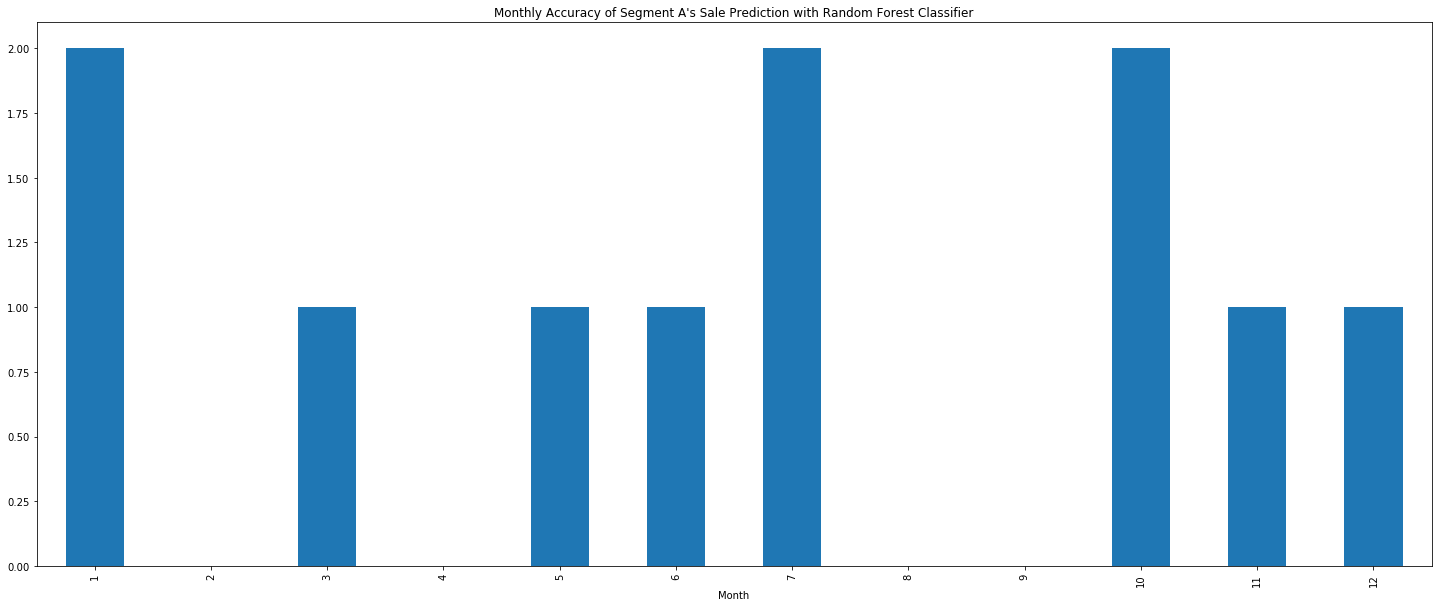

In [167]:
rfA = predictedA_df['RFC'].groupby(predictedA_df.index.month).sum().dropna()
plt = rfA.plot(kind="bar",figsize=(25,10))
plt.set_xlabel("Month")
plt.set_title("Monthly Accuracy of Segment A's Sale Prediction with Random Forest Classifier")

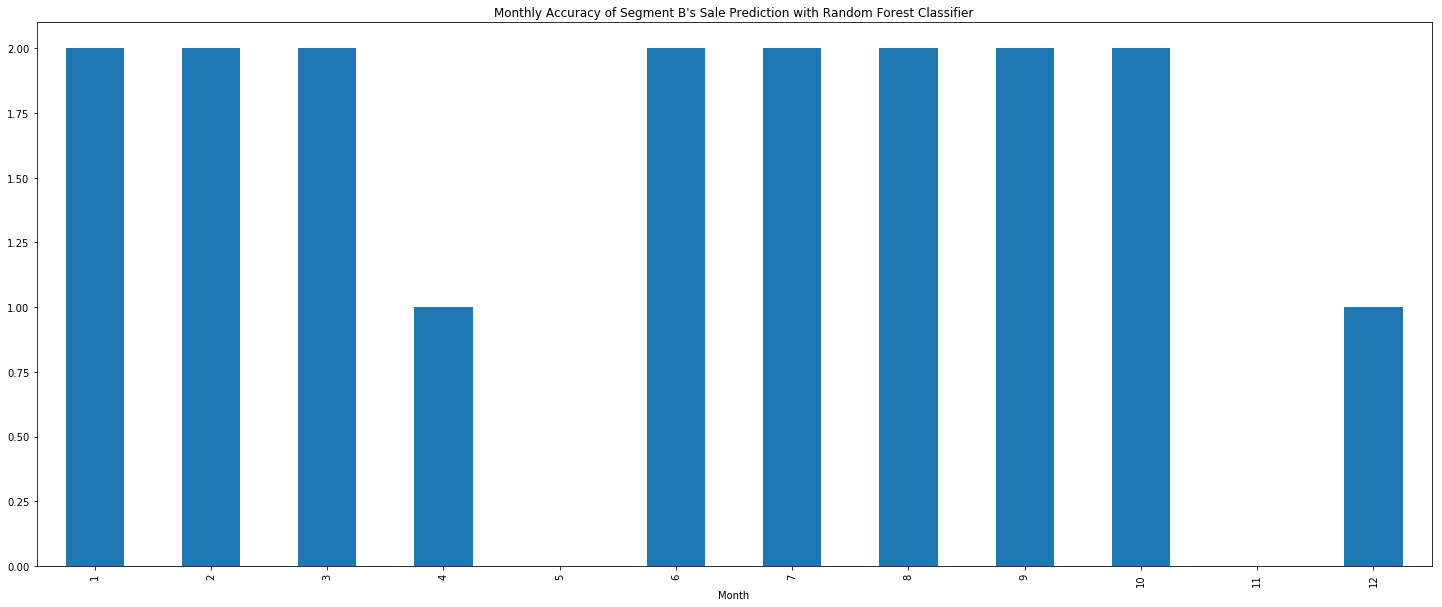

In [168]:
rfB = predictedB_df['RFC'].groupby(predictedB_df.index.month).sum().dropna()
plt = rfB.plot(kind="bar",figsize=(25,10))
plt.set_xlabel("Month")
plt.set_title("Monthly Accuracy of Segment B's Sale Prediction with Random Forest Classifier")

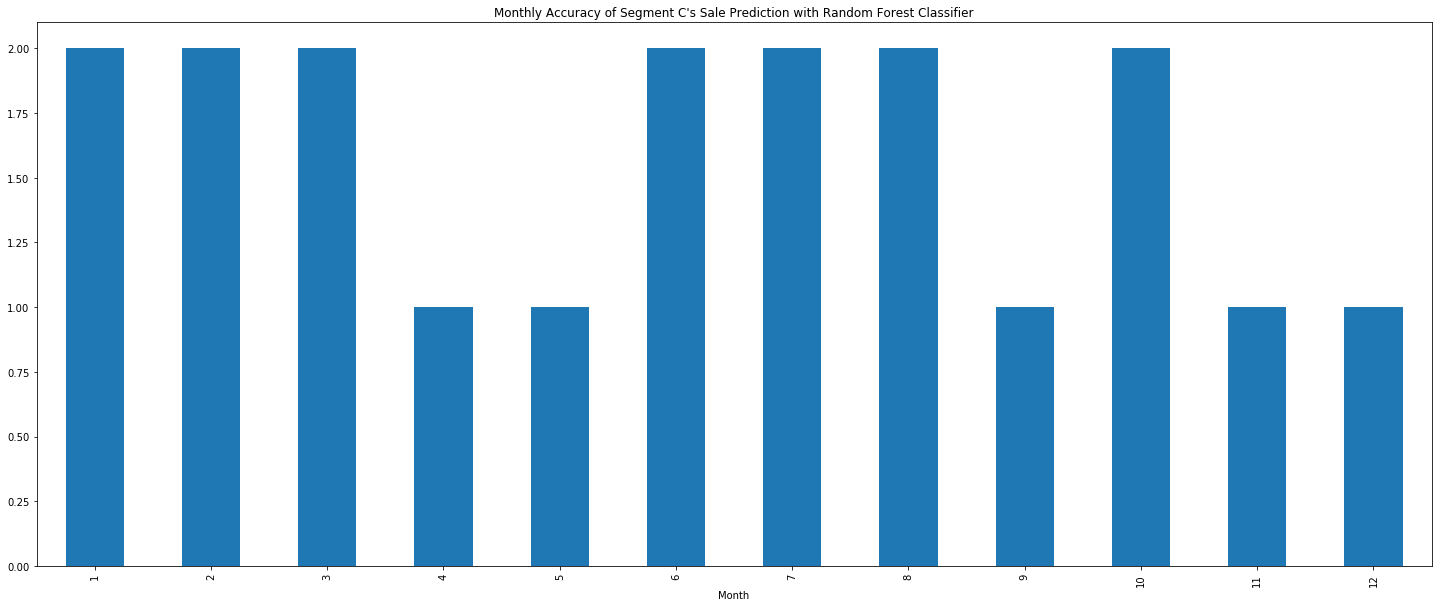

In [169]:
rfC = predictedC_df['RFC'].groupby(predictedC_df.index.month).sum().dropna()
plt = rfC.plot(kind="bar",figsize=(25,10))
plt.set_xlabel("Month")
plt.set_title("Monthly Accuracy of Segment C's Sale Prediction with Random Forest Classifier")

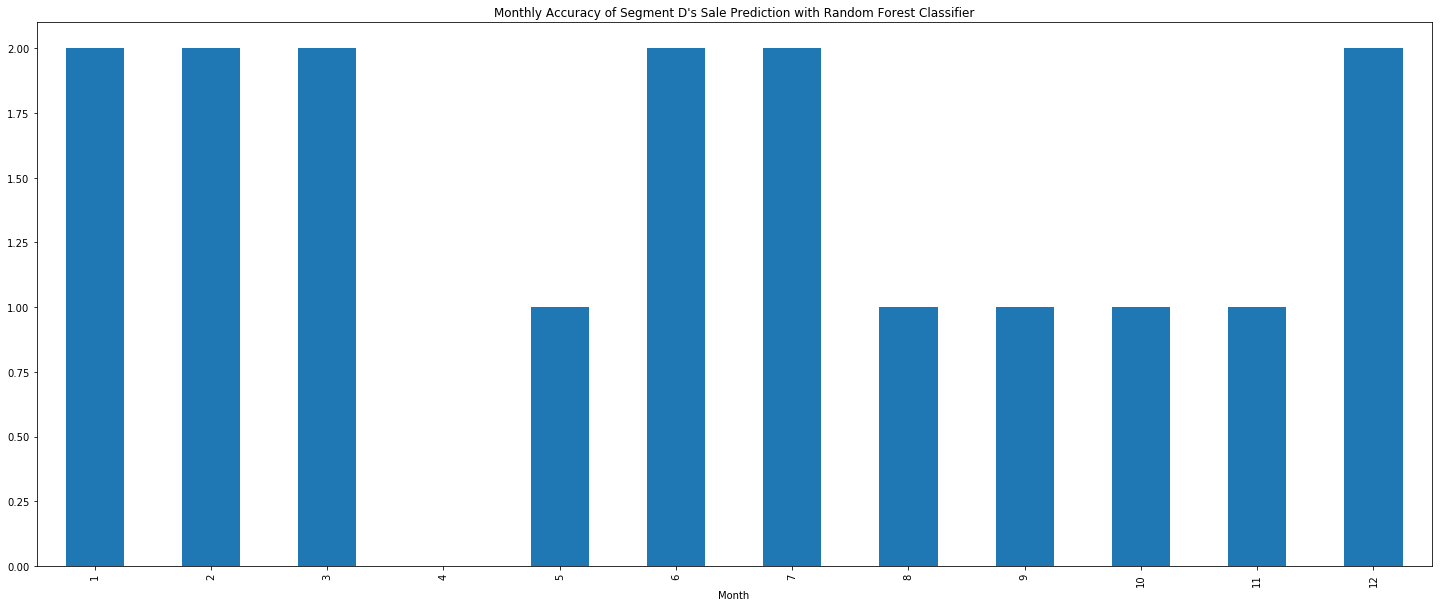

In [170]:
rfD = predictedD_df['RFC'].groupby(predictedD_df.index.month).sum().dropna()
plt = rfD.plot(kind="bar",figsize=(25,10))
plt.set_xlabel("Month")
plt.set_title("Monthly Accuracy of Segment D's Sale Prediction with Random Forest Classifier")

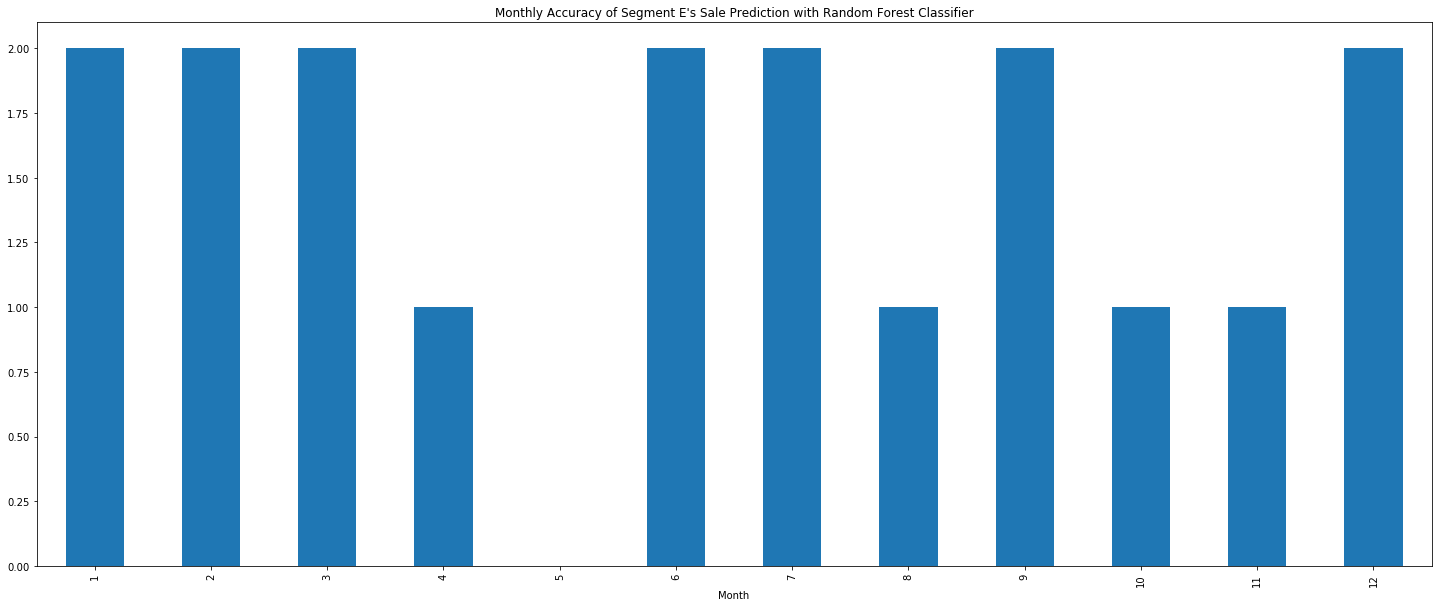

In [171]:
rfE = predictedE_df['RFC'].groupby(predictedE_df.index.month).sum().dropna()
plt = rfE.plot(kind="bar",figsize=(25,10))
plt.set_xlabel("Month")
plt.set_title("Monthly Accuracy of Segment E's Sale Prediction with Random Forest Classifier")

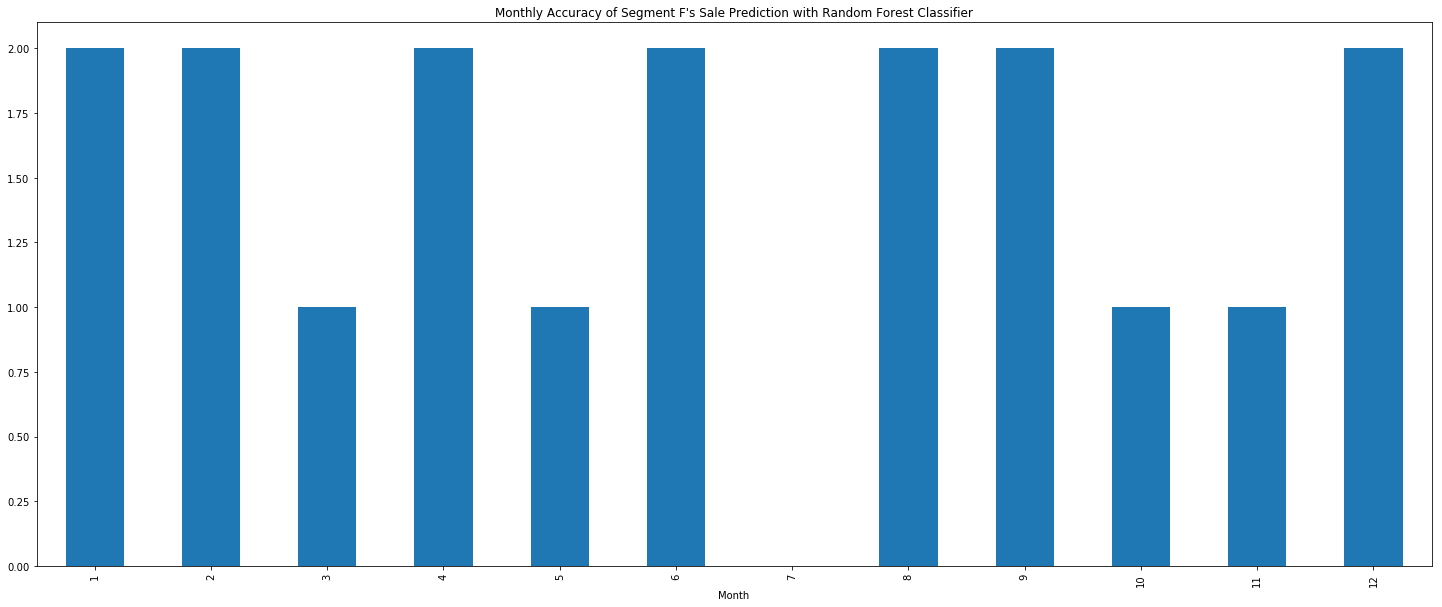

In [172]:
rfF = predictedF_df['RFC'].groupby(predictedF_df.index.month).sum().dropna()
plt = rfF.plot(kind="bar",figsize=(25,10))
plt.set_xlabel("Month")
plt.set_title("Monthly Accuracy of Segment F's Sale Prediction with Random Forest Classifier")

### Monthly Accuracy of All Segment's Sale Prediction with Random Forest Classifier

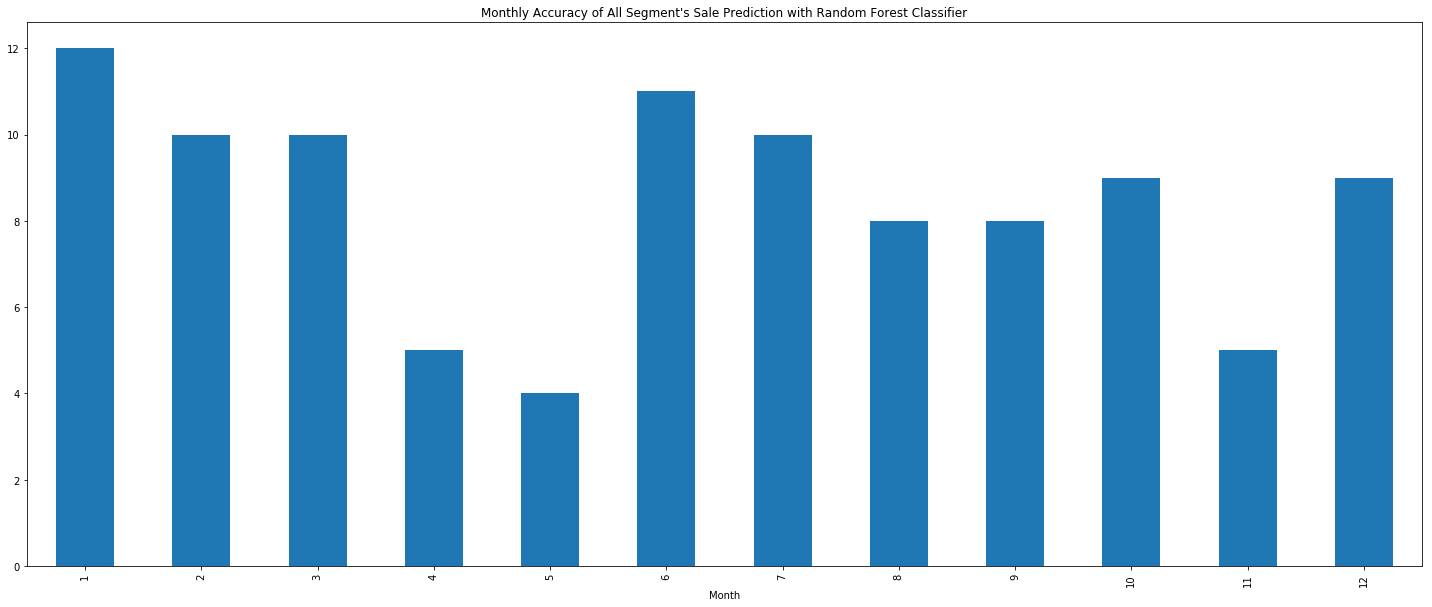

In [179]:
totalRFC = predictedA_df.copy()
totalRFC['RFC'] = predictedA_df['RFC']+predictedB_df['RFC']+predictedC_df['RFC']+predictedD_df['RFC']+predictedE_df['RFC']+predictedF_df['RFC']

rfTotal = totalRFC['RFC'].groupby(totalRFC.index.month).sum().dropna()
plt = rfTotal.plot(kind="bar",figsize=(25,10))
plt.set_xlabel("Month")
plt.set_title("Monthly Accuracy of All Segment's Sale Prediction with Random Forest Classifier")

## Decision Tree Classifier Applied

In [180]:
from sklearn.cross_validation import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn import tree
from sklearn.metrics import classification_report, confusion_matrix

In [181]:
classifier = DecisionTreeClassifier()  
classifier.fit(X_train, y_A_train)
y_pred = classifier.predict(X_test)
print("Trained for A:")
print(confusion_matrix(y_A_test, y_pred))  
print(classification_report(y_A_test, y_pred))

predictedA_df['DTC'] = np.equal(y_pred,y_A_test.values)

classifierB = DecisionTreeClassifier()  
classifierB.fit(X_train, y_B_train)
y_predB = classifierB.predict(X_test)  
print("Trained for B:")
print(confusion_matrix(y_B_test, y_predB))  
print(classification_report(y_B_test, y_predB))

predictedB_df['DTC'] = np.equal(y_predB,y_B_test.values)

classifierC = DecisionTreeClassifier()  
classifierC.fit(X_train, y_C_train)
y_predC = classifierC.predict(X_test)  
print("Trained for C:")
print(confusion_matrix(y_C_test, y_predC))  
print(classification_report(y_C_test, y_predC)) 

predictedC_df['DTC'] = np.equal(y_predC,y_C_test.values)

classifierD = DecisionTreeClassifier()  
classifierD.fit(X_train, y_D_train)
y_predD = classifierD.predict(X_test)
print("Trained for D:")  
print(confusion_matrix(y_D_test, y_predD))  
print(classification_report(y_D_test, y_predD)) 

predictedD_df['DTC'] = np.equal(y_predD,y_D_test.values)

classifierE = DecisionTreeClassifier()  
classifierE.fit(X_train, y_E_train)
y_predE = classifierE.predict(X_test)  
print("Trained for E:")  
print(confusion_matrix(y_E_test, y_predE))  
print(classification_report(y_E_test, y_predE)) 

predictedE_df['DTC'] = np.equal(y_predE,y_E_test.values)

classifierF = DecisionTreeClassifier()  
classifierF.fit(X_train, y_F_train)
y_predF = classifierE.predict(X_test)  
print("Trained for F:")  
print(confusion_matrix(y_F_test, y_predF))  
print(classification_report(y_F_test, y_predF))

predictedF_df['DTC'] = np.equal(y_predF,y_F_test.values)

Trained for A:
[[ 6  4]
 [13  1]]
             precision    recall  f1-score   support

          0       0.32      0.60      0.41        10
          1       0.20      0.07      0.11        14

avg / total       0.25      0.29      0.23        24

Trained for B:
[[9 2]
 [6 7]]
             precision    recall  f1-score   support

          0       0.60      0.82      0.69        11
          1       0.78      0.54      0.64        13

avg / total       0.70      0.67      0.66        24

Trained for C:
[[8 3]
 [4 9]]
             precision    recall  f1-score   support

          0       0.67      0.73      0.70        11
          1       0.75      0.69      0.72        13

avg / total       0.71      0.71      0.71        24

Trained for D:
[[10  2]
 [ 3  9]]
             precision    recall  f1-score   support

          0       0.77      0.83      0.80        12
          1       0.82      0.75      0.78        12

avg / total       0.79      0.79      0.79        24

Trained for 

In [182]:
predictedA_df['DTC'].astype(str)
predictedA_df['DTC'].replace([False,True],[0,1],inplace=True)

predictedB_df['DTC'].astype(str)
predictedB_df['DTC'].replace([False,True],[0,1],inplace=True)

predictedC_df['DTC'].astype(str)
predictedC_df['DTC'].replace([False,True],[0,1],inplace=True)

predictedD_df['DTC'].astype(str)
predictedD_df['DTC'].replace([False,True],[0,1],inplace=True)

predictedE_df['DTC'].astype(str)
predictedE_df['DTC'].replace([False,True],[0,1],inplace=True)

predictedF_df['DTC'].astype(str)
predictedF_df['DTC'].replace([False,True],[0,1],inplace=True)

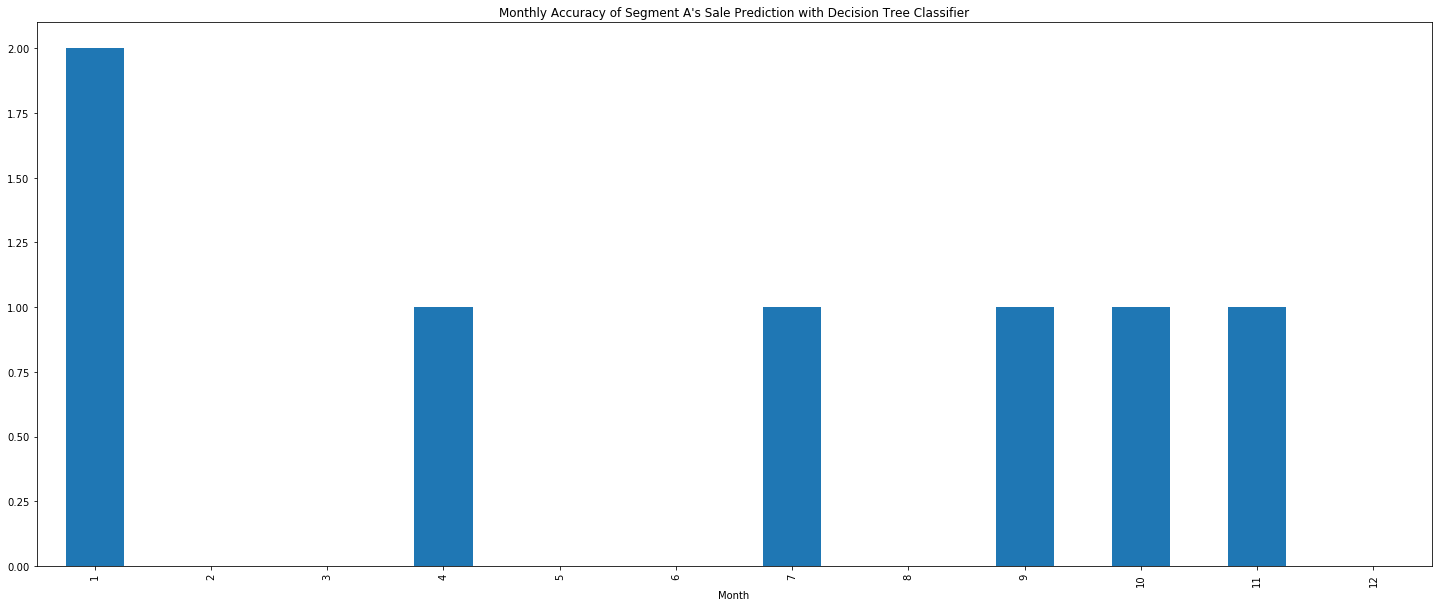

In [183]:
dtA = predictedA_df['DTC'].groupby(predictedA_df.index.month).sum().dropna()
plt = dtA.plot(kind="bar",figsize=(25,10))
plt.set_xlabel("Month")
plt.set_title("Monthly Accuracy of Segment A's Sale Prediction with Decision Tree Classifier")

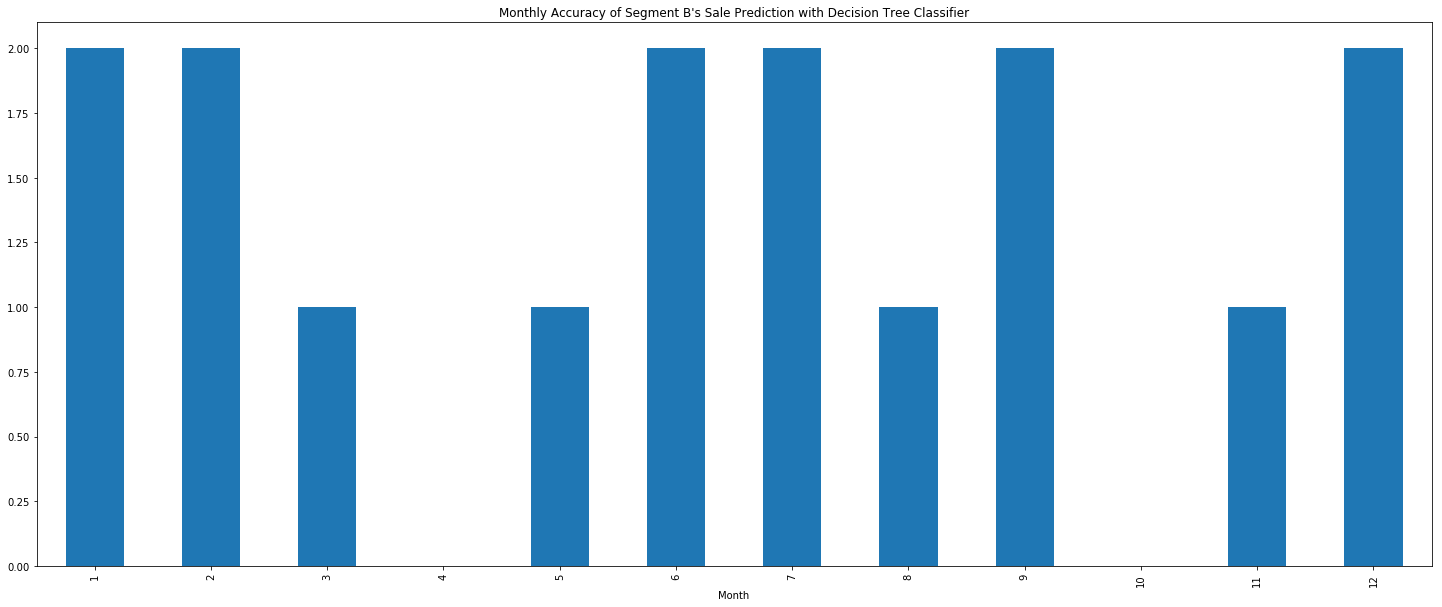

In [184]:
dtB = predictedB_df['DTC'].groupby(predictedB_df.index.month).sum().dropna()
plt = dtB.plot(kind="bar",figsize=(25,10))
plt.set_xlabel("Month")
plt.set_title("Monthly Accuracy of Segment B's Sale Prediction with Decision Tree Classifier")

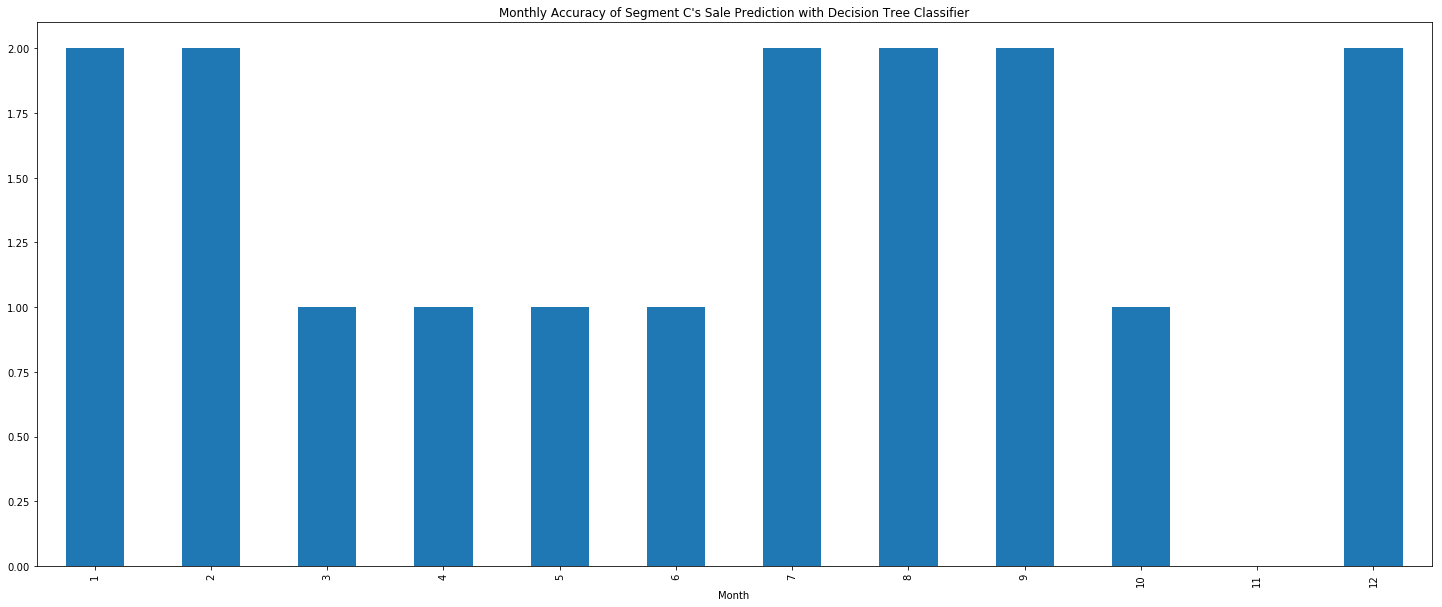

In [185]:
dtC = predictedC_df['DTC'].groupby(predictedC_df.index.month).sum().dropna()
plt = dtC.plot(kind="bar",figsize=(25,10))
plt.set_xlabel("Month")
plt.set_title("Monthly Accuracy of Segment C's Sale Prediction with Decision Tree Classifier")

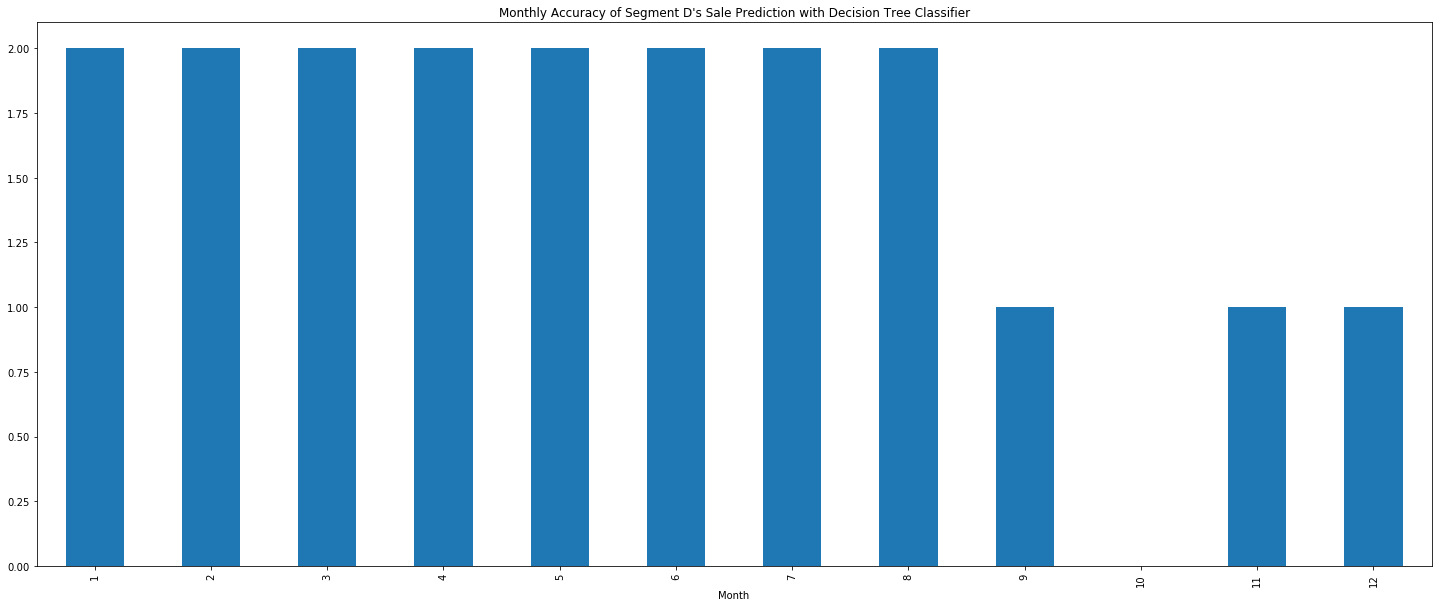

In [186]:
dtD = predictedD_df['DTC'].groupby(predictedD_df.index.month).sum().dropna()
plt = dtD.plot(kind="bar",figsize=(25,10))
plt.set_xlabel("Month")
plt.set_title("Monthly Accuracy of Segment D's Sale Prediction with Decision Tree Classifier")

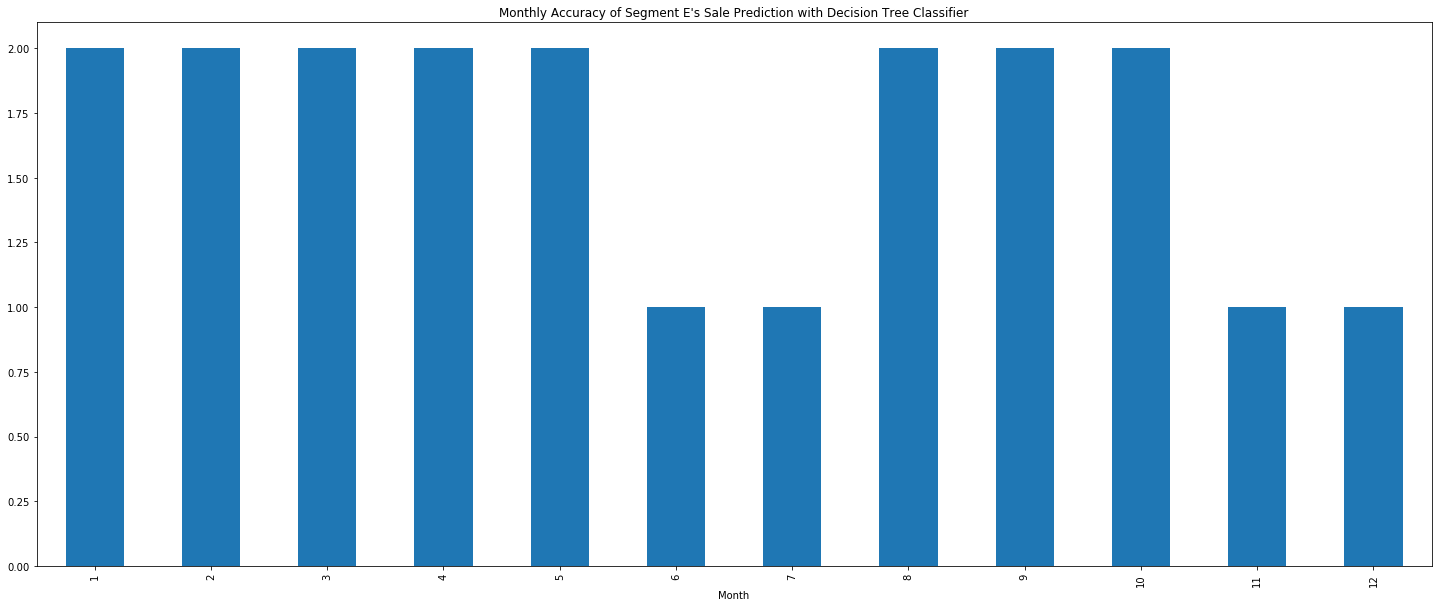

In [187]:
dtE = predictedE_df['DTC'].groupby(predictedE_df.index.month).sum().dropna()
plt = dtE.plot(kind="bar",figsize=(25,10))
plt.set_xlabel("Month")
plt.set_title("Monthly Accuracy of Segment E's Sale Prediction with Decision Tree Classifier")

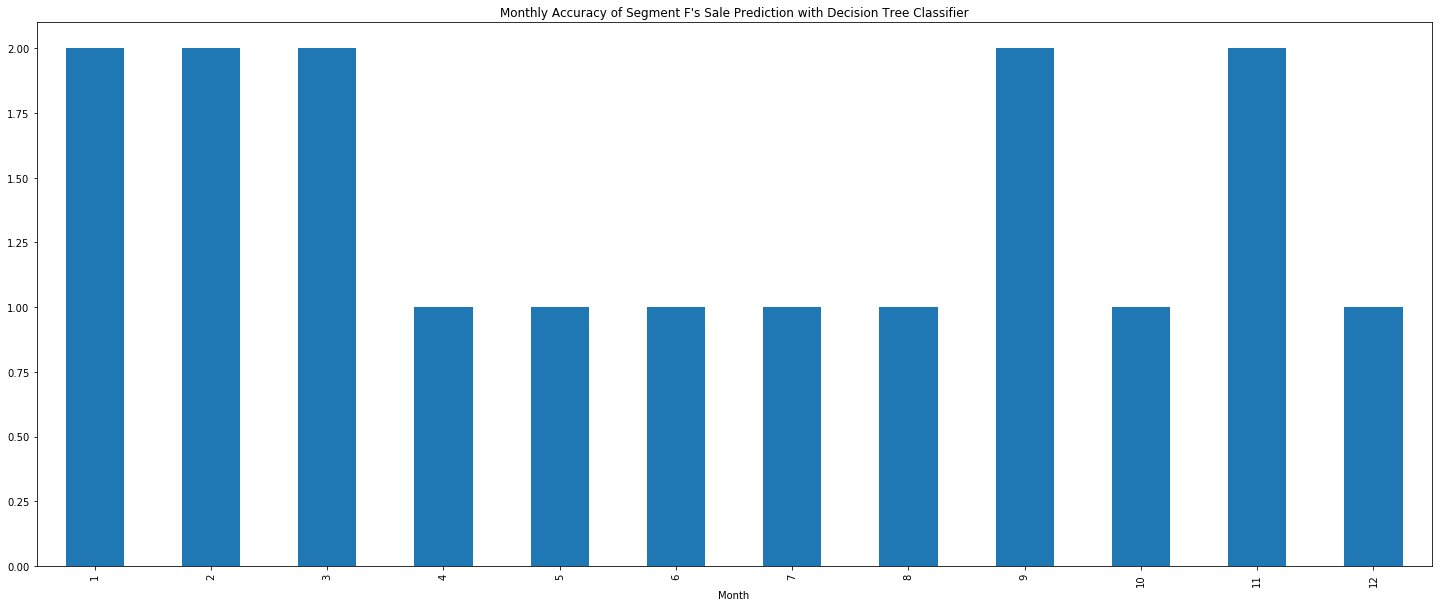

In [188]:
dtF = predictedF_df['DTC'].groupby(predictedF_df.index.month).sum().dropna()
plt = dtF.plot(kind="bar",figsize=(25,10))
plt.set_xlabel("Month")
plt.set_title("Monthly Accuracy of Segment F's Sale Prediction with Decision Tree Classifier")

### Monthly Accuracy of All Segment's Sale Prediction with Decision Tree Classifier

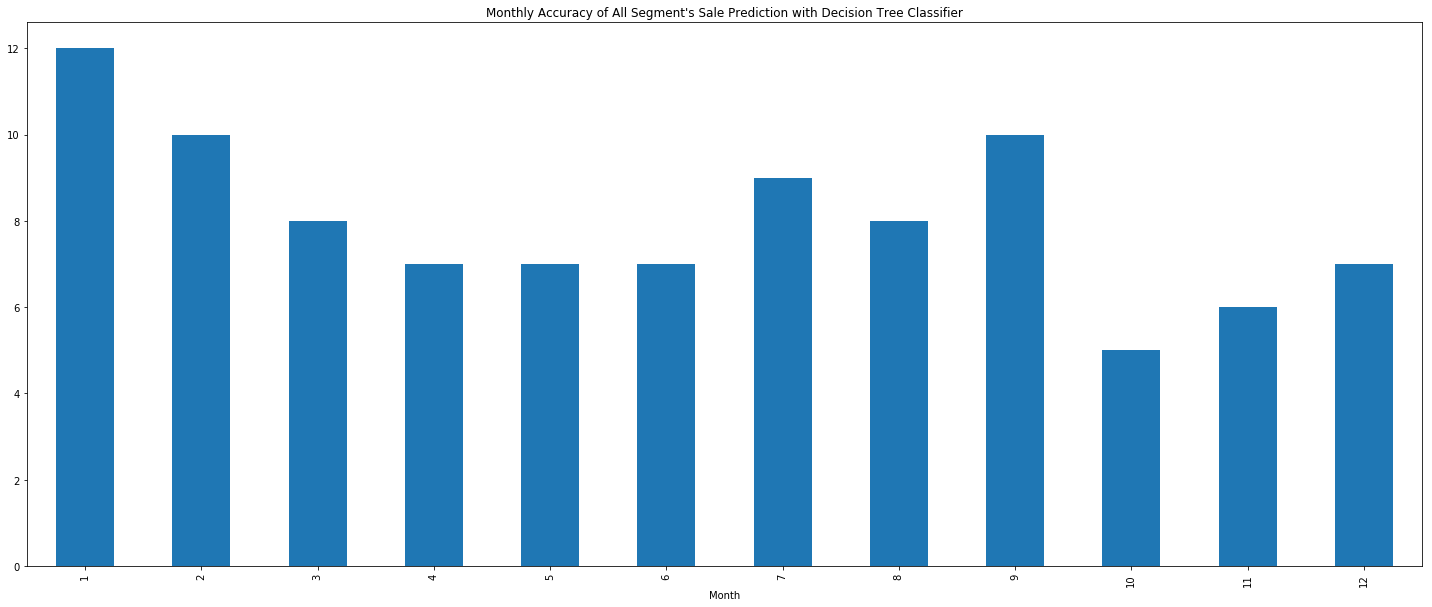

In [189]:
totalRFC['DTC'] = predictedA_df['DTC']+predictedB_df['DTC']+predictedC_df['DTC']+predictedD_df['DTC']+predictedE_df['DTC']+predictedF_df['DTC']

dtTotal = totalRFC['DTC'].groupby(totalRFC.index.month).sum().dropna()
plt = dtTotal.plot(kind="bar",figsize=(25,10))
plt.set_xlabel("Month")
plt.set_title("Monthly Accuracy of All Segment's Sale Prediction with Decision Tree Classifier")

## Data trained on Neural Network with keras

In [193]:
from keras.models import Sequential # intitialize the ANN
from keras.layers import Dense    # create layers

model = Sequential()

model.add(Dense(units = 9, kernel_initializer = 'uniform', activation = 'relu', input_dim = 67))
model.add(Dense(units = 9, kernel_initializer = 'uniform', activation = 'relu'))
model.add(Dense(units = 5, kernel_initializer = 'uniform', activation = 'relu'))
model.add(Dense(units = 1, kernel_initializer = 'uniform', activation = 'sigmoid'))

model.compile(optimizer = 'rmsprop', loss = 'binary_crossentropy', metrics = ['accuracy'])

model.fit(X_train, y_A_train,validation_split=0.20, batch_size = 32, epochs = 4000,verbose=0)

y_pred_A = model.predict(X_test)
y_pred_A = np.round(y_pred_A).astype(int)

y_pred_A = y_pred_A.ravel()

In [194]:
print "Neural Network Trained for A"
print("Values of A:             " + str(y_A_test.values))
print("Predicted values of A:   " + str(y_pred_A))
print("Error : " + str(np.mean(y_A_test.values != y_pred_A)))

Neural Network Trained for A
Values of A:             [0 1 0 0 1 0 1 0 1 1 1 0 1 1 0 1 1 0 1 1 1 0 1 0]
Predicted values of A:   [1 1 0 1 1 0 1 1 1 1 0 0 1 1 0 0 0 0 0 1 1 0 1 0]
Error : 0.291666666667


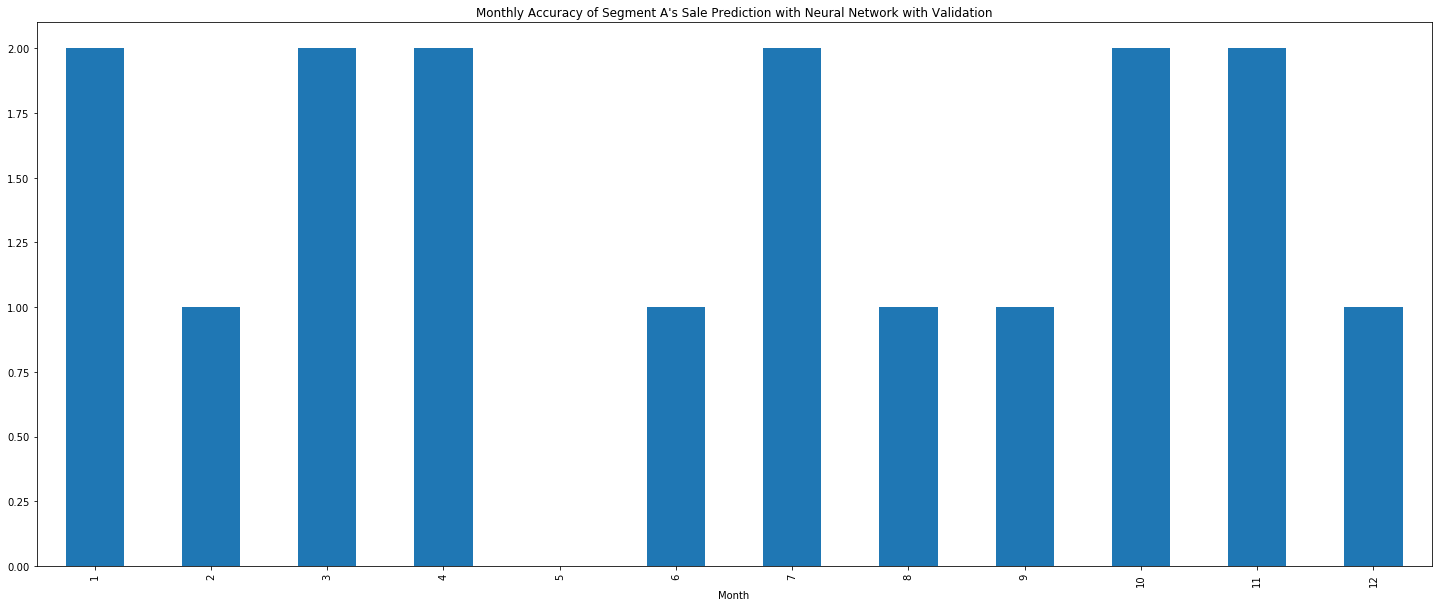

In [195]:
predictedA_df['NNV'] = np.equal(y_pred_A,y_A_test.values)
predictedA_df['NNV'].astype(str)
predictedA_df['NNV'].replace([False,True],[0,1],inplace=True)

nnvA = predictedA_df['NNV'].groupby(predictedA_df.index.month).sum().dropna()
plt = nnvA.plot(kind="bar",figsize=(25,10))
plt.set_xlabel("Month")
plt.set_title("Monthly Accuracy of Segment A's Sale Prediction with Neural Network with Validation")

In [199]:
model = Sequential()

model.add(Dense(units = 9, kernel_initializer = 'uniform', activation = 'relu', input_dim = 67))
model.add(Dense(units = 9, kernel_initializer = 'uniform', activation = 'relu'))
model.add(Dense(units = 5, kernel_initializer = 'uniform', activation = 'relu'))
model.add(Dense(units = 1, kernel_initializer = 'uniform', activation = 'sigmoid'))

model.compile(optimizer = 'rmsprop', loss = 'binary_crossentropy', metrics = ['accuracy'])


model.fit(X_train,y_B_train, batch_size=32,validation_split=0.20, epochs = 4000,verbose=0)

y_pred_B = model.predict(X_test)
y_pred_B = np.round(y_pred_B).astype(int)

y_pred_B = y_pred_B.ravel()

In [200]:
print "Neural Network Trained for B"
print("Values of B:             " + str(y_B_test.values))
print("Predicted values of B:   " + str(y_pred_B))
print("Error : " + str(np.mean(y_B_test.values != y_pred_B)))

Neural Network Trained for B
Values of B:             [1 1 0 1 0 0 1 0 1 1 1 0 1 1 1 0 0 0 0 0 1 1 1 0]
Predicted values of B:   [1 1 0 0 0 0 1 0 1 1 0 0 1 1 1 1 0 0 0 1 1 1 1 0]
Error : 0.166666666667


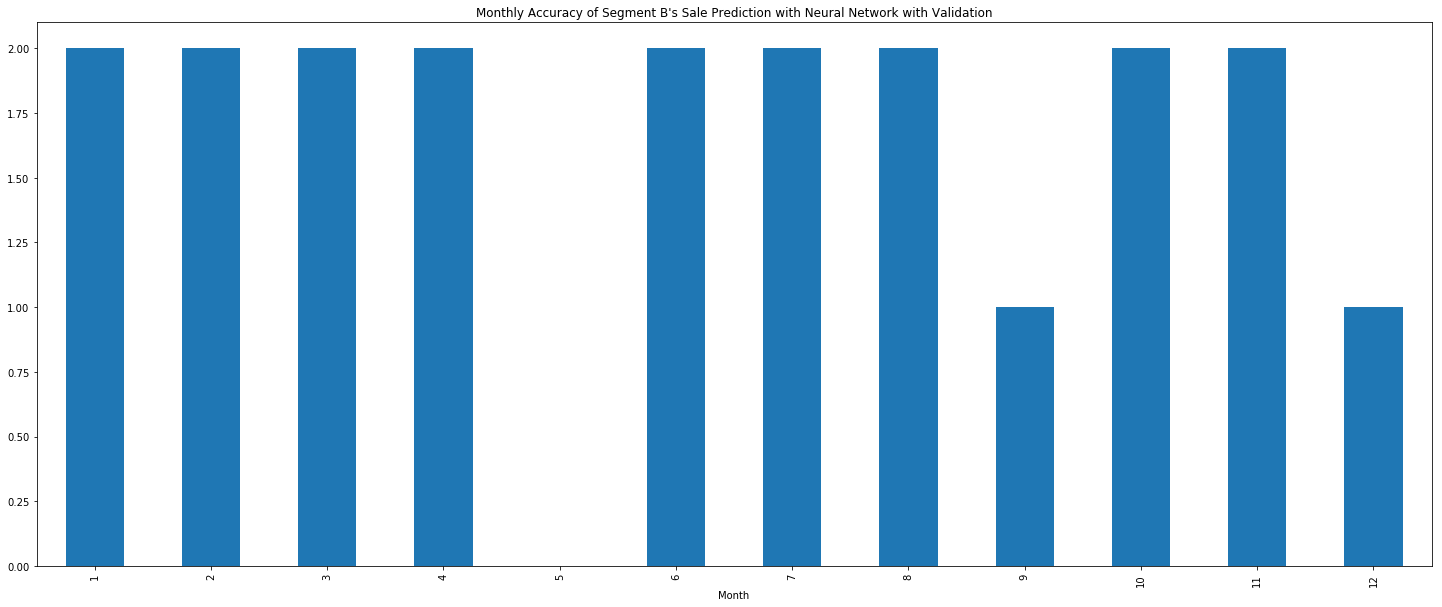

In [201]:
predictedB_df['NNV'] = np.equal(y_pred_B,y_B_test.values)
predictedB_df['NNV'].astype(str)
predictedB_df['NNV'].replace([False,True],[0,1],inplace=True)

nnvB = predictedB_df['NNV'].groupby(predictedA_df.index.month).sum().dropna()
plt = nnvB.plot(kind="bar",figsize=(25,10))
plt.set_xlabel("Month")
plt.set_title("Monthly Accuracy of Segment B's Sale Prediction with Neural Network with Validation")

In [208]:
model = Sequential()

model.add(Dense(units = 9, kernel_initializer = 'uniform', activation = 'relu', input_dim = 67))
model.add(Dense(units = 9, kernel_initializer = 'uniform', activation = 'relu'))
model.add(Dense(units = 5, kernel_initializer = 'uniform', activation = 'relu'))
model.add(Dense(units = 1, kernel_initializer = 'uniform', activation = 'sigmoid'))

model.compile(optimizer = 'rmsprop', loss = 'binary_crossentropy', metrics = ['accuracy'])


model.fit(X_train,y_C_train,validation_split=0.20, batch_size=32, epochs = 4000,verbose=0)

y_pred_C = model.predict(X_test)
y_pred_C = np.round(y_pred_C).astype(int)

y_pred_C = y_pred_C.ravel()

In [209]:
print "Neural Network Trained for C"
print("Values of C:             " + str(y_C_test.values))
print("Predicted values of C:   " + str(y_pred_C))
print("Error : " + str(np.mean(y_C_test.values != y_pred_C)))

Neural Network Trained for C
Values of C:             [1 1 1 0 0 0 1 0 1 1 1 0 1 1 0 1 0 0 0 0 1 1 1 0]
Predicted values of C:   [1 1 1 1 1 0 1 0 1 0 0 0 1 1 0 1 0 0 1 1 1 0 1 0]
Error : 0.291666666667


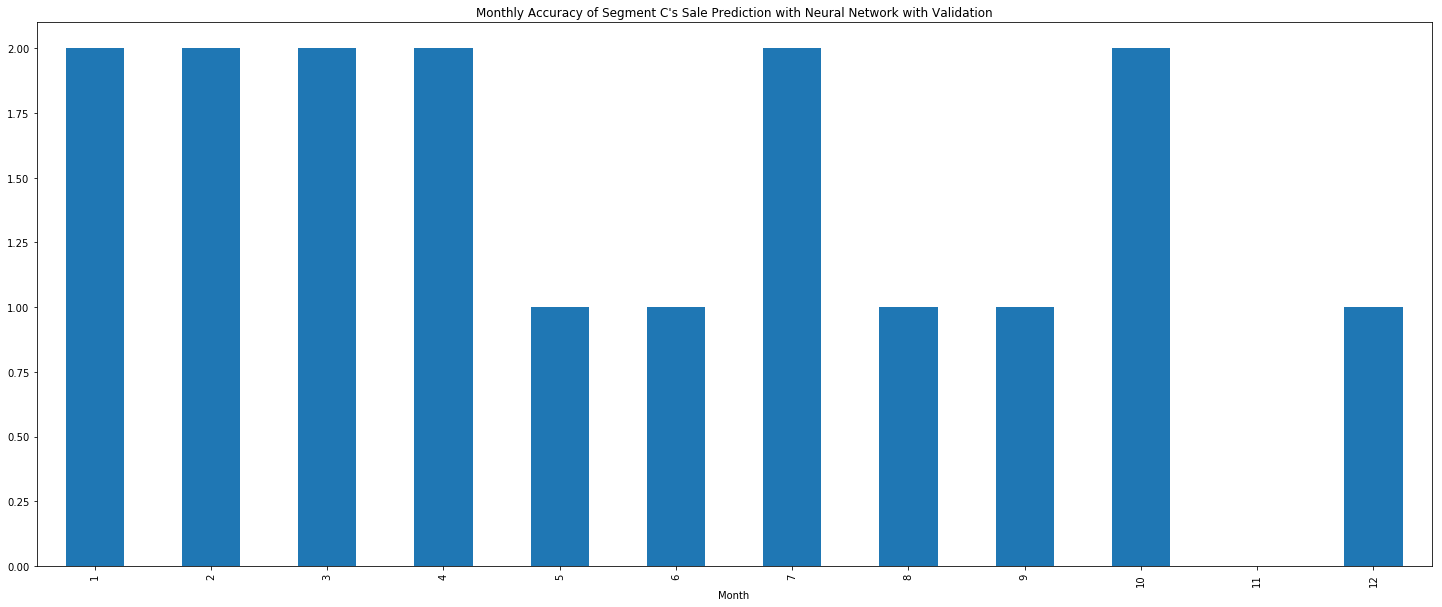

In [210]:
predictedC_df['NNV'] = np.equal(y_pred_C,y_C_test.values)
predictedC_df['NNV'].astype(str)
predictedC_df['NNV'].replace([False,True],[0,1],inplace=True)

nnvC = predictedC_df['NNV'].groupby(predictedC_df.index.month).sum().dropna()
plt = nnvC.plot(kind="bar",figsize=(25,10))
plt.set_xlabel("Month")
plt.set_title("Monthly Accuracy of Segment C's Sale Prediction with Neural Network with Validation")

In [214]:
model = Sequential()

model.add(Dense(units = 9, kernel_initializer = 'uniform', activation = 'relu', input_dim = 67))
model.add(Dense(units = 9, kernel_initializer = 'uniform', activation = 'relu'))
model.add(Dense(units = 5, kernel_initializer = 'uniform', activation = 'relu'))
model.add(Dense(units = 1, kernel_initializer = 'uniform', activation = 'sigmoid'))

model.compile(optimizer = 'rmsprop', loss = 'binary_crossentropy', metrics = ['accuracy'])


model.fit(X_train,y_D_train, batch_size=32,validation_split=0.20, epochs = 4000,verbose=0)

y_pred_D = model.predict(X_test)
y_pred_D = np.round(y_pred_D).astype(int)

y_pred_D = y_pred_D.ravel()

In [215]:
print "Neural Network Trained for D"
print("Values of D:             " + str(y_D_test.values))
print("Predicted values of D:   " + str(y_pred_D))
print("Error : " + str(np.mean(y_D_test.values != y_pred_D)))

Neural Network Trained for D
Values of D:             [1 1 0 1 0 0 1 0 1 1 0 0 1 1 0 1 0 0 0 1 1 0 1 0]
Predicted values of D:   [0 1 0 1 0 0 1 0 1 1 0 0 1 1 0 0 0 1 0 1 1 0 1 1]
Error : 0.166666666667


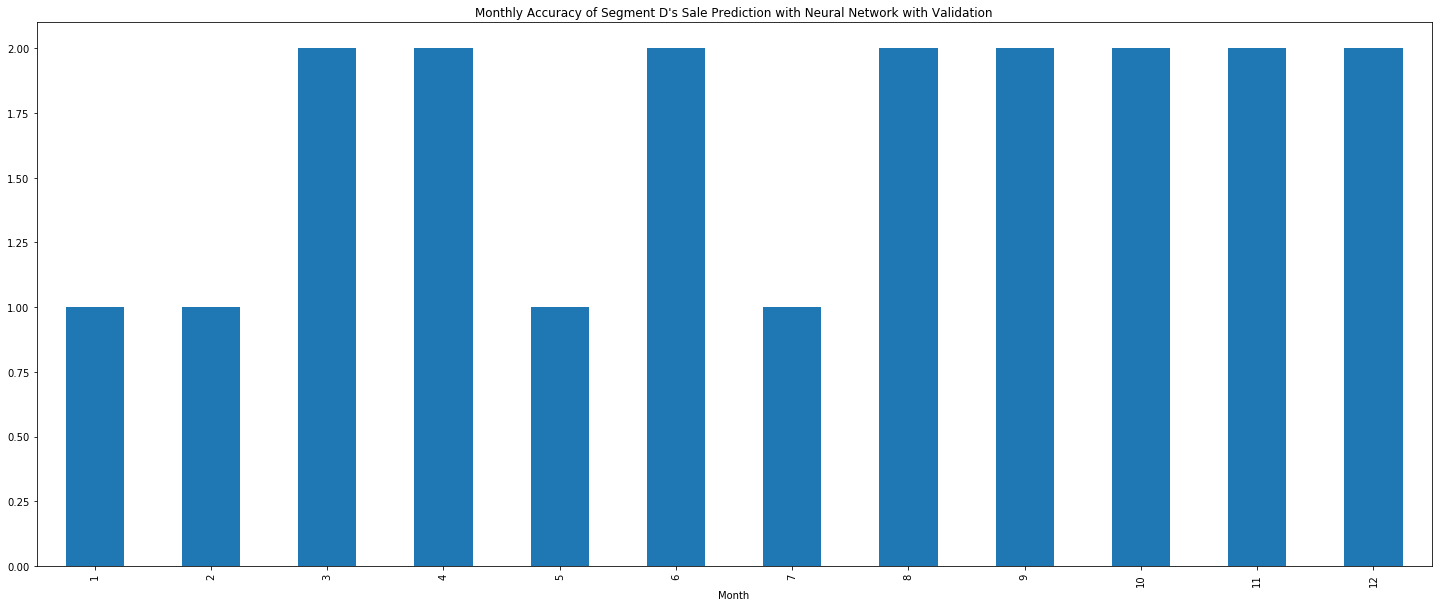

In [216]:
predictedD_df['NNV'] = np.equal(y_pred_D,y_D_test.values)
predictedD_df['NNV'].astype(str)
predictedD_df['NNV'].replace([False,True],[0,1],inplace=True)

nnvD = predictedD_df['NNV'].groupby(predictedD_df.index.month).sum().dropna()
plt = nnvD.plot(kind="bar",figsize=(25,10))
plt.set_xlabel("Month")
plt.set_title("Monthly Accuracy of Segment D's Sale Prediction with Neural Network with Validation")

In [217]:
model = Sequential()

model.add(Dense(units = 9, kernel_initializer = 'uniform', activation = 'relu', input_dim = 67))
model.add(Dense(units = 9, kernel_initializer = 'uniform', activation = 'relu'))
model.add(Dense(units = 5, kernel_initializer = 'uniform', activation = 'relu'))
model.add(Dense(units = 1, kernel_initializer = 'uniform', activation = 'sigmoid'))

model.compile(optimizer = 'rmsprop', loss = 'binary_crossentropy', metrics = ['accuracy'])


model.fit(X_train,y_E_train,validation_split=0.20, batch_size=32, epochs = 4000,verbose=0)

y_pred_E = model.predict(X_test)
y_pred_E = np.round(y_pred_E).astype(int)

y_pred_E = y_pred_E.ravel()

In [218]:
print "Neural Network Trained for E"
print("Values of E:             " + str(y_E_test.values))
print("Predicted values of E:   " + str(y_pred_E))
print("Error : " + str(np.mean(y_E_test.values != y_pred_E)))

Neural Network Trained for E
Values of E:             [1 1 0 1 0 0 1 0 1 1 0 0 1 1 1 1 0 0 0 0 1 0 1 0]
Predicted values of E:   [0 1 0 0 0 0 1 0 1 1 0 0 0 1 0 1 0 1 1 1 1 0 1 0]
Error : 0.291666666667


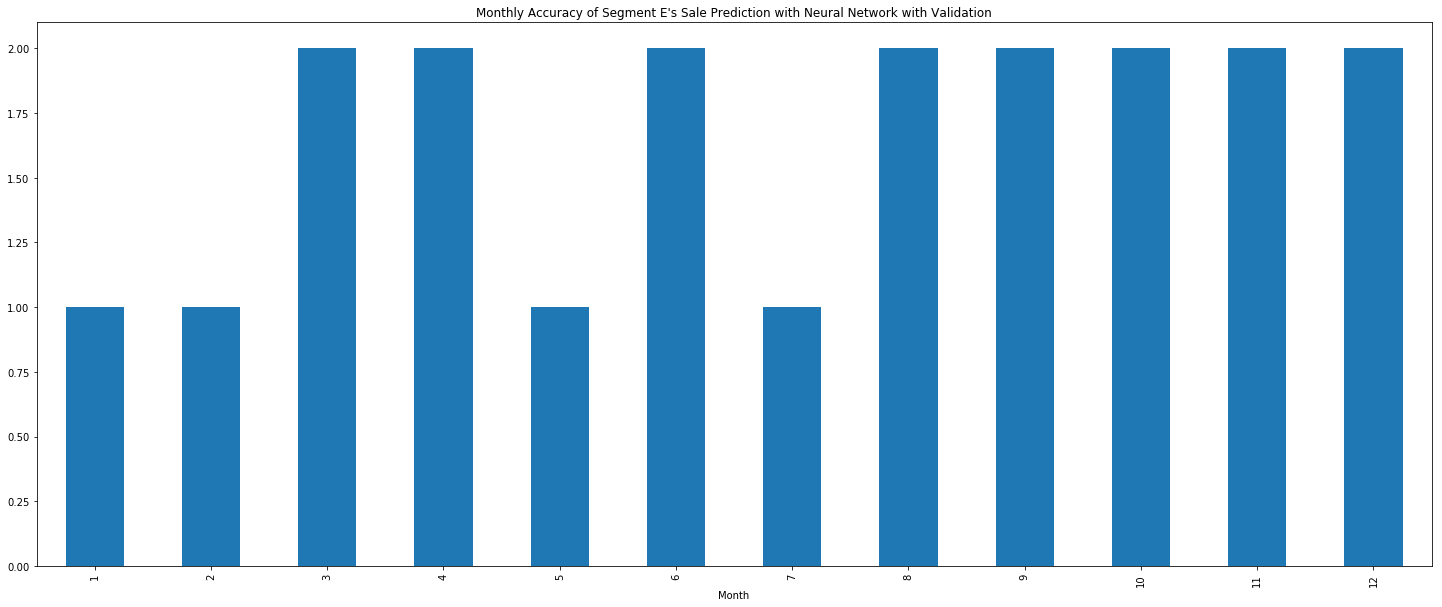

In [219]:
predictedE_df['NNV'] = np.equal(y_pred_E,y_E_test.values)
predictedE_df['NNV'].astype(str)
predictedE_df['NNV'].replace([False,True],[0,1],inplace=True)

nnvE = predictedD_df['NNV'].groupby(predictedE_df.index.month).sum().dropna()
plt = nnvE.plot(kind="bar",figsize=(25,10))
plt.set_xlabel("Month")
plt.set_title("Monthly Accuracy of Segment E's Sale Prediction with Neural Network with Validation")

In [223]:
model = Sequential()

model.add(Dense(units = 9, kernel_initializer = 'uniform', activation = 'relu', input_dim = 67))
model.add(Dense(units = 9, kernel_initializer = 'uniform', activation = 'relu'))
model.add(Dense(units = 5, kernel_initializer = 'uniform', activation = 'relu'))
model.add(Dense(units = 1, kernel_initializer = 'uniform', activation = 'sigmoid'))

model.compile(optimizer = 'rmsprop', loss = 'binary_crossentropy', metrics = ['accuracy'])


model.fit(X_train,y_F_train,validation_split=0.20, batch_size=32, epochs = 4000,verbose=0)

y_pred_F = model.predict(X_test)
y_pred_F = np.round(y_pred_F).astype(int)

y_pred_F = y_pred_F.ravel()

In [224]:
print "Neural Network Trained for F"
print("Values of F:             " + str(y_F_test.values))
print("Predicted values of F:   " + str(y_pred_F))
print("Error : " + str(np.mean(y_F_test.values != y_pred_F)))

Neural Network Trained for F
Values of F:             [1 1 0 1 0 0 1 0 0 1 0 0 1 1 0 0 0 0 1 0 1 1 1 0]
Predicted values of F:   [1 1 0 0 0 0 1 0 1 0 0 0 0 1 0 1 0 0 0 0 1 0 1 0]
Error : 0.291666666667


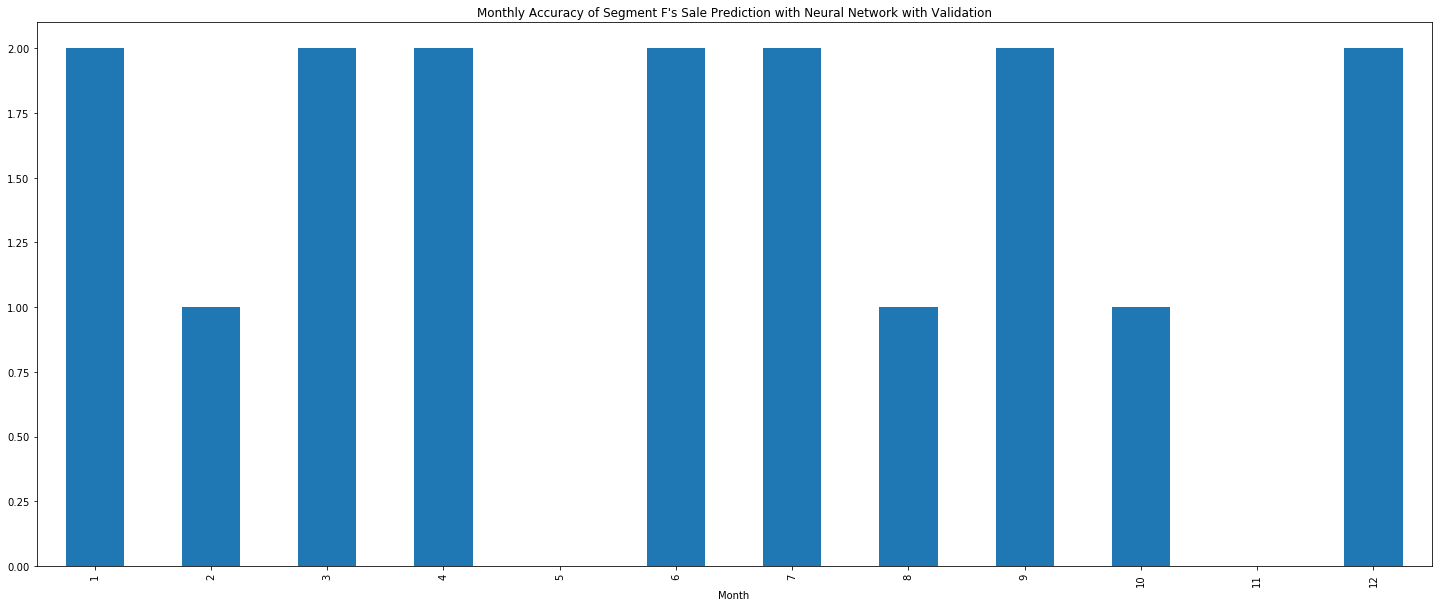

In [225]:
predictedF_df['NNV'] = np.equal(y_pred_F,y_F_test.values)
predictedF_df['NNV'].astype(str)
predictedF_df['NNV'].replace([False,True],[0,1],inplace=True)

nnvF = predictedF_df['NNV'].groupby(predictedF_df.index.month).sum().dropna()
plt = nnvF.plot(kind="bar",figsize=(25,10))
plt.set_xlabel("Month")
plt.set_title("Monthly Accuracy of Segment F's Sale Prediction with Neural Network with Validation")

### Monthly Accuracy of All Segment's Sale Prediction with Neural Network with Validation

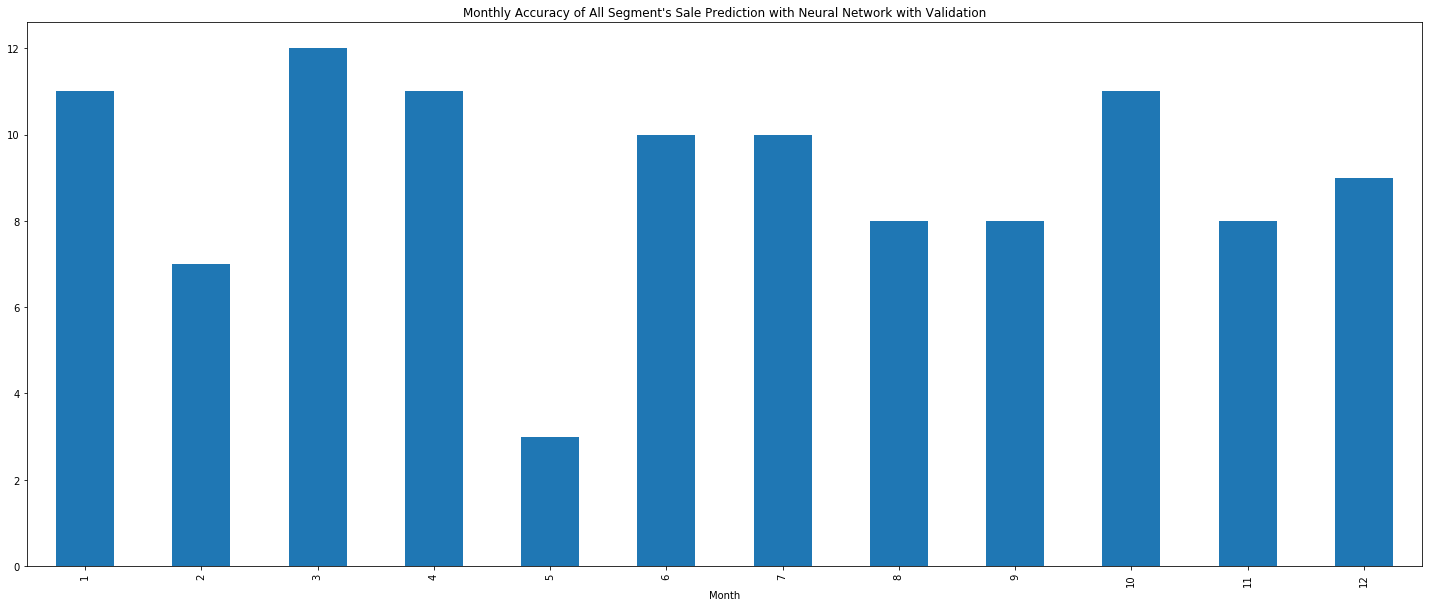

In [226]:
totalRFC['NNV'] = predictedA_df['NNV']+predictedB_df['NNV']+predictedC_df['NNV']+predictedD_df['NNV']+predictedE_df['NNV']+predictedF_df['NNV']

dtTotal = totalRFC['NNV'].groupby(totalRFC.index.month).sum().dropna()
plt = dtTotal.plot(kind="bar",figsize=(25,10))
plt.set_xlabel("Month")
plt.set_title("Monthly Accuracy of All Segment's Sale Prediction with Neural Network with Validation")

## Trained without validation 

In [227]:
model = Sequential()

model.add(Dense(units = 9, kernel_initializer = 'uniform', activation = 'relu', input_dim = 67))
model.add(Dense(units = 9, kernel_initializer = 'uniform', activation = 'relu'))
model.add(Dense(units = 5, kernel_initializer = 'uniform', activation = 'relu'))
model.add(Dense(units = 1, kernel_initializer = 'uniform', activation = 'sigmoid'))

model.compile(optimizer = 'rmsprop', loss = 'binary_crossentropy', metrics = ['accuracy'])

model.fit(X_train, y_A_train, batch_size = 32, epochs = 4000,verbose=0)

y_pred_A = model.predict(X_test)
y_pred_A = np.round(y_pred_A).astype(int)

y_pred_A = y_pred_A.ravel()

print "Neural Network Trained for A"
print("Values of A:             " + str(y_A_test.values))
print("Predicted values of A:   " + str(y_pred_A))
print("Error : " + str(np.mean(y_A_test.values != y_pred_A)))

Neural Network Trained for A
Values of A:             [0 1 0 0 1 0 1 0 1 1 1 0 1 1 0 1 1 0 1 1 1 0 1 0]
Predicted values of A:   [0 1 0 1 1 0 1 1 1 1 0 0 0 0 0 0 0 0 0 1 1 0 1 0]
Error : 0.333333333333


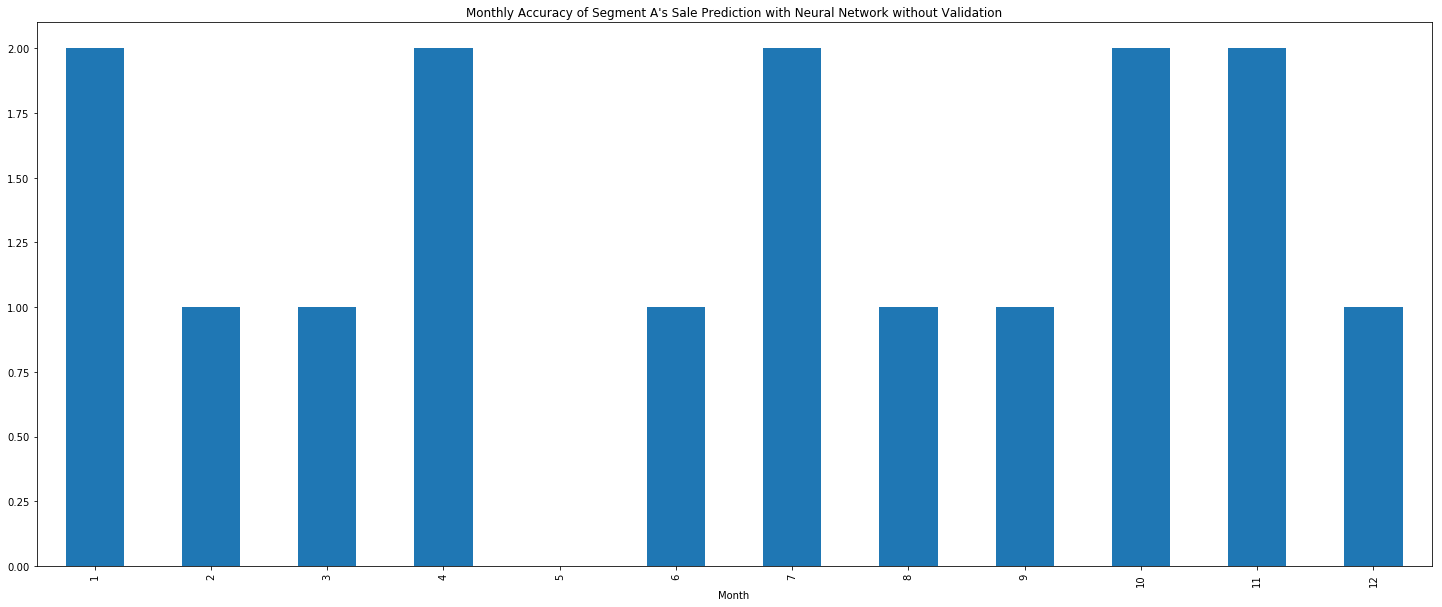

In [228]:
predictedA_df['NN'] = np.equal(y_pred_A,y_A_test.values)
predictedA_df['NN'].astype(str)
predictedA_df['NN'].replace([False,True],[0,1],inplace=True)

nnA = predictedA_df['NN'].groupby(predictedA_df.index.month).sum().dropna()
plt = nnA.plot(kind="bar",figsize=(25,10))
plt.set_xlabel("Month")
plt.set_title("Monthly Accuracy of Segment A's Sale Prediction with Neural Network without Validation")

In [229]:
model = Sequential()

model.add(Dense(units = 9, kernel_initializer = 'uniform', activation = 'relu', input_dim = 67))
model.add(Dense(units = 9, kernel_initializer = 'uniform', activation = 'relu'))
model.add(Dense(units = 5, kernel_initializer = 'uniform', activation = 'relu'))
model.add(Dense(units = 1, kernel_initializer = 'uniform', activation = 'sigmoid'))

model.compile(optimizer = 'rmsprop', loss = 'binary_crossentropy', metrics = ['accuracy'])


model.fit(X_train,y_B_train, batch_size=32, epochs = 4000,verbose=0)

y_pred_B = model.predict(X_test)
y_pred_B = np.round(y_pred_B).astype(int)

y_pred_B = y_pred_B.ravel()

print "Neural Network Trained for B"
print("Values of B:             " + str(y_B_test.values))
print("Predicted values of B:   " + str(y_pred_B))
print("Error : " + str(np.mean(y_B_test.values != y_pred_B)))

Neural Network Trained for B
Values of B:             [1 1 0 1 0 0 1 0 1 1 1 0 1 1 1 0 0 0 0 0 1 1 1 0]
Predicted values of B:   [1 0 0 1 0 0 1 0 1 1 0 0 0 1 0 1 1 0 1 0 1 1 1 1]
Error : 0.333333333333


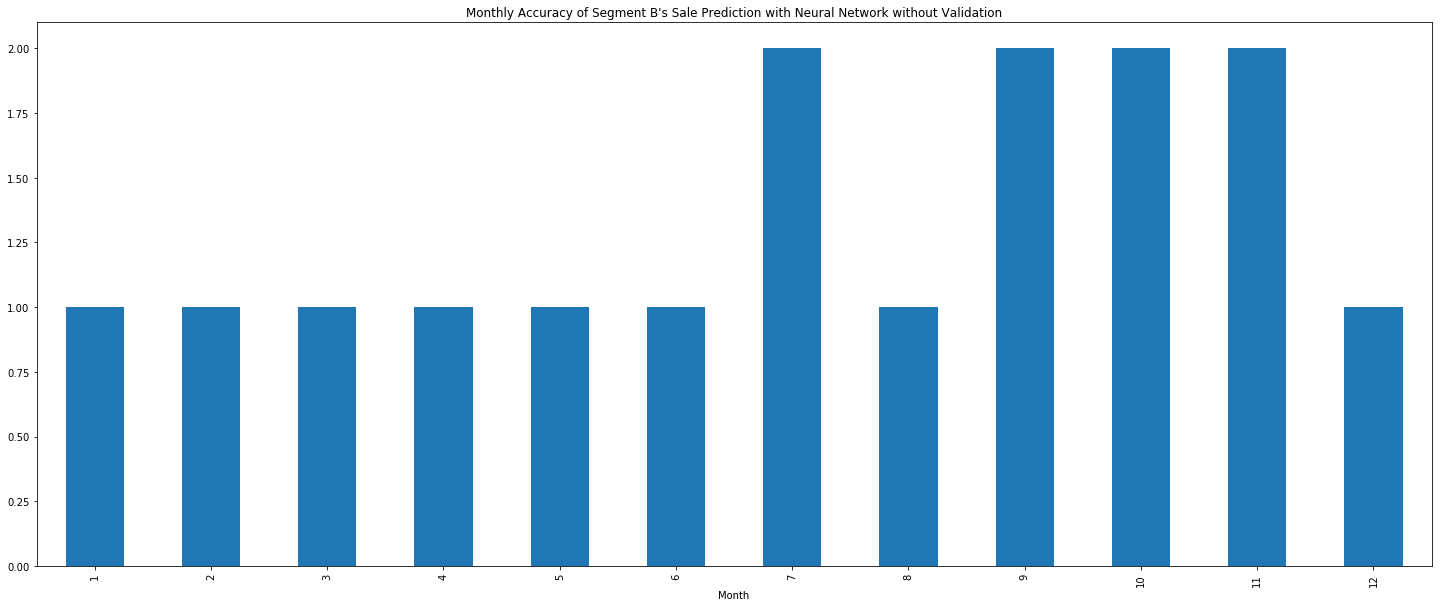

In [230]:
predictedB_df['NN'] = np.equal(y_pred_B,y_B_test.values)
predictedB_df['NN'].astype(str)
predictedB_df['NN'].replace([False,True],[0,1],inplace=True)

nnB = predictedB_df['NN'].groupby(predictedB_df.index.month).sum().dropna()
plt = nnB.plot(kind="bar",figsize=(25,10))
plt.set_xlabel("Month")
plt.set_title("Monthly Accuracy of Segment B's Sale Prediction with Neural Network without Validation")

In [231]:
model = Sequential()

model.add(Dense(units = 9, kernel_initializer = 'uniform', activation = 'relu', input_dim = 67))
model.add(Dense(units = 9, kernel_initializer = 'uniform', activation = 'relu'))
model.add(Dense(units = 5, kernel_initializer = 'uniform', activation = 'relu'))
model.add(Dense(units = 1, kernel_initializer = 'uniform', activation = 'sigmoid'))

model.compile(optimizer = 'rmsprop', loss = 'binary_crossentropy', metrics = ['accuracy'])


model.fit(X_train,y_C_train, batch_size=32, epochs = 4000,verbose=0)

y_pred_C = model.predict(X_test)
y_pred_C = np.round(y_pred_C).astype(int)

y_pred_C = y_pred_C.ravel()

print "Neural Network Trained for C"
print("Values of C:             " + str(y_C_test.values))
print("Predicted values of C:   " + str(y_pred_C))
print("Error : " + str(np.mean(y_C_test.values != y_pred_C)))

Neural Network Trained for C
Values of C:             [1 1 1 0 0 0 1 0 1 1 1 0 1 1 0 1 0 0 0 0 1 1 1 0]
Predicted values of C:   [1 1 1 1 0 0 1 0 1 1 0 0 1 1 0 1 0 0 0 1 1 0 1 0]
Error : 0.166666666667


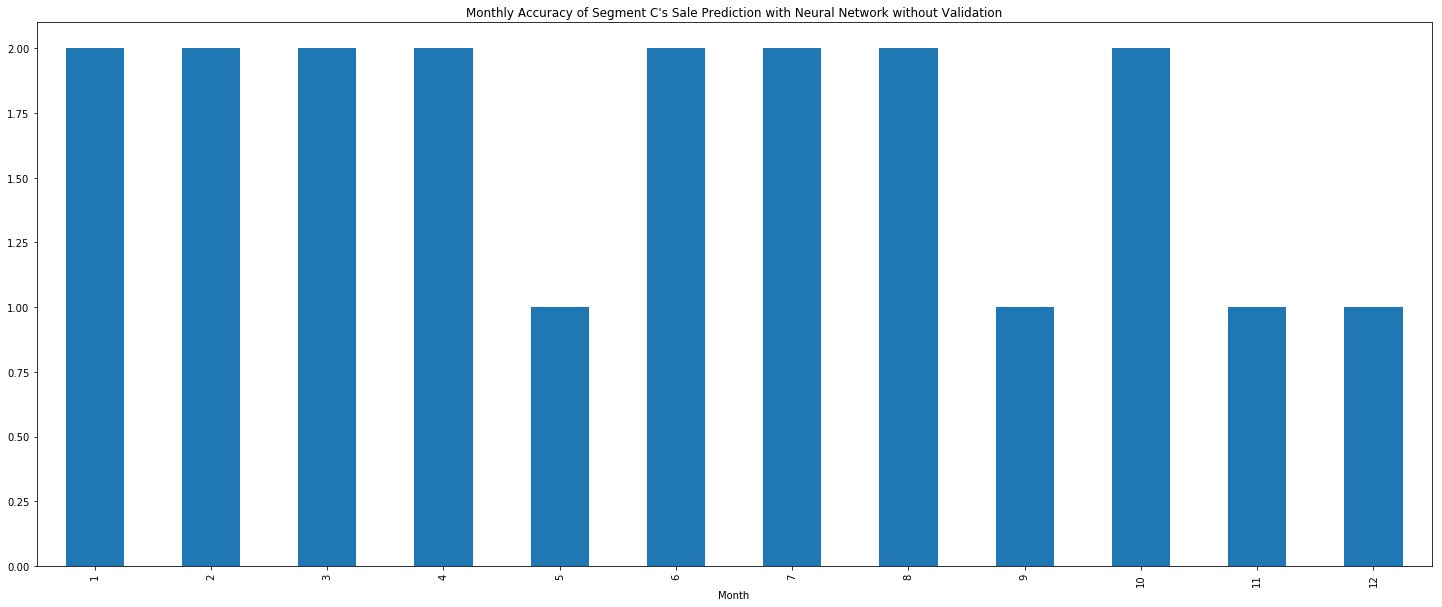

In [233]:
predictedC_df['NN'] = np.equal(y_pred_C,y_C_test.values)
predictedC_df['NN'].astype(str)
predictedC_df['NN'].replace([False,True],[0,1],inplace=True)

nnC = predictedC_df['NN'].groupby(predictedC_df.index.month).sum().dropna()
plt = nnC.plot(kind="bar",figsize=(25,10))
plt.set_xlabel("Month")
plt.set_title("Monthly Accuracy of Segment C's Sale Prediction with Neural Network without Validation")

In [238]:
model = Sequential()

model.add(Dense(units = 9, kernel_initializer = 'uniform', activation = 'relu', input_dim = 67))
model.add(Dense(units = 9, kernel_initializer = 'uniform', activation = 'relu'))
model.add(Dense(units = 5, kernel_initializer = 'uniform', activation = 'relu'))
model.add(Dense(units = 1, kernel_initializer = 'uniform', activation = 'sigmoid'))

model.compile(optimizer = 'rmsprop', loss = 'binary_crossentropy', metrics = ['accuracy'])


model.fit(X_train,y_D_train, batch_size=32,validation_split=0.20, epochs = 4000,verbose=0)

y_pred_D = model.predict(X_test)
y_pred_D = np.round(y_pred_D).astype(int)

y_pred_D = y_pred_D.ravel()

print "Neural Network Trained for D"
print("Values of D:             " + str(y_D_test.values))
print("Predicted values of D:   " + str(y_pred_D))
print("Error : " + str(np.mean(y_D_test.values != y_pred_D)))

Neural Network Trained for D
Values of D:             [1 1 0 1 0 0 1 0 1 1 0 0 1 1 0 1 0 0 0 1 1 0 1 0]
Predicted values of D:   [0 1 0 1 0 0 1 0 1 1 0 1 1 1 0 0 0 1 0 1 0 0 1 0]
Error : 0.208333333333


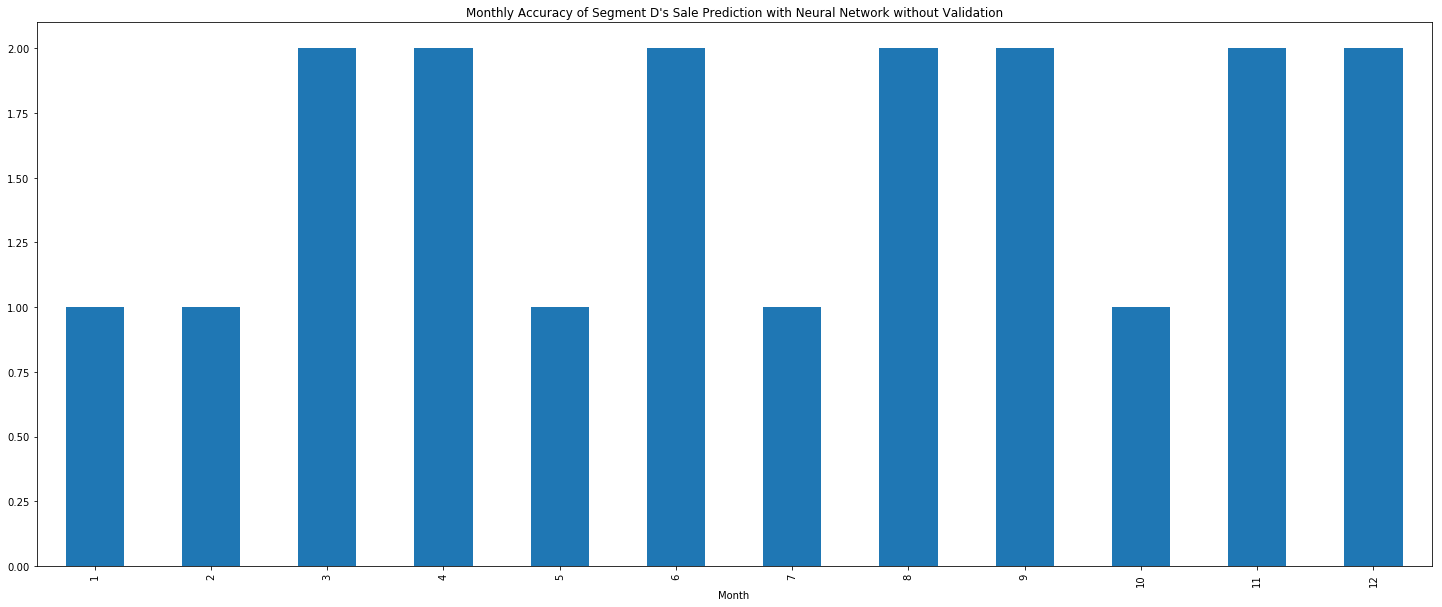

In [239]:
predictedD_df['NN'] = np.equal(y_pred_D,y_D_test.values)
predictedD_df['NN'].astype(str)
predictedD_df['NN'].replace([False,True],[0,1],inplace=True)

nnD = predictedD_df['NN'].groupby(predictedD_df.index.month).sum().dropna()
plt = nnD.plot(kind="bar",figsize=(25,10))
plt.set_xlabel("Month")
plt.set_title("Monthly Accuracy of Segment D's Sale Prediction with Neural Network without Validation")

In [240]:
model = Sequential()

model.add(Dense(units = 9, kernel_initializer = 'uniform', activation = 'relu', input_dim = 67))
model.add(Dense(units = 9, kernel_initializer = 'uniform', activation = 'relu'))
model.add(Dense(units = 5, kernel_initializer = 'uniform', activation = 'relu'))
model.add(Dense(units = 1, kernel_initializer = 'uniform', activation = 'sigmoid'))

model.compile(optimizer = 'rmsprop', loss = 'binary_crossentropy', metrics = ['accuracy'])


model.fit(X_train,y_E_train,validation_split=0.20, batch_size=32, epochs = 4000,verbose=0)

y_pred_E = model.predict(X_test)
y_pred_E = np.round(y_pred_E).astype(int)

y_pred_E = y_pred_E.ravel()

print "Neural Network Trained for E"
print("Values of E:             " + str(y_E_test.values))
print("Predicted values of E:   " + str(y_pred_E))
print("Error : " + str(np.mean(y_E_test.values != y_pred_E)))

Neural Network Trained for E
Values of E:             [1 1 0 1 0 0 1 0 1 1 0 0 1 1 1 1 0 0 0 0 1 0 1 0]
Predicted values of E:   [1 1 0 0 0 0 1 0 1 1 0 0 1 1 0 0 0 0 1 0 0 0 1 0]
Error : 0.208333333333


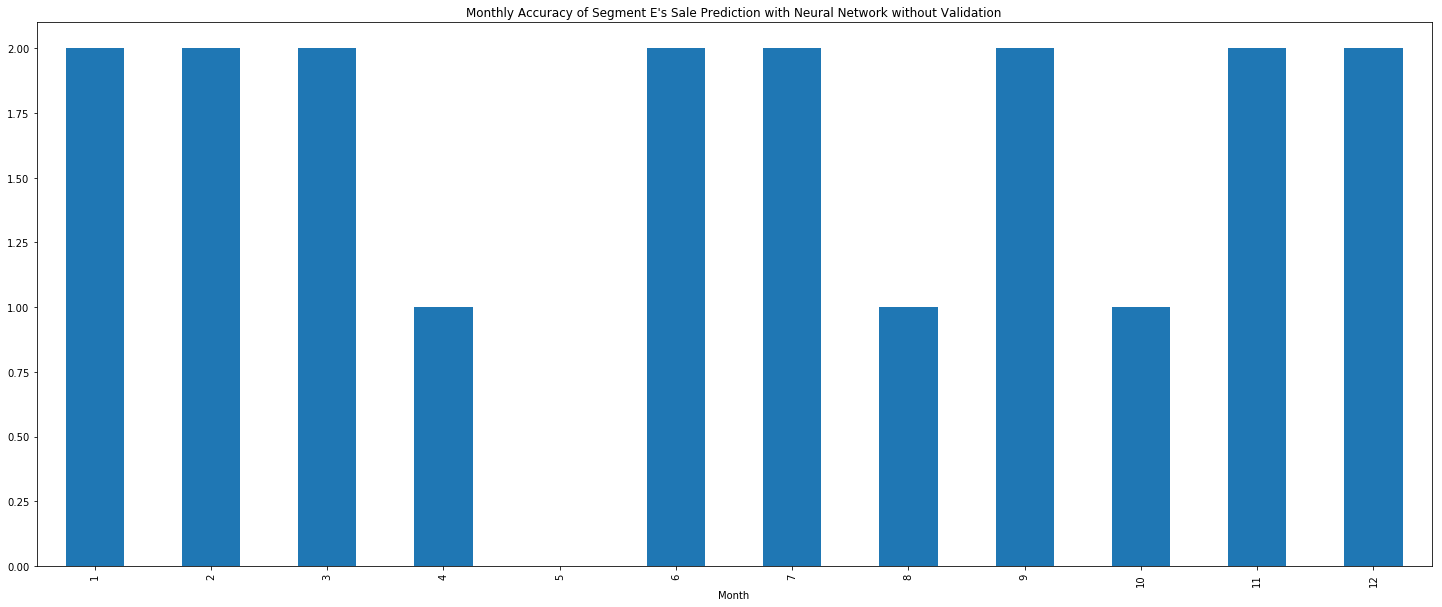

In [241]:
predictedE_df['NN'] = np.equal(y_pred_E,y_E_test.values)
predictedE_df['NN'].astype(str)
predictedE_df['NN'].replace([False,True],[0,1],inplace=True)

nnE = predictedE_df['NN'].groupby(predictedE_df.index.month).sum().dropna()
plt = nnE.plot(kind="bar",figsize=(25,10))
plt.set_xlabel("Month")
plt.set_title("Monthly Accuracy of Segment E's Sale Prediction with Neural Network without Validation")

In [244]:
model = Sequential()

model.add(Dense(units = 9, kernel_initializer = 'uniform', activation = 'relu', input_dim = 67))
model.add(Dense(units = 9, kernel_initializer = 'uniform', activation = 'relu'))
model.add(Dense(units = 5, kernel_initializer = 'uniform', activation = 'relu'))
model.add(Dense(units = 1, kernel_initializer = 'uniform', activation = 'sigmoid'))

model.compile(optimizer = 'rmsprop', loss = 'binary_crossentropy', metrics = ['accuracy'])


model.fit(X_train,y_F_train,validation_split=0.20, batch_size=32, epochs = 4000,verbose=0)

y_pred_F = model.predict(X_test)
y_pred_F = np.round(y_pred_F).astype(int)

y_pred_F = y_pred_F.ravel()

print "Neural Network Trained for F"
print("Values of F:             " + str(y_F_test.values))
print("Predicted values of F:   " + str(y_pred_F))
print("Error : " + str(np.mean(y_F_test.values != y_pred_F)))

Neural Network Trained for F
Values of F:             [1 1 0 1 0 0 1 0 0 1 0 0 1 1 0 0 0 0 1 0 1 1 1 0]
Predicted values of F:   [1 1 0 0 1 0 1 0 1 1 1 0 0 1 0 0 1 1 1 1 1 0 1 0]
Error : 0.375


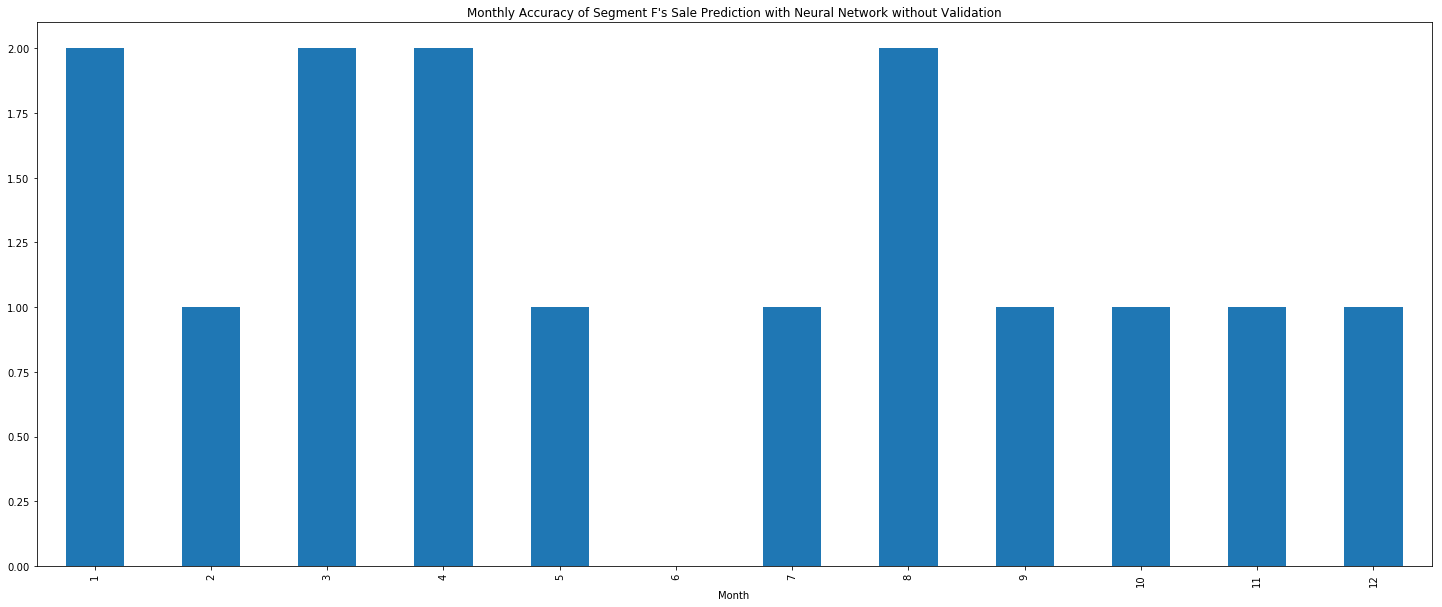

In [245]:
predictedF_df['NN'] = np.equal(y_pred_F,y_F_test.values)
predictedF_df['NN'].astype(str)
predictedF_df['NN'].replace([False,True],[0,1],inplace=True)

nnF = predictedF_df['NN'].groupby(predictedF_df.index.month).sum().dropna()
plt = nnF.plot(kind="bar",figsize=(25,10))
plt.set_xlabel("Month")
plt.set_title("Monthly Accuracy of Segment F's Sale Prediction with Neural Network without Validation")

### Monthly Accuracy of All Segment's Sale Prediction with Neural Network without Validation

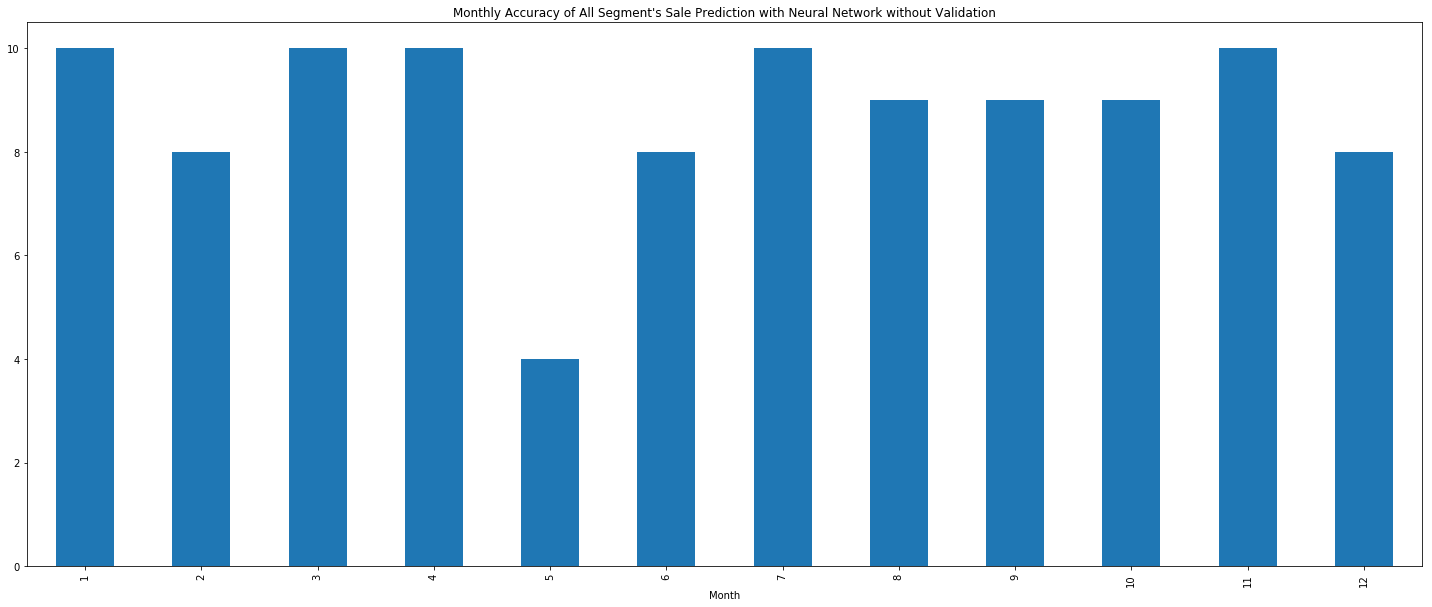

In [246]:
totalRFC['NN'] = predictedA_df['NN']+predictedB_df['NN']+predictedC_df['NN']+predictedD_df['NN']+predictedE_df['NN']+predictedF_df['NN']

nnTotal = totalRFC['NN'].groupby(totalRFC.index.month).sum().dropna()
plt = nnTotal.plot(kind="bar",figsize=(25,10))
plt.set_xlabel("Month")
plt.set_title("Monthly Accuracy of All Segment's Sale Prediction with Neural Network without Validation")

## Total Monthly Accuracy Analysis of Segment Sale Prediction with Classified Data

### Segment A

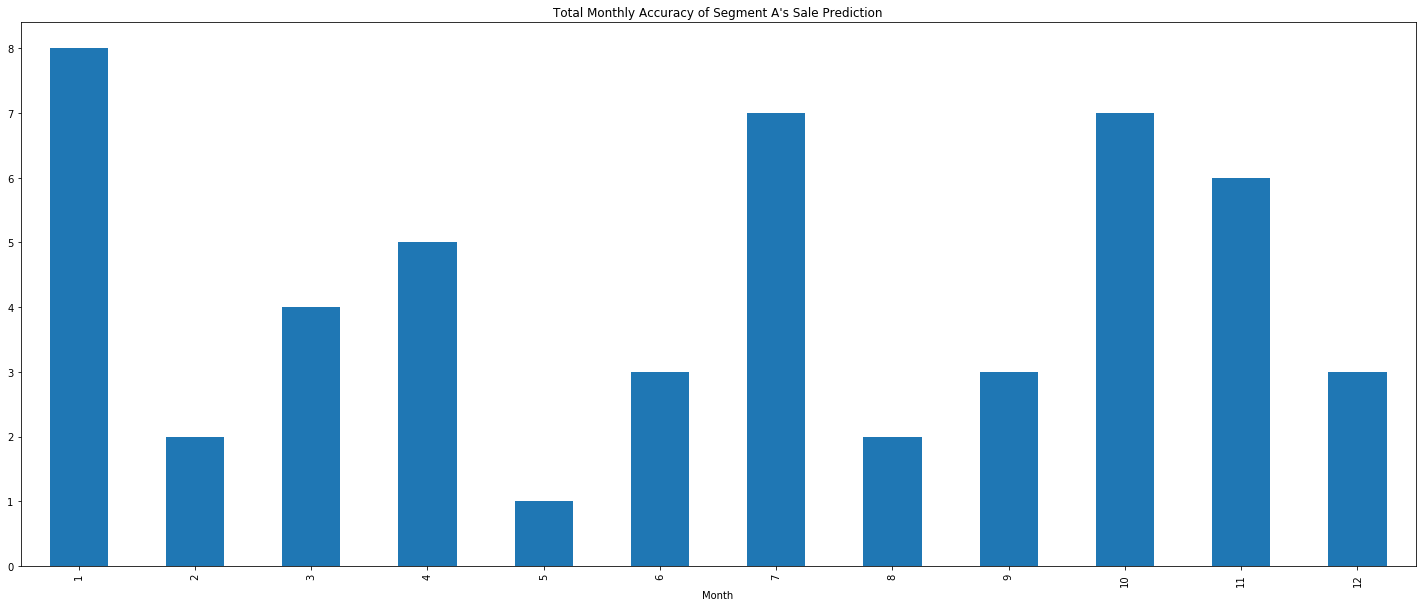

In [251]:
predictedA_df['Total'] = predictedA_df['RFC']+predictedA_df['DTC']+predictedA_df['NNV']+predictedA_df['NN']

totalA = predictedA_df['Total'].groupby(predictedA_df.index.month).sum().dropna()
plt = totalA.plot(kind="bar",figsize=(25,10))
plt.set_xlabel("Month")
plt.set_title("Total Monthly Accuracy of Segment A's Sale Prediction")

### Segment B

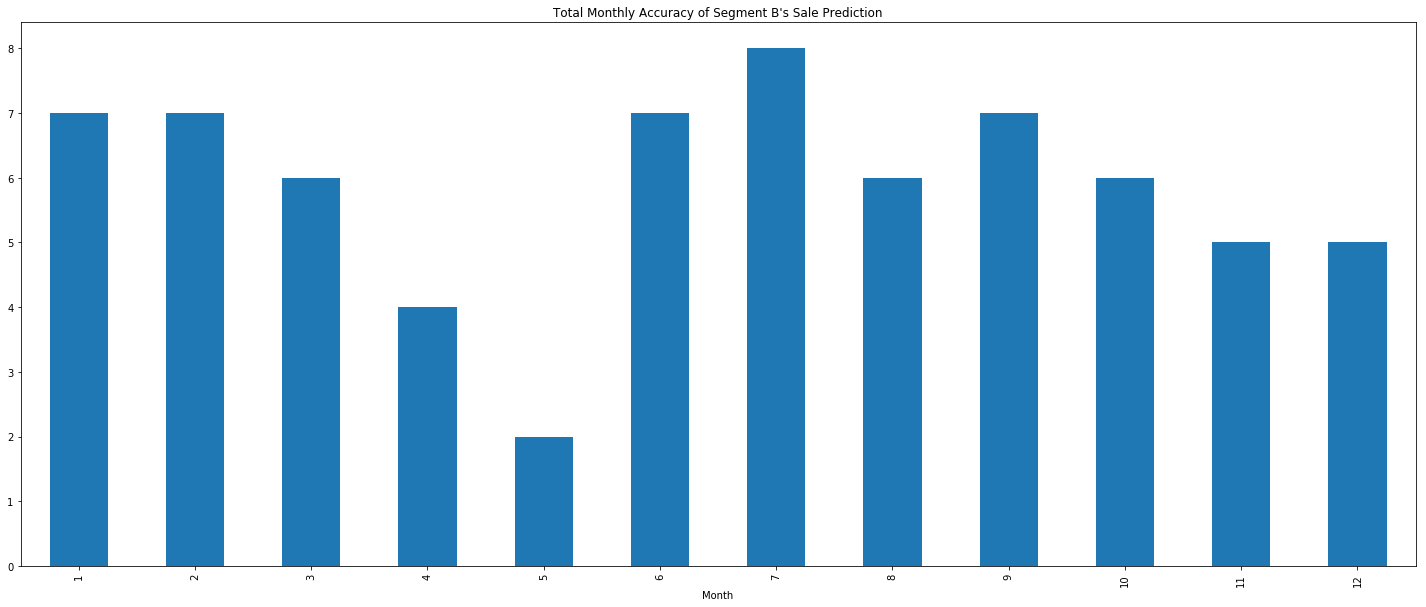

In [253]:
predictedB_df['Total'] = predictedB_df['RFC']+predictedB_df['DTC']+predictedB_df['NNV']+predictedB_df['NN']

totalB = predictedB_df['Total'].groupby(predictedB_df.index.month).sum().dropna()
plt = totalB.plot(kind="bar",figsize=(25,10))
plt.set_xlabel("Month")
plt.set_title("Total Monthly Accuracy of Segment B's Sale Prediction")

### Segment C

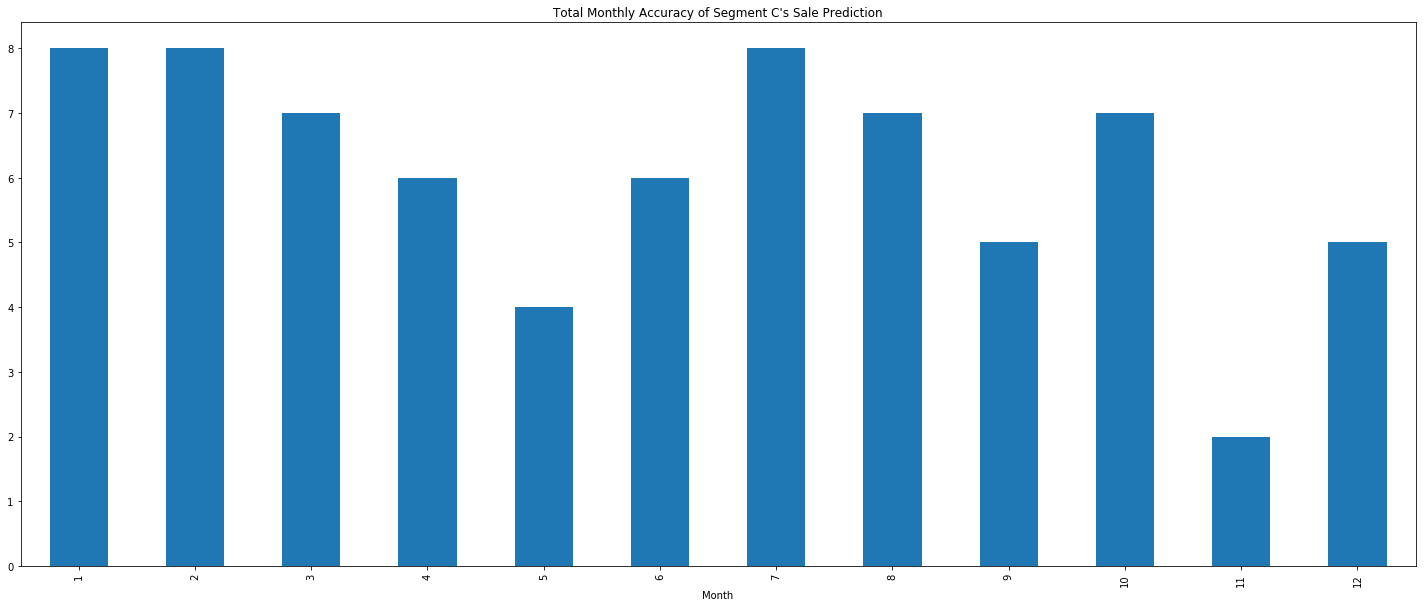

In [254]:
predictedC_df['Total'] = predictedC_df['RFC']+predictedC_df['DTC']+predictedC_df['NNV']+predictedC_df['NN']

totalC = predictedC_df['Total'].groupby(predictedC_df.index.month).sum().dropna()
plt = totalC.plot(kind="bar",figsize=(25,10))
plt.set_xlabel("Month")
plt.set_title("Total Monthly Accuracy of Segment C's Sale Prediction")

### Segment D

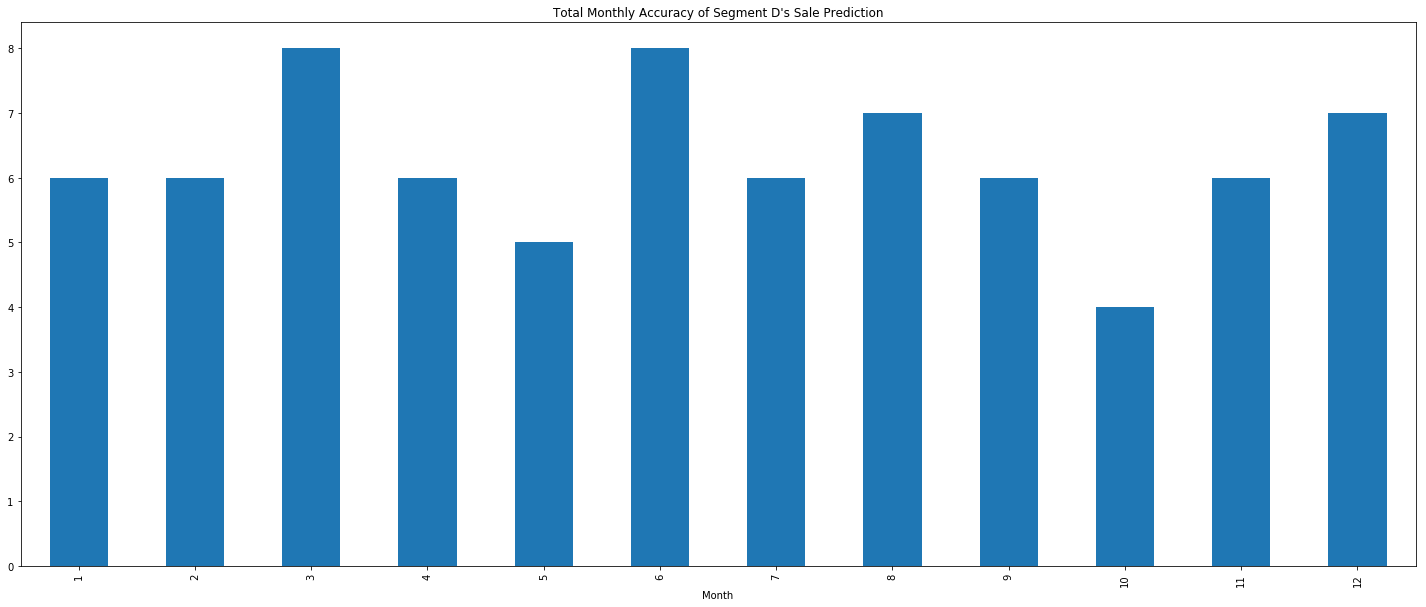

In [255]:
predictedD_df['Total'] = predictedD_df['RFC']+predictedD_df['DTC']+predictedD_df['NNV']+predictedD_df['NN']

totalD = predictedD_df['Total'].groupby(predictedD_df.index.month).sum().dropna()
plt = totalD.plot(kind="bar",figsize=(25,10))
plt.set_xlabel("Month")
plt.set_title("Total Monthly Accuracy of Segment D's Sale Prediction")

### Segment E

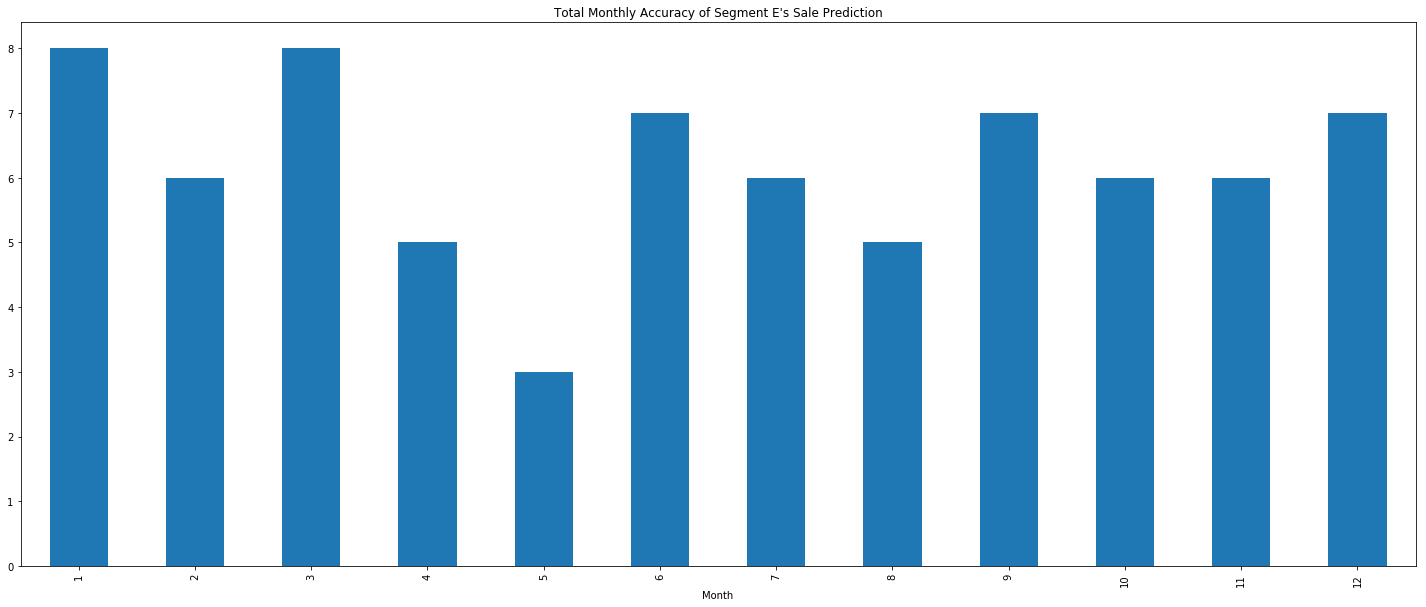

In [256]:
predictedE_df['Total'] = predictedE_df['RFC']+predictedE_df['DTC']+predictedE_df['NNV']+predictedE_df['NN']

totalE = predictedE_df['Total'].groupby(predictedE_df.index.month).sum().dropna()
plt = totalE.plot(kind="bar",figsize=(25,10))
plt.set_xlabel("Month")
plt.set_title("Total Monthly Accuracy of Segment E's Sale Prediction")

### Segment F

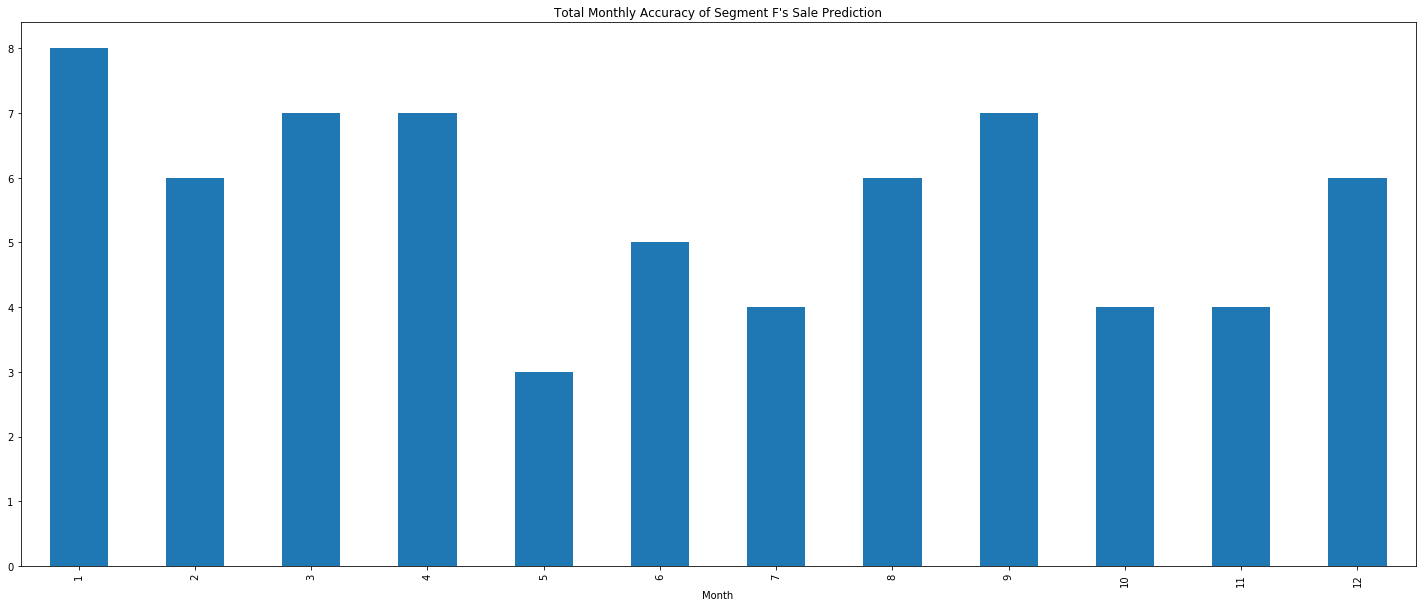

In [257]:
predictedF_df['Total'] = predictedF_df['RFC']+predictedF_df['DTC']+predictedF_df['NNV']+predictedF_df['NN']

totalF = predictedF_df['Total'].groupby(predictedF_df.index.month).sum().dropna()
plt = totalF.plot(kind="bar",figsize=(25,10))
plt.set_xlabel("Month")
plt.set_title("Total Monthly Accuracy of Segment F's Sale Prediction")

## Total Monthly Accuracy

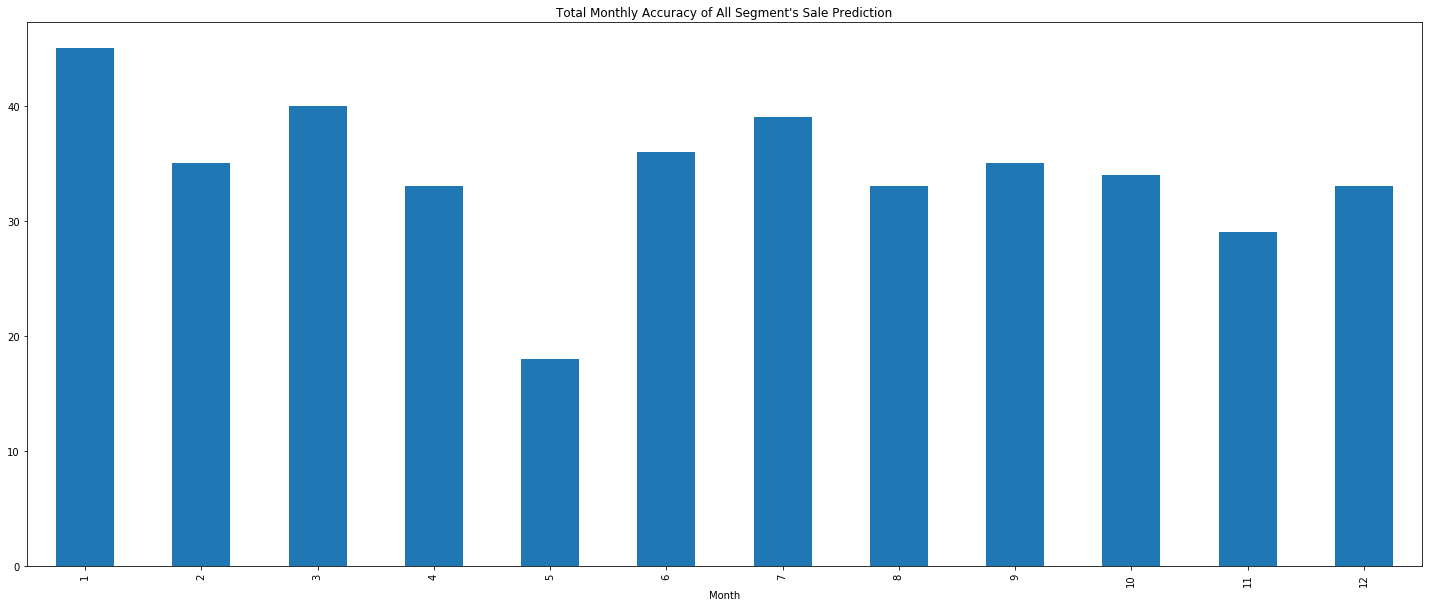

In [260]:
total = predictedA_df.copy().iloc[:,4:]
total['Total'] = total['Total']+predictedB_df['Total']+predictedC_df['Total']+ predictedD_df['Total']+ predictedE_df['Total']+ predictedF_df['Total']

totalp = total['Total'].groupby(total.index.month).sum().dropna()
plt = totalp.plot(kind="bar",figsize=(25,10))
plt.set_xlabel("Month")
plt.set_title("Total Monthly Accuracy of All Segment's Sale Prediction")

## Accuracy Comparison of Segments

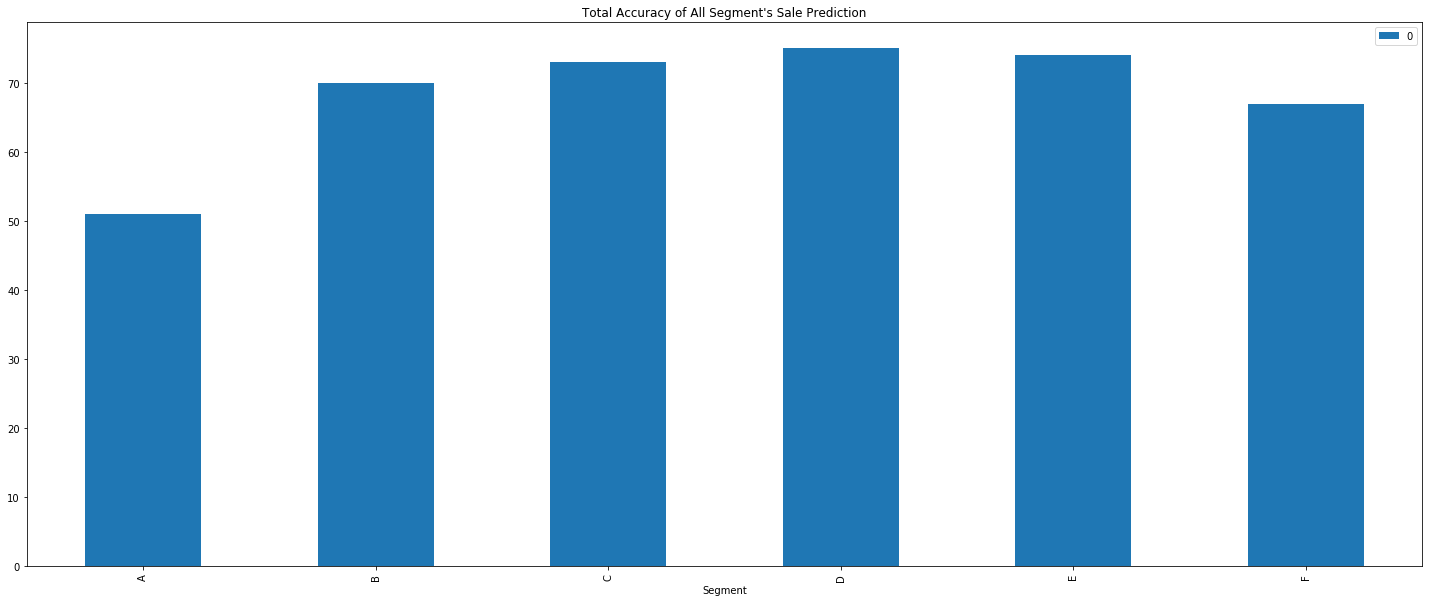

In [265]:
accSums = pd.Series([predictedA_df['Total'].sum()
                     ,predictedB_df['Total'].sum()
                     ,predictedC_df['Total'].sum()
                     ,predictedD_df['Total'].sum()
                     ,predictedE_df['Total'].sum()
                     ,predictedF_df['Total'].sum()]
                    ,index=['A','B','C','D','E','F'])
allSegms = pd.concat([accSums],axis=1)

plt = allSegms.plot(kind="bar",figsize=(25,10))
plt.set_xlabel("Segment")
plt.set_title("Total Accuracy of All Segment's Sale Prediction")